# **Part 1 - Problem and Dataset**

## Loan Prediction Project

## The Problem
*   Everyday thousands of people takes loans and it is important analyze the loan applicants to predict whether they are going to pay back or not. This is crucial for maintaining eceonomy sustainable and probably much better for both banks and the borrowers.
*   **Research Question:** Is is possible to predict a loan applicant's behavior before giving the loan based on their features?

## The Population and the variables


*   **The population:** The main aim of the project is to learn about the people who receive loan. So the population is past loan records.
*   **Independent Variables are** borrower's demographics, financial information, loan information, and borrower's credit history.
*   **Dependent Variable is** loan_paid_back (binary)
*   **Confounding Variable Definition:** A confounding variable is an external factor that can manipulate the results by affecting the relationship between the independent variables and the dependent variable.
*   **Potential Confunding Variables:** Economic Conditions (a financial crisis can effect everyone even the banks), loan officer's bias (loan officer may judge people by their ethnicity or physical appearence.)
*   **How to deal with confounding variables?** As I cannot change the observed data or conduct experiments with banks throughout this project I cannot deal with the confounding variables by myself. **If I had the resources** I would gather 2 different bank branches and conduct some experiments by controlling variables.

## Hypothesis
*   **My hypothesis is that** if the borrower's education level is high, the paying back percentage increases.

Higher education level means higher paychecks. I believe that all the people want to pay their loans back but financial situations prevent it.


## Detailed Plan
*   I will get the data from an external datastore.

*   I will ensure the representativeness by selecting a dataset that includes most of the asked features.

## The Dataset
I chose the 'Loan Prediction Dataset 2025' to work. It is a perfect match for my project because it contains information about 20000 rows.
Columns are:
* age
* gender
* marital_Status
* education_level
* annual_income
* monthly_income
* employment_status
* debt_to_income_ratio
* credit_score
* loan_amount
* loan_purpose
* interest_rate
* loan_term
* installment
* grade_subgrade
* num_of_opened_accounts
* total_credit_limit
* current_balance
* delinquency_history
* public_records
* num_of_delinquencies
* loan_paid_back

I got this dataset from Kaggle and it is an open source dataset:

> https://www.kaggle.com/datasets/nabihazahid/loan-prediction-dataset-2025


## Now importing the dataset and printing the first 5 data entries!

In [ ]:
import pandas as pd

# I uploaded the dataset to my drive so
url = 'https://drive.google.com/uc?id=1Bxd2p22lTFgXujPmV2Fc7oCYd-5iBlMU'


df = pd.read_csv(url)

# Print the first 5 data entries!
print(df.head())

   age  gender marital_status education_level  annual_income  monthly_income  \
0   59    Male        Married        Master's       24240.19         2020.02   
1   72  Female        Married      Bachelor's       20172.98         1681.08   
2   49  Female         Single     High School       26181.80         2181.82   
3   35  Female         Single     High School       11873.84          989.49   
4   63   Other         Single           Other       25326.44         2110.54   

  employment_status  debt_to_income_ratio  credit_score  loan_amount  ...  \
0          Employed                 0.074           743     17173.72  ...   
1          Employed                 0.219           531     22663.89  ...   
2          Employed                 0.234           779      3631.36  ...   
3          Employed                 0.264           809     14939.23  ...   
4          Employed                 0.260           663     16551.71  ...   

  loan_term  installment  grade_subgrade  num_of_open_ac

# **Part 2 - Dataset Details**

## **Preliminary information about the dataset:**

In [ ]:
print('Shape of the data:\n',df.shape)
print('\nData types in data:\n',df.dtypes)
print('\nAll columns of the data:\n',df.columns)
print('\nTotal unique elements of the data:',(df.shape[0] - df.duplicated().sum()))
print('\nTo sum up, there are 150000 unique rows and 21 attributes. All the statistical anaylsis of numerical attributes are given below:\n',df.describe())

Shape of the data:
 (20000, 22)

Data types in data:
 age                       int64
gender                   object
marital_status           object
education_level          object
annual_income           float64
monthly_income          float64
employment_status        object
debt_to_income_ratio    float64
credit_score              int64
loan_amount             float64
loan_purpose             object
interest_rate           float64
loan_term                 int64
installment             float64
grade_subgrade           object
num_of_open_accounts      int64
total_credit_limit      float64
current_balance         float64
delinquency_history       int64
public_records            int64
num_of_delinquencies      int64
loan_paid_back            int64
dtype: object

All columns of the data:
 Index(['age', 'gender', 'marital_status', 'education_level', 'annual_income',
       'monthly_income', 'employment_status', 'debt_to_income_ratio',
       'credit_score', 'loan_amount', 'loan_purpose',

## **Specific data needs for my project:**
Right now, my dataset contains 20000 samples, which is a great number to train a model in the future. Besides that, the dataset have a great number of attributes with diverse types. Some of them are numerical, some of them are class labels and some of them are unique strings. Also, all these attributes are stronngly related with my hypothesis. Therefore there is no need to search for a new dataset right now. But if I struggle to train a model or see that dataset values are irrelevant to my hypothesis, I can search for a new dataset to merge with the current one or to directly use as a primary dataset for my anaylsis.

## **Potential issues in the data**

**Duplicates and null values.**

Last 13 attributes are dependent on Booking Status values. Therefore we will check if there are unexpected null values in detail.

In [ ]:
print(f'There are {df.duplicated().sum()} duplicates in the data.\n')
print(f'The null values for each attributes are\n{df.isnull().sum()}\n')


There are 0 duplicates in the data.

The null values for each attributes are
age                     0
gender                  0
marital_status          0
education_level         0
annual_income           0
monthly_income          0
employment_status       0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
loan_purpose            0
interest_rate           0
loan_term               0
installment             0
grade_subgrade          0
num_of_open_accounts    0
total_credit_limit      0
current_balance         0
delinquency_history     0
public_records          0
num_of_delinquencies    0
loan_paid_back          0
dtype: int64



**Check misspellings/mistypings with value_counts().**

In [ ]:
print(df['gender'].value_counts())
print('*'*30)
print(df['marital_status'].value_counts())
print('*'*30)
print(df['education_level'].value_counts())
print('*'*30)
print(df['employment_status'].value_counts())
print('*'*30)
print(df['loan_purpose'].value_counts())
print('*'*30)
print(df['grade_subgrade'].value_counts())

gender
Female    10034
Male       9536
Other       430
Name: count, dtype: int64
******************************
marital_status
Single      9031
Married     8974
Divorced    1428
Widowed      567
Name: count, dtype: int64
******************************
education_level
Bachelor's     8045
High School    5919
Master's       3724
Other          1508
PhD             804
Name: count, dtype: int64
******************************
employment_status
Employed         13007
Self-employed     2923
Unemployed        2113
Retired           1176
Student            781
Name: count, dtype: int64
******************************
loan_purpose
Debt consolidation    7981
Other                 2550
Car                   2390
Home                  1972
Education             1675
Business              1629
Medical               1196
Vacation               607
Name: count, dtype: int64
******************************
grade_subgrade
C3    1514
C4    1463
C2    1436
C5    1422
C1    1410
D1    1155
D3    1146
D4    1

**Check data types:**

In [ ]:
for column in df.columns:
  all_types = df[column].map(type)
  print(f'\nTypes of {column} are:\n{all_types.value_counts()}')


Types of age are:
age
<class 'int'>    20000
Name: count, dtype: int64

Types of gender are:
gender
<class 'str'>    20000
Name: count, dtype: int64

Types of marital_status are:
marital_status
<class 'str'>    20000
Name: count, dtype: int64

Types of education_level are:
education_level
<class 'str'>    20000
Name: count, dtype: int64

Types of annual_income are:
annual_income
<class 'float'>    20000
Name: count, dtype: int64

Types of monthly_income are:
monthly_income
<class 'float'>    20000
Name: count, dtype: int64

Types of employment_status are:
employment_status
<class 'str'>    20000
Name: count, dtype: int64

Types of debt_to_income_ratio are:
debt_to_income_ratio
<class 'float'>    20000
Name: count, dtype: int64

Types of credit_score are:
credit_score
<class 'int'>    20000
Name: count, dtype: int64

Types of loan_amount are:
loan_amount
<class 'float'>    20000
Name: count, dtype: int64

Types of loan_purpose are:
loan_purpose
<class 'str'>    20000
Name: count, dtype

**Outliers**:
There are no weird outliers. Found outliers are expected and also those outliers are very important samples for my hypothesis.

In [ ]:
# Detect outliers with Z score (Z>2 and Z<-2)
print('\nOUTLIERS:\nTo detect inconsistency, we have check numerical attributes\' Z-Scores.\n')
annual_income = df['annual_income']
monthly_income = df['monthly_income']
debt_to_income_ratio = df['debt_to_income_ratio']
credit_score = df['credit_score']
loan_amount = df['loan_amount']
interest_rate = df['interest_rate']
loan_term = df['loan_term']
installment = df['installment']
num_of_open_accounts = df['num_of_open_accounts']
total_credit_limit = df['total_credit_limit']
current_balance = df['current_balance']
delinquency_history = df['delinquency_history']
num_of_delinquencies = df['num_of_delinquencies']



attributes = [annual_income,monthly_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_term ,installment
              , num_of_open_accounts,total_credit_limit ,current_balance , delinquency_history,num_of_delinquencies]
names = ['annual_income','monthly_income','debt_to_income_ratio','credit_score','loan_amount','interest_rate','loan_term' ,'installment'
              , 'num_of_open_accounts','total_credit_limit' ,'current_balance' , 'delinquency_history','num_of_delinquencies']

for att, name in zip(attributes, names):
  mean = att.mean()
  std = att.std()
  z = (att-mean)/std
  print(f'\n{name} Z scores are\n{z}')
  outliers = z[(z>2)|(z<-2)]
  if outliers.shape[0] > 0:
    print('OUTLIERS ARE:\n',outliers)
    print('Total:',len(outliers))
  else:
    print('There are no outliers.')

  print('*'*30)


OUTLIERS:
To detect inconsistency, we have check numerical attributes' Z-Scores.


annual_income Z scores are
0       -0.673540
1       -0.815410
2       -0.605814
3       -1.104896
4       -0.635651
           ...   
19995   -0.136371
19996   -0.400673
19997   -0.868812
19998   -0.745354
19999   -0.691068
Name: annual_income, Length: 20000, dtype: float64
OUTLIERS ARE:
 58       2.189446
80       2.191534
91       3.022396
101      4.310663
112      4.842963
           ...   
19938    2.835931
19939    2.045815
19956    2.259113
19965    4.200867
19966    2.671071
Name: annual_income, Length: 899, dtype: float64
Total: 899
******************************

monthly_income Z scores are
0       -0.673539
1       -0.815411
2       -0.605813
3       -1.104895
4       -0.635649
           ...   
19995   -0.136371
19996   -0.400673
19997   -0.868813
19998   -0.745354
19999   -0.691069
Name: monthly_income, Length: 20000, dtype: float64
OUTLIERS ARE:
 58       2.189447
80       2.191535
91    

## **Reorganization**
Average time attributes are given in minutes, distance is given in km, and booking value is given in Indian Rupees. Those information are given in dataset's content but are not emphasized in column names. We must rename the column names.

Also customer and driver ratings are scaled from 1 to 5 but it is trivial and universal. Renaming these columns would make coding process inconvenient.

In [ ]:
df.rename(columns={'annual_income': 'annual_income_usd', 'monthly_income': 'monthly_income_usd', 'loan_amount': 'loan_amount_usd', 'installment': 'installment_usd',
                   'total_credit_limit': 'total_credit_limit_usd', 'current_balance': 'current_balance_usd'})

age  gender marital_status education_level  annual_income_usd  \
0       59    Male        Married        Master's           24240.19   
1       72  Female        Married      Bachelor's           20172.98   
2       49  Female         Single     High School           26181.80   
3       35  Female         Single     High School           11873.84   
4       63   Other         Single           Other           25326.44   
...    ...     ...            ...             ...                ...   
19995   39  Female        Married      Bachelor's           39640.08   
19996   66  Female        Married      Bachelor's           32062.90   
19997   65  Female         Single        Master's           18642.02   
19998   35    Male        Married        Master's           22181.39   
19999   36  Female        Married           Other           23737.70   

       monthly_income_usd employment_status  debt_to_income_ratio  \
0                 2020.02          Employed                 0.074   
1                 1681.08          Employed                 0.219   
2                 2181.82          Employed                 0.234   
3                  989.49          Employed                 0.264   
4                 2110.54          Employed                 0.260   
...                   ...               ...                   ...   
19995             3303.34          Employed                 0.275   
19996             2671.91          Employed                 0.367   
19997             1553.50           Student                 0.106   
19998             1848.45           Retired                 0.275   
19999             1978.14          Employed                 0.228   

       credit_score  loan_amount_usd  ... loan_term  installment_usd  \
0               743         17173.72  ...        36           581.88   
1               531         22663.89  ...        60           573.17   
2               779          3631.36  ...        60            76.32   
3               809         14939.23  ...        36           468.07   
4               663         16551.71  ...        60           395.50   
...             ...              ...  ...       ...              ...   
19995           691         16322.23  ...        36           566.22   
19996           758         16697.34  ...        36           553.71   
19997           751         23924.78  ...        36           772.66   
19998           646         16920.13  ...        36           595.36   
19999           630         15769.75  ...        36           531.88   

       grade_subgrade  num_of_open_accounts total_credit_limit_usd  \
0                  B5                     7               40833.47   
1                  F1                     5               27968.01   
2                  B4                     2               15502.25   
3                  A5                     7               18157.79   
4                  D5                     1               17467.56   
...               ...                   ...                    ...   
19995              C5                     2               23748.10   
19996              B5                     8               49929.65   
19997              B4                     3               13137.57   
19998              D2                     5               19580.82   
19999              D2                     8               43013.59   

       current_balance_usd  delinquency_history  public_records  \
0                 24302.07                    1               0   
1                 10803.01                    1               0   
2                  4505.44                    0               0   
3                  5525.63                    4               0   
4                  3593.91                    2               0   
...                    ...                  ...             ...   
19995              5801.45                    1               0   
19996             40901.31                    3               0   
1999

## **Detailed plan for cleaning the data:**
There are some outliers but outliers are the main causes for rejection. In real life, these kind of outliers can appear so I will keep them.

## **Import the data**

And display first and last 5 elements

In [ ]:
URL = 'https://drive.google.com/uc?id=1Bxd2p22lTFgXujPmV2Fc7oCYd-5iBlMU'
df = pd.read_csv(URL)

# Preview
print(df.head(),df.tail())

   age  gender marital_status education_level  annual_income  monthly_income  \
0   59    Male        Married        Master's       24240.19         2020.02   
1   72  Female        Married      Bachelor's       20172.98         1681.08   
2   49  Female         Single     High School       26181.80         2181.82   
3   35  Female         Single     High School       11873.84          989.49   
4   63   Other         Single           Other       25326.44         2110.54   

  employment_status  debt_to_income_ratio  credit_score  loan_amount  ...  \
0          Employed                 0.074           743     17173.72  ...   
1          Employed                 0.219           531     22663.89  ...   
2          Employed                 0.234           779      3631.36  ...   
3          Employed                 0.264           809     14939.23  ...   
4          Employed                 0.260           663     16551.71  ...   

  loan_term  installment  grade_subgrade  num_of_open_ac

# **Part 3 - Exploratory Data Analysis (EDA)**

## **Initial Thoughts**
Do you think you have the right data? Why or why not?

* I think I have the right data. The dataset is well designed and have almost all the details about loan records. It is perfect

What are your initial questions before knowing much about the data?

**My Questions:**


*   What are the distributions of features?
*   What features correlates?



## **Characteristics of the data**

Shape of the data is (20000, 22)

Columns are:
* age
* gender
* marital_Status
* education_level
* annual_income
* monthly_income
* employment_status
* debt_to_income_ratio
* credit_score
* loan_amount
* loan_purpose
* interest_rate
* loan_term
* installment
* grade_subgrade
* num_of_opened_accounts
* total_credit_limit
* current_balance
* delinquency_history
* public_records
* num_of_delinquencies
* loan_paid_back

I utilized pandas and I did not find any duplicates in Project 2. Therefore, I think there are no duplicates. If there are some duplicates I am hoping to detect it when I explore all the variables one by one.

In [ ]:
import pandas as pd

URL = 'https://drive.google.com/uc?id=1Bxd2p22lTFgXujPmV2Fc7oCYd-5iBlMU'
df = pd.read_csv(URL)

# Shape of the data
print("Shape:",df.shape)

# Detect duplicates
print(df.duplicated().sum())

Shape: (20000, 22)
0


## **Explore every variable in the dataset**

Each variables unit (if there is) and representation information:
Columns are:
* age: int
* gender: String
* marital_status: String
* education_level: String
* annual_income: float
* monthly_income: float
* employment_status: String
* debt_to_income_ratio: float
* credit_score: float
* loan_amount: float
* loan_purpose: String
* interest_rate: float
* loan_term: int
* installment: float
* grade_subgrade: String
* num_of_opened_accounts: int
* total_credit_limit: float
* current_balance: float
* delinquency_history: int
* public_records: binary
* num_of_delinquencies: int
* loan_paid_back: binary

All the units are indicated by the dataset's creator on Kaggle (link is above)

All the other information are observed with the code below (check output of the code snippet):

**************************************************************************************************** 
Types of age are:
age
<class 'int'>    20000
Name: count, dtype: int64

Descriptive/summary statistics for the variable:
count    20000.000000
mean        48.027000
std         15.829352
min         21.000000
25%         35.000000
50%         48.000000
75%         62.000000
max         75.000000
Name: age, dtype: float64


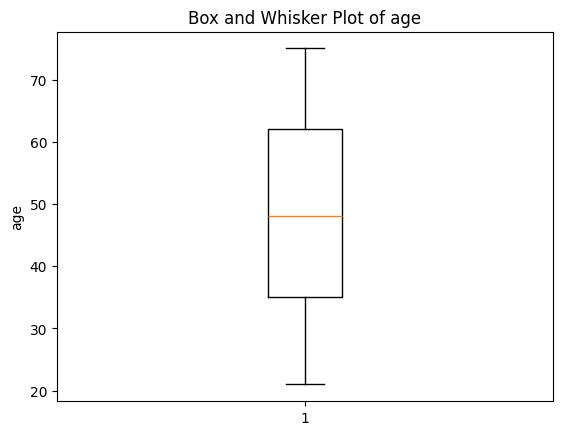

**************************************************************************************************** 
Types of gender are:
gender
<class 'str'>    20000
Name: count, dtype: int64

Descriptive/summary statistics for the variable:
count      20000
unique         3
top       Female
freq       10034
Name: gender, dtype: object
**************************************************************************************************** 
Types of marital_status are:
marital_status
<class 'str'>    20000
Name: count, dtype: int64

Descriptive/summary statistics for the variable:
count      20000
unique         4
top       Single
freq        9031
Name: marital_status, dtype: object
**************************************************************************************************** 
Types of education_level are:
education_level
<class 'str'>    20000
Name: count, dtype: int64

Descriptive/summary statistics for the variable:
count          20000
unique             5
top       Bachelor's
freq            

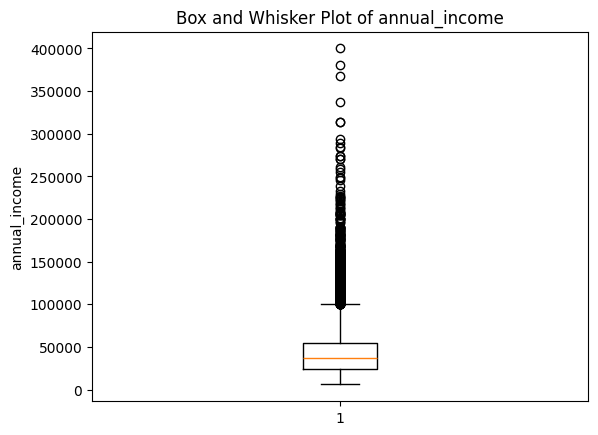

**************************************************************************************************** 
Types of monthly_income are:
monthly_income
<class 'float'>    20000
Name: count, dtype: int64

Descriptive/summary statistics for the variable:
count    20000.000000
mean      3629.136466
std       2389.048326
min        500.000000
25%       2021.730000
50%       3048.770000
75%       4556.495000
max      33333.330000
Name: monthly_income, dtype: float64


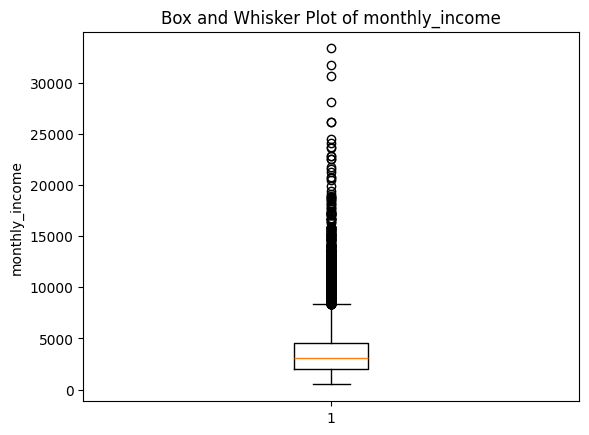

**************************************************************************************************** 
Types of employment_status are:
employment_status
<class 'str'>    20000
Name: count, dtype: int64

Descriptive/summary statistics for the variable:
count        20000
unique           5
top       Employed
freq         13007
Name: employment_status, dtype: object
**************************************************************************************************** 
Types of debt_to_income_ratio are:
debt_to_income_ratio
<class 'float'>    20000
Name: count, dtype: int64

Descriptive/summary statistics for the variable:
count    20000.000000
mean         0.177019
std          0.105059
min          0.010000
25%          0.096000
50%          0.160000
75%          0.241000
max          0.667000
Name: debt_to_income_ratio, dtype: float64


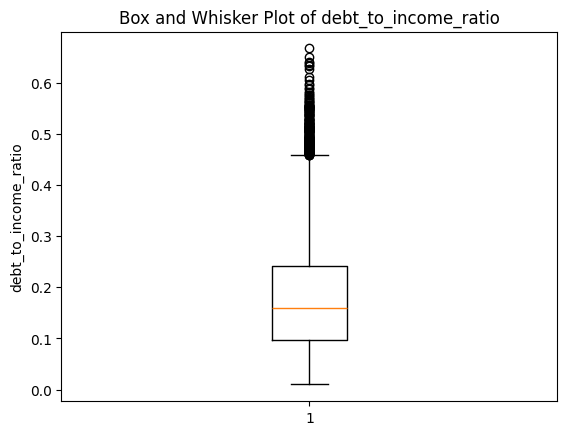

**************************************************************************************************** 
Types of credit_score are:
credit_score
<class 'int'>    20000
Name: count, dtype: int64

Descriptive/summary statistics for the variable:
count    20000.00000
mean       679.25695
std         69.63858
min        373.00000
25%        632.00000
50%        680.00000
75%        727.00000
max        850.00000
Name: credit_score, dtype: float64


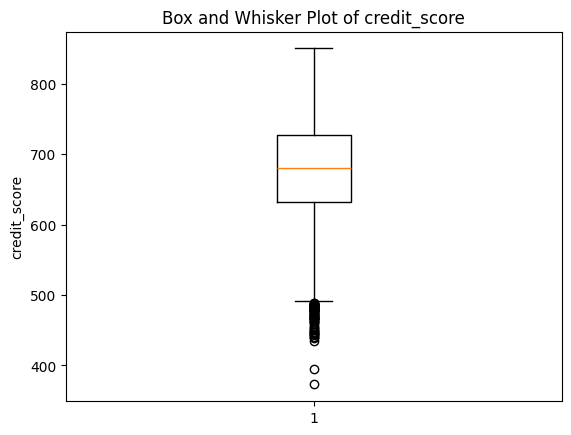

**************************************************************************************************** 
Types of loan_amount are:
loan_amount
<class 'float'>    20000
Name: count, dtype: int64

Descriptive/summary statistics for the variable:
count    20000.000000
mean     15129.300909
std       8605.405513
min        500.000000
25%       8852.695000
50%      14946.170000
75%      20998.867500
max      49039.690000
Name: loan_amount, dtype: float64


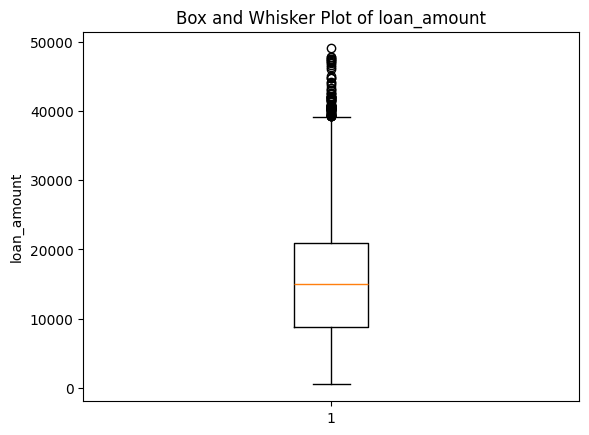

**************************************************************************************************** 
Types of loan_purpose are:
loan_purpose
<class 'str'>    20000
Name: count, dtype: int64

Descriptive/summary statistics for the variable:
count                  20000
unique                     8
top       Debt consolidation
freq                    7981
Name: loan_purpose, dtype: object
**************************************************************************************************** 
Types of interest_rate are:
interest_rate
<class 'float'>    20000
Name: count, dtype: int64

Descriptive/summary statistics for the variable:
count    20000.000000
mean        12.400627
std          2.442729
min          3.140000
25%         10.740000
50%         12.400000
75%         14.002500
max         22.510000
Name: interest_rate, dtype: float64


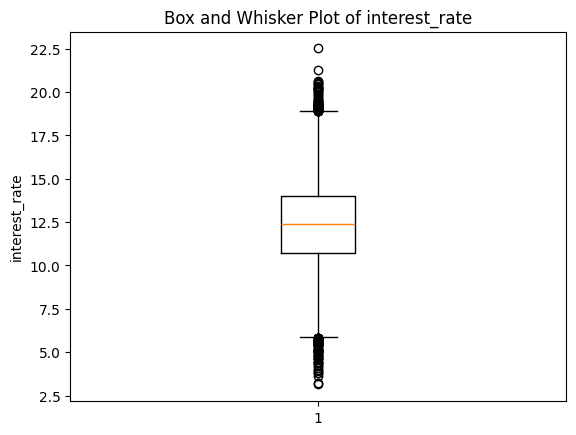

**************************************************************************************************** 
Types of loan_term are:
loan_term
<class 'int'>    20000
Name: count, dtype: int64

Descriptive/summary statistics for the variable:
count    20000.00000
mean        43.22280
std         11.00838
min         36.00000
25%         36.00000
50%         36.00000
75%         60.00000
max         60.00000
Name: loan_term, dtype: float64


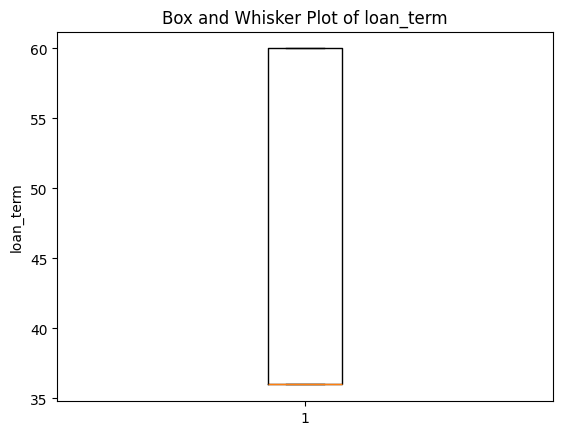

**************************************************************************************************** 
Types of installment are:
installment
<class 'float'>    20000
Name: count, dtype: int64

Descriptive/summary statistics for the variable:
count    20000.000000
mean       455.625794
std        274.622125
min          9.430000
25%        253.910000
50%        435.595000
75%        633.595000
max       1685.400000
Name: installment, dtype: float64


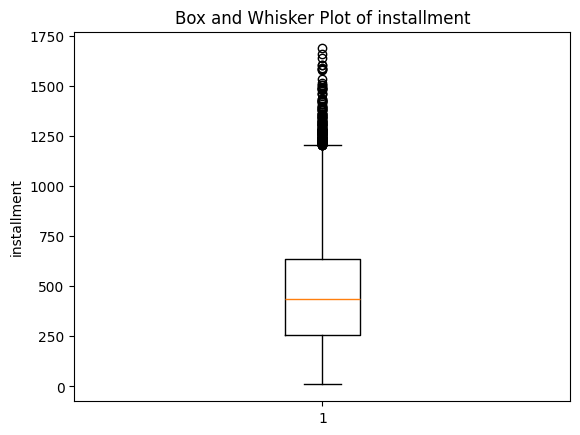

**************************************************************************************************** 
Types of grade_subgrade are:
grade_subgrade
<class 'str'>    20000
Name: count, dtype: int64

Descriptive/summary statistics for the variable:
count     20000
unique       30
top          C3
freq       1514
Name: grade_subgrade, dtype: object
**************************************************************************************************** 
Types of num_of_open_accounts are:
num_of_open_accounts
<class 'int'>    20000
Name: count, dtype: int64

Descriptive/summary statistics for the variable:
count    20000.000000
mean         5.011800
std          2.244529
min          0.000000
25%          3.000000
50%          5.000000
75%          6.000000
max         15.000000
Name: num_of_open_accounts, dtype: float64


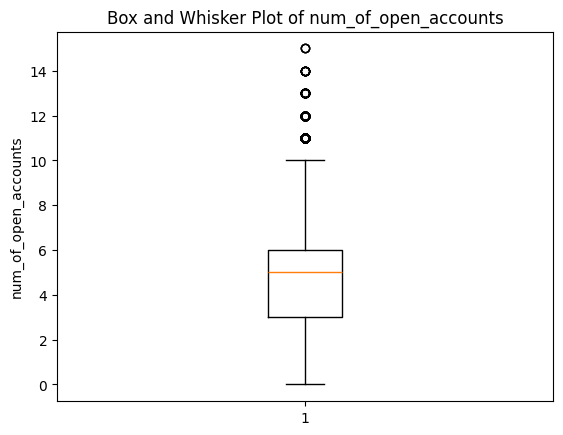

**************************************************************************************************** 
Types of total_credit_limit are:
total_credit_limit
<class 'float'>    20000
Name: count, dtype: int64

Descriptive/summary statistics for the variable:
count     20000.000000
mean      48649.824769
std       32423.378128
min        6157.800000
25%       27180.492500
50%       40241.615000
75%       60361.257500
max      454394.190000
Name: total_credit_limit, dtype: float64


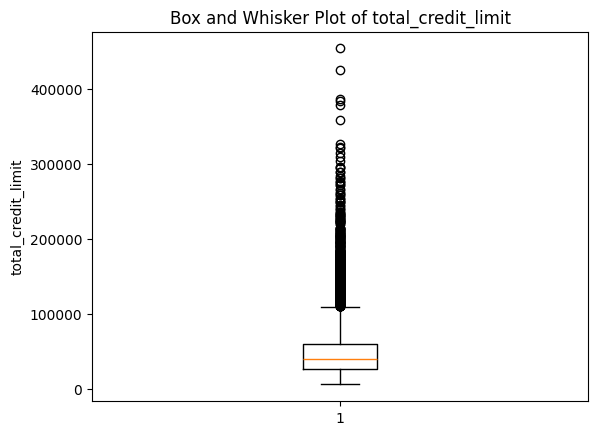

**************************************************************************************************** 
Types of current_balance are:
current_balance
<class 'float'>    20000
Name: count, dtype: int64

Descriptive/summary statistics for the variable:
count     20000.000000
mean      24333.394631
std       22313.845395
min         496.350000
25%        9592.572500
50%       18334.555000
75%       31743.327500
max      352177.900000
Name: current_balance, dtype: float64


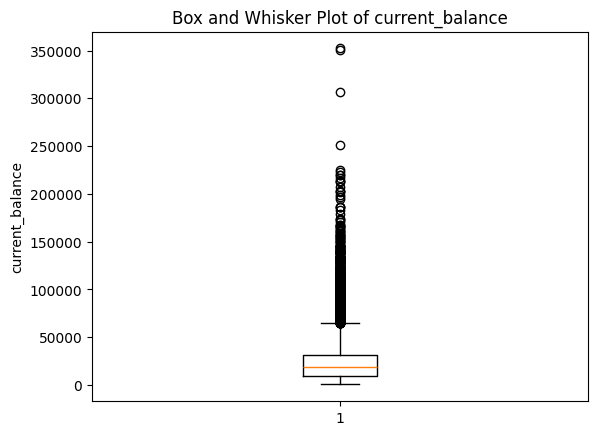

**************************************************************************************************** 
Types of delinquency_history are:
delinquency_history
<class 'int'>    20000
Name: count, dtype: int64

Descriptive/summary statistics for the variable:
count    20000.000000
mean         1.990150
std          1.474945
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: delinquency_history, dtype: float64


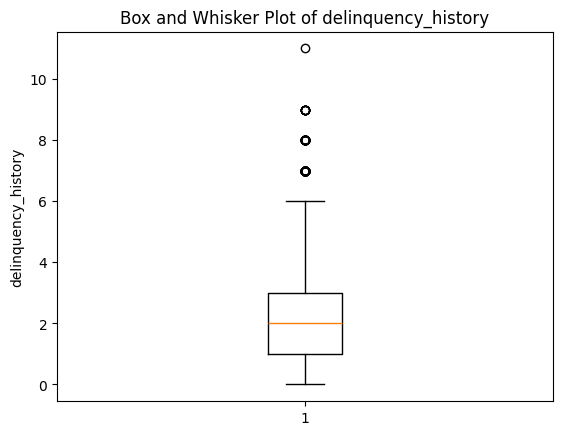

**************************************************************************************************** 
Types of public_records are:
public_records
<class 'int'>    20000
Name: count, dtype: int64

Descriptive/summary statistics for the variable:
count    20000.000000
mean         0.061800
std          0.285105
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: public_records, dtype: float64


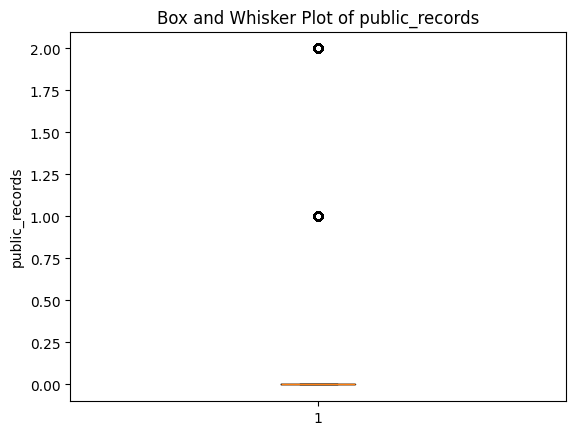

**************************************************************************************************** 
Types of num_of_delinquencies are:
num_of_delinquencies
<class 'int'>    20000
Name: count, dtype: int64

Descriptive/summary statistics for the variable:
count    20000.000000
mean         2.489150
std          1.631384
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: num_of_delinquencies, dtype: float64


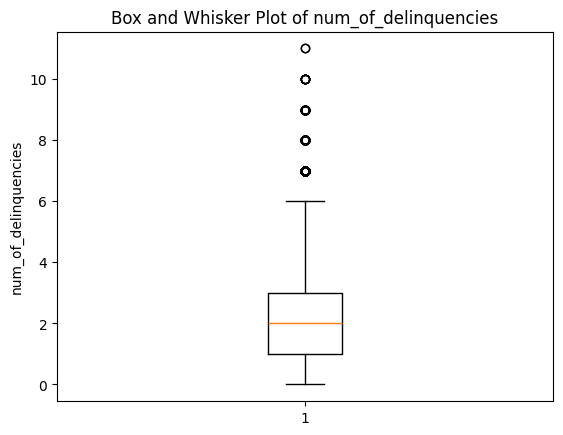

**************************************************************************************************** 
Types of loan_paid_back are:
loan_paid_back
<class 'int'>    20000
Name: count, dtype: int64

Descriptive/summary statistics for the variable:
count    20000.000000
mean         0.799900
std          0.400085
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: loan_paid_back, dtype: float64


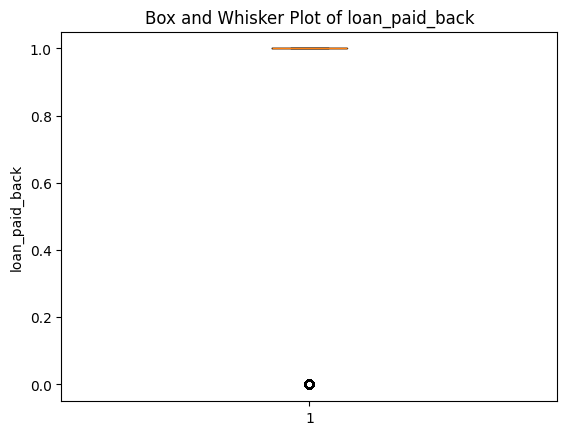

In [ ]:
import matplotlib.pyplot as plt

for column in df.columns:
  all_types = df[column].map(type)
  print('*'*100,f'\nTypes of {column} are:\n{all_types.value_counts()}')
  print('\nDescriptive/summary statistics for the variable:')
  print(df[column].describe())
  if df[column].dtype == float or df[column].dtype == int :
    fig, ax = plt.subplots()
    ax.boxplot(df[column].dropna())
    ax.set_title(f'Box and Whisker Plot of {column}')
    ax.set_ylabel(column)
    plt.show()

Now plot the frequency graphs



Variable Distribution of Values



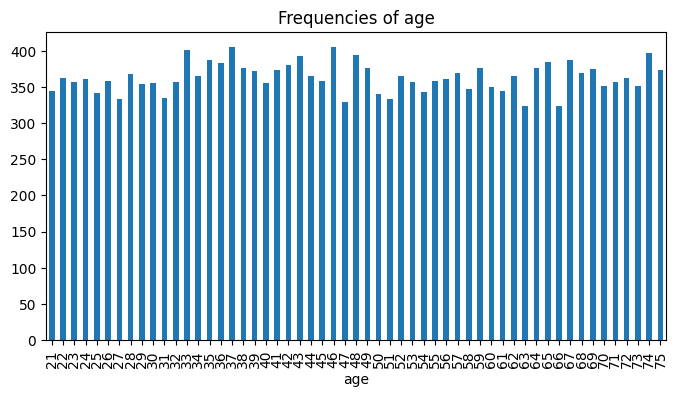

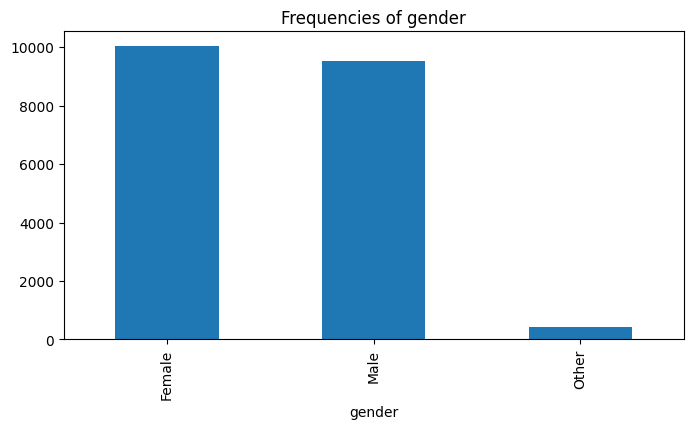

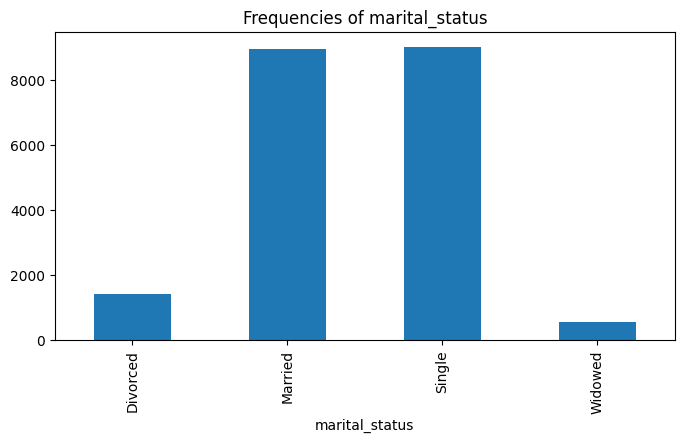

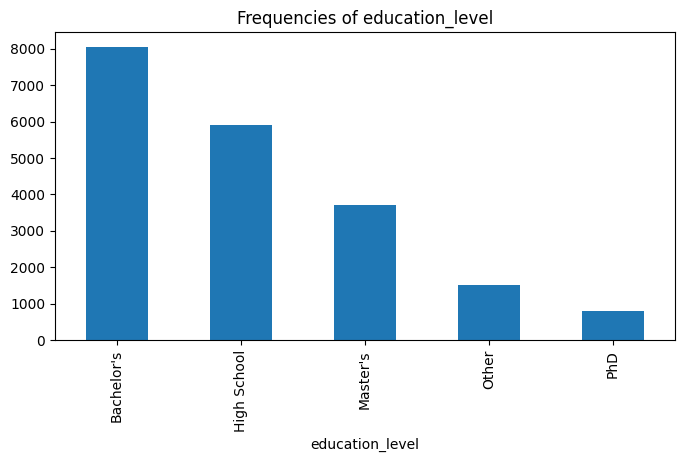

/tmp/ipython-input-2504130178.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


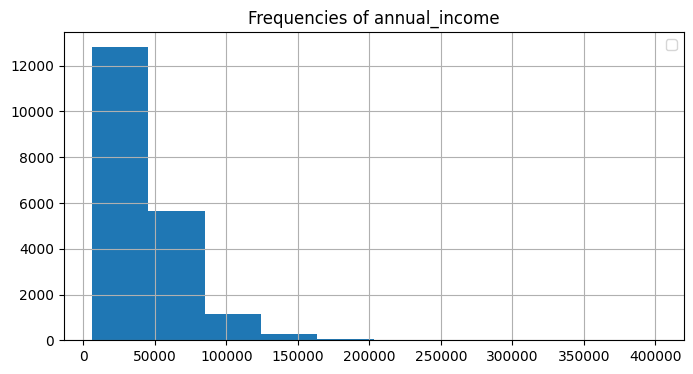

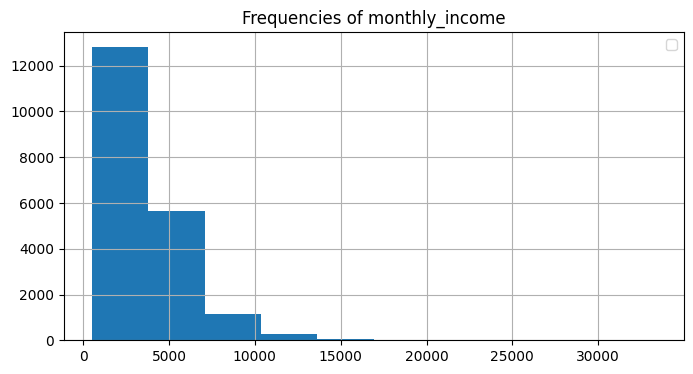

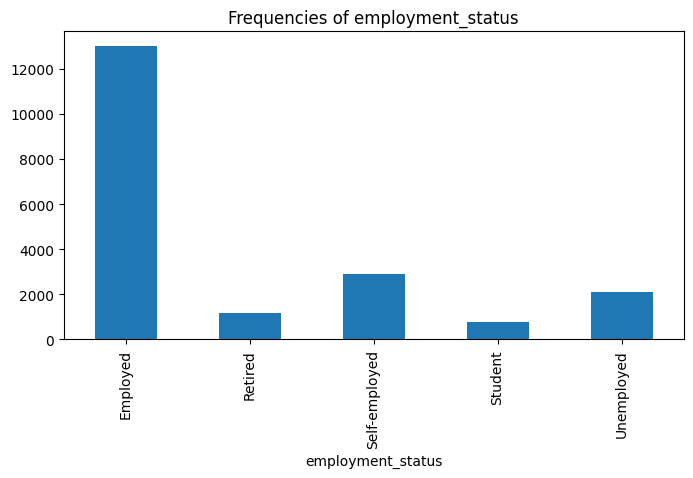

/tmp/ipython-input-2504130178.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


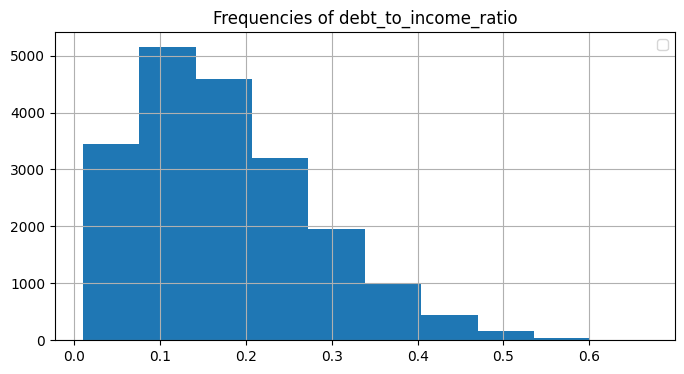

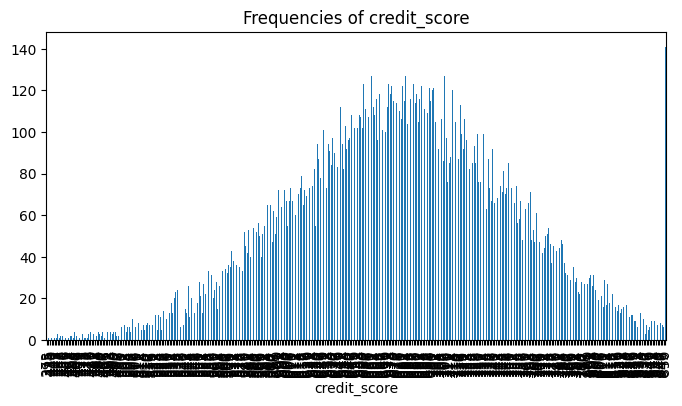

/tmp/ipython-input-2504130178.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


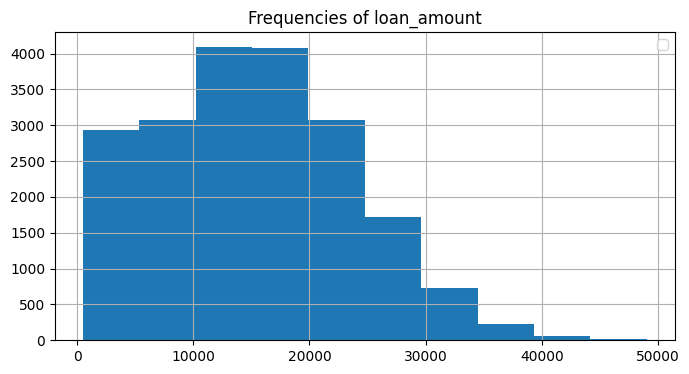

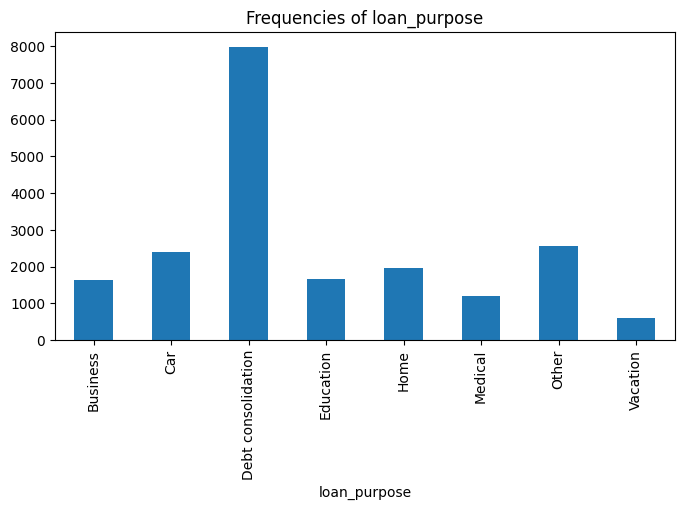

/tmp/ipython-input-2504130178.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


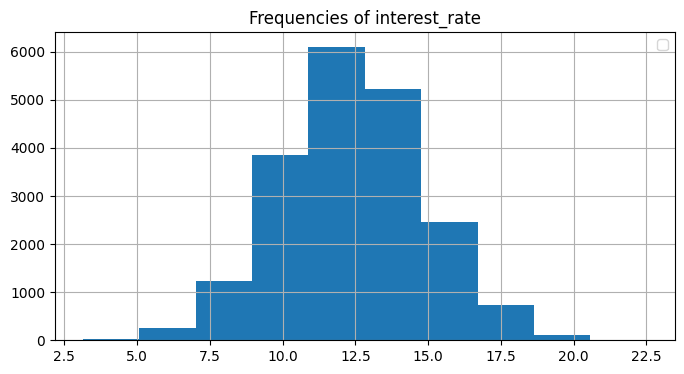

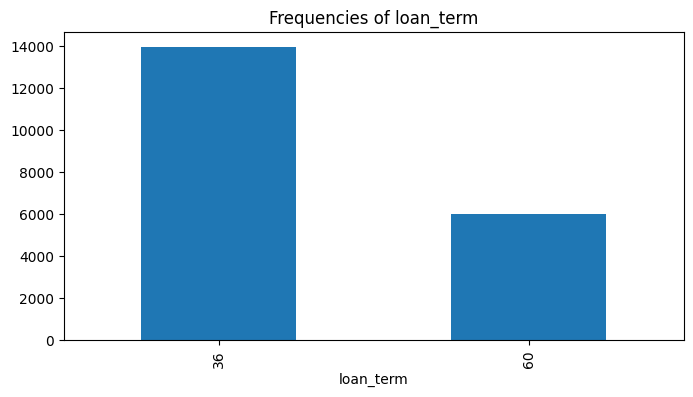

/tmp/ipython-input-2504130178.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


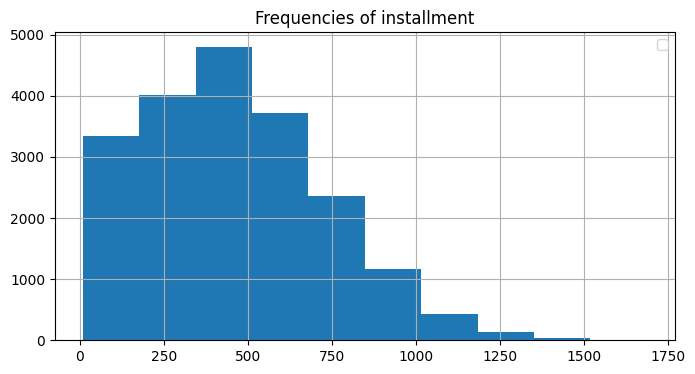

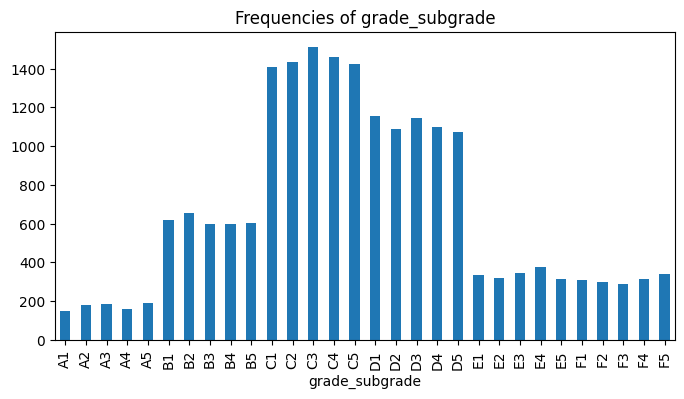

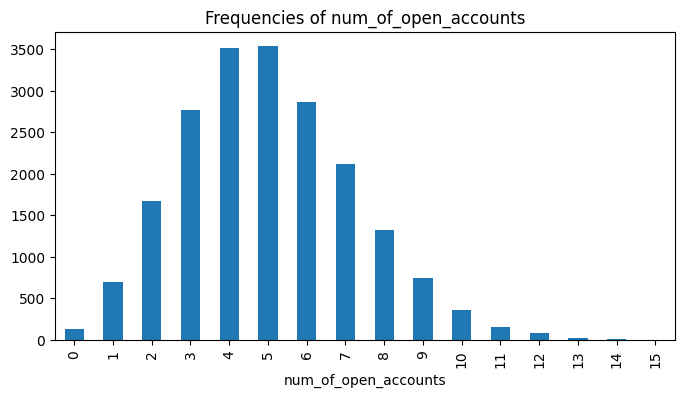

/tmp/ipython-input-2504130178.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


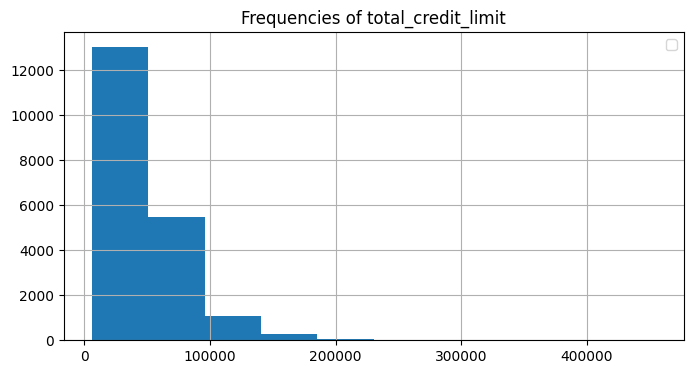

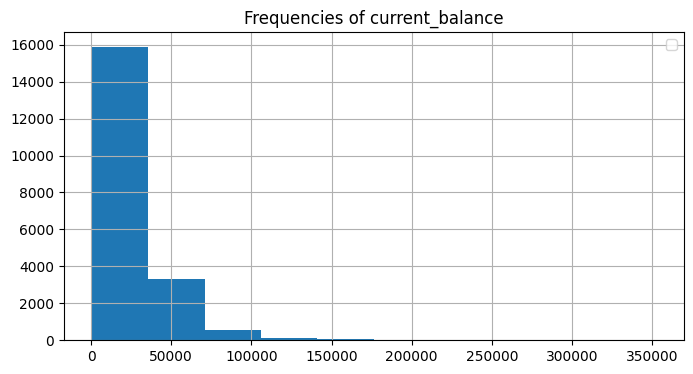

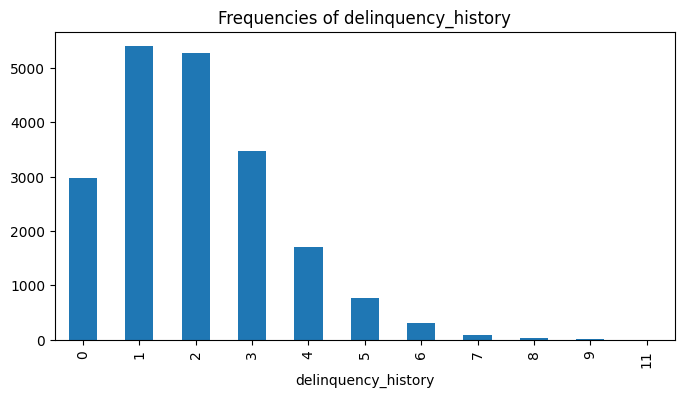

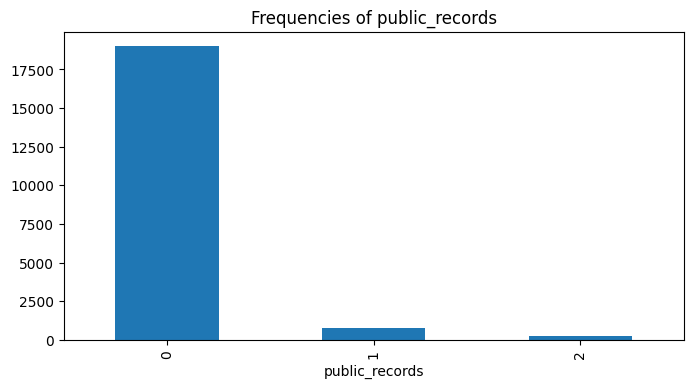

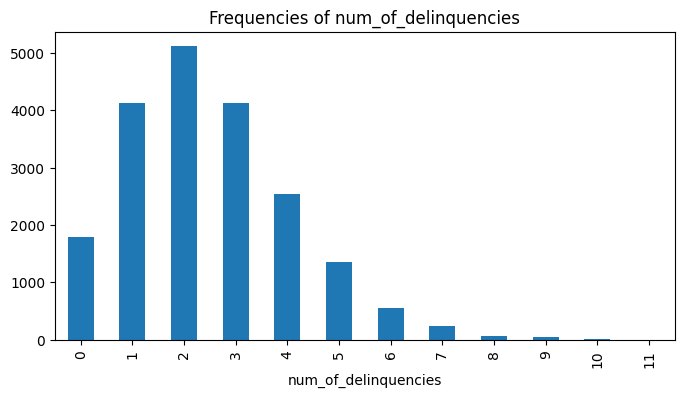

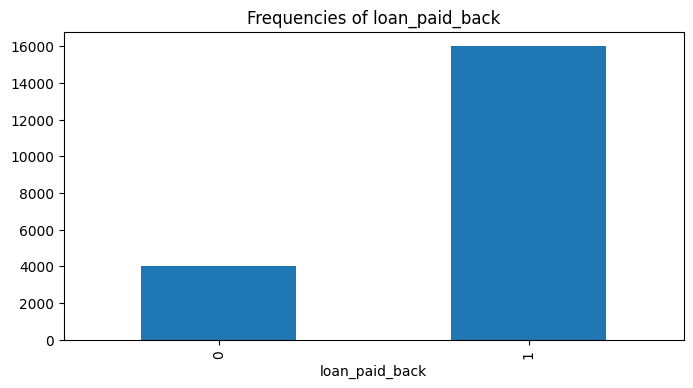

In [ ]:
print('\n\nVariable Distribution of Values\n')
for column in df.columns:

  plt.figure(figsize=(8, 4))
  if df[column].dtype != float:
    frequencies = df[column].value_counts().sort_index()
    frequencies.plot.bar(title=f'Frequencies of {column}')
    plt.show()
  else:
    plt.legend()
    plt.title(f'Frequencies of {column}')
    df[column].hist()
    plt.show()

Observations from the Box and Whisker Plots:
*   There are a lot of outliers! Which can give great hint on the prediction in a good way!

Observations from Frequency Plots:
*   Age does not have a visible distribution.
*   Most of the loan in the dataset are paid back.
*   installment, delinquenciy_history, num_of_delinquencies, and num_of_open_accounts attributes seems to have a right-skewed distribution.
*   Grade subgrade frequency is high in the mid values.






## **Relationships Between Variables**


When we look at correlation matrix, it seems like there is no linear relationship between any numeric variables.

In [ ]:
df.corr(numeric_only=True)

age  annual_income  monthly_income  \
age                   1.000000      -0.002051       -0.002051   
annual_income        -0.002051       1.000000        1.000000   
monthly_income       -0.002051       1.000000        1.000000   
debt_to_income_ratio  0.007303       0.002760        0.002760   
credit_score          0.004059       0.003837        0.003837   
loan_amount          -0.008233       0.005094        0.005094   
interest_rate         0.009768      -0.001186       -0.001186   
loan_term             0.002331       0.001617        0.001617   
installment          -0.008398       0.003843        0.003843   
num_of_open_accounts  0.001761      -0.005951       -0.005951   
total_credit_limit    0.001787       0.885358        0.885358   
current_balance      -0.001587       0.651703        0.651703   
delinquency_history   0.002967       0.011807        0.011807   
public_records        0.005181       0.000989        0.000989   
num_of_delinquencies  0.008773       0.007768        0.007768   
loan_paid_back        0.007999       0.003057        0.003057   

                      debt_to_income_ratio  credit_score  loan_amount  \
age                               0.007303      0.004059    -0.008233   
annual_income                     0.002760      0.003837     0.005094   
monthly_income                    0.002760      0.003837     0.005094   
debt_to_income_ratio              1.000000     -0.022580    -0.006370   
credit_score                     -0.022580      1.000000     0.006779   
loan_amount                      -0.006370      0.006779     1.000000   
interest_rate                     0.013955     -0.568873    -0.005949   
loan_term                         0.005765      0.005494     0.000930   
installment                      -0.005011     -0.032454     0.944765   
num_of_open_accounts             -0.005691     -0.000841    -0.005446   
total_credit_limit                0.004919     -0.003766     0.008391   
current_balance                   0.007334     -0.009824     0.003292   
delinquency_history               0.229519     -0.162136    -0.006937   
public_records                    0.001204      0.004947     0.002227   
num_of_delinquencies              0.210809     -0.141679    -0.009100   
loan_paid_back                   -0.223831      0.199841    -0.002490   

                      interest_rate  loan_term  installment  \
age                        0.009768   0.002331    -0.008398   
annual_income             -0.001186   0.001617     0.003843   
monthly_income            -0.001186   0.001617     0.003843   
debt_to_income_ratio       0.013955   0.005765    -0.005011   
credit_score              -0.568873   0.005494    -0.032454   
loan_amount               -0.005949   0.000930     0.944765   
interest_rate              1.000000  -0.005993     0.061734   
loan_term                 -0.005993   1.000000    -0.276387   
installment                0.061734  -0.276387     1.000000   
num_of_open_accounts       0.001275   0.018309    -0.010342   
total_credit_limit         0.003878   0.002663     0.007463   
current_balance            0.009245   0.001072     0.003458   
delinquency_history        0.091833  -0.002196     0.000848   
public_records            -0.005535  -0.002667     0.004238   
num_of_delinquencies       0.078720  -0.002084    -0.002313   
loan_paid_back            -0.110935  -0.002615    -0.010068   

                      num_of_open_accounts  total_credit_limit  \
age                               0.001761            0.001787   
annual_income                    -0.005951            0.885358   
monthly_income                   -0.005951            0.885358   
debt_to_income_ratio             -0.005691            0.004919   
credit_score                     -0.000841           -0.003766   
loan_amount                      -0.005446            0.008391   
interest_rate                     0.001275            0.003878   
loan_term                         0.018309            0.002663   
installment  

Let's check categorical vs numerical variables!

gender
Female    48.163345
Male      47.972630
Other     46.051163
Name: age, dtype: float64

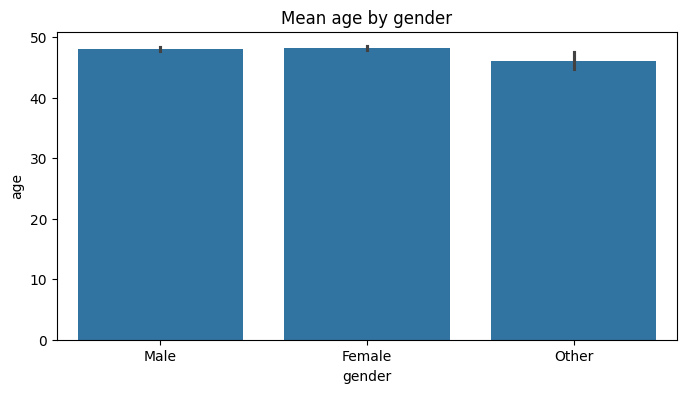

gender
Female    43329.948695
Male      43753.195718
Other     44161.804023
Name: annual_income, dtype: float64

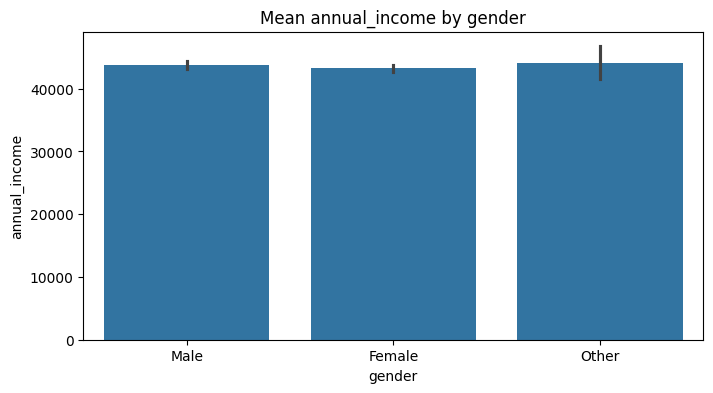

gender
Female    3610.829032
Male      3646.099638
Other     3680.150349
Name: monthly_income, dtype: float64

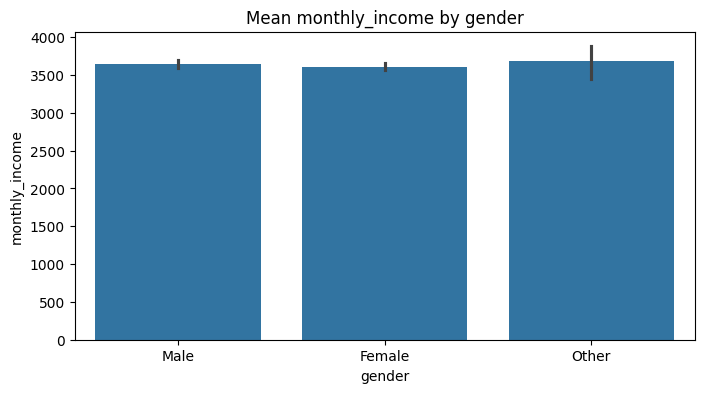

gender
Female    0.174889
Male      0.178887
Other     0.185302
Name: debt_to_income_ratio, dtype: float64

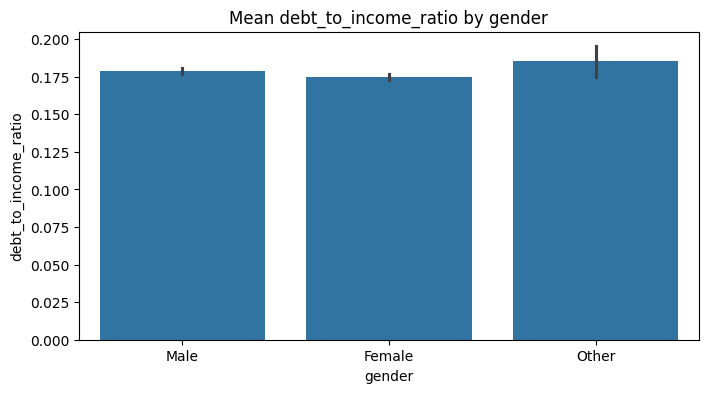

gender
Female    680.050628
Male      678.509962
Other     677.302326
Name: credit_score, dtype: float64

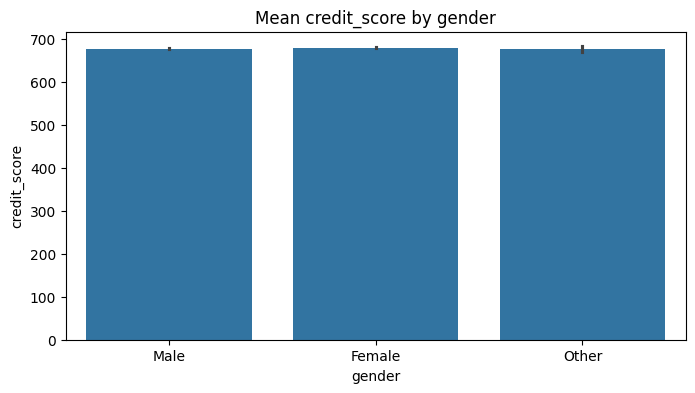

gender
Female    15175.663177
Male      15062.316705
Other     15532.934302
Name: loan_amount, dtype: float64

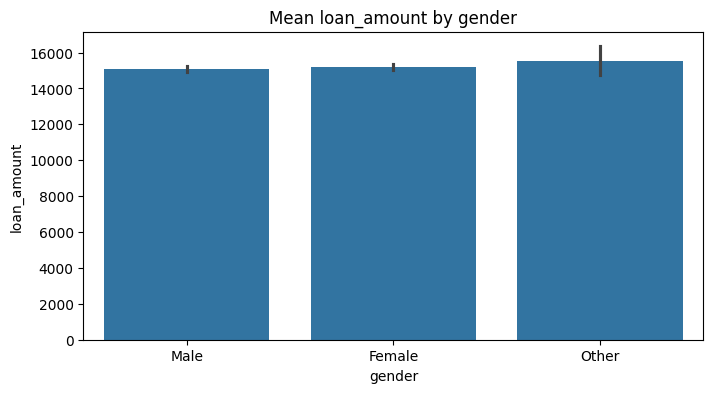

gender
Female    12.379818
Male      12.417724
Other     12.507023
Name: interest_rate, dtype: float64

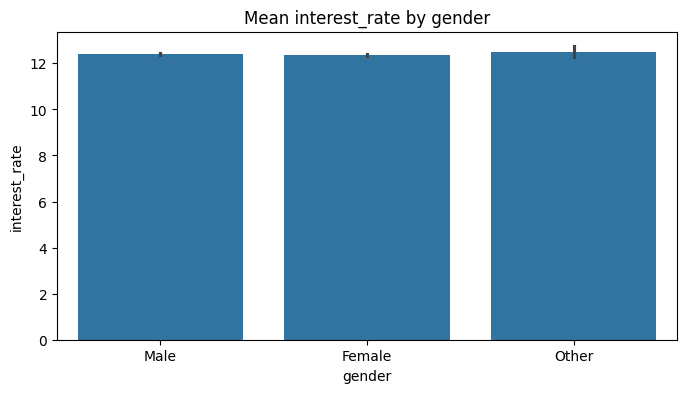

gender
Female    43.15886
Male      43.26594
Other     43.75814
Name: loan_term, dtype: float64

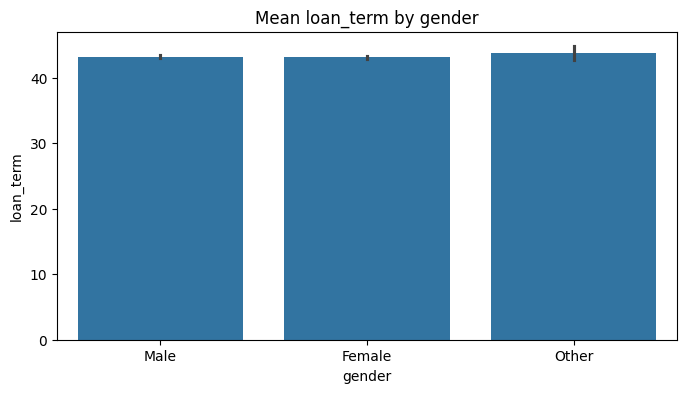

gender
Female    458.109635
Male      452.596754
Other     464.839860
Name: installment, dtype: float64

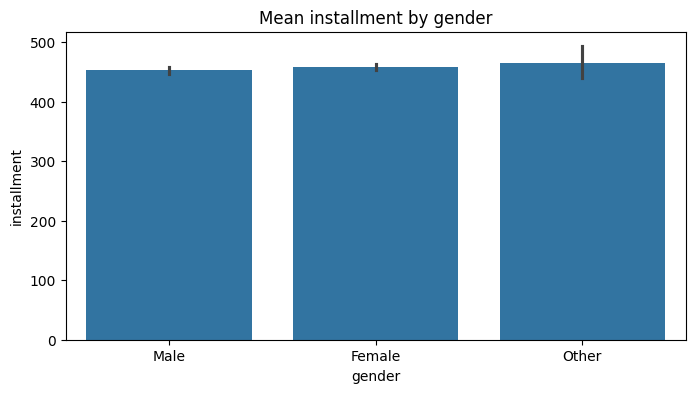

gender
Female    4.974586
Male      5.044358
Other     5.158140
Name: num_of_open_accounts, dtype: float64

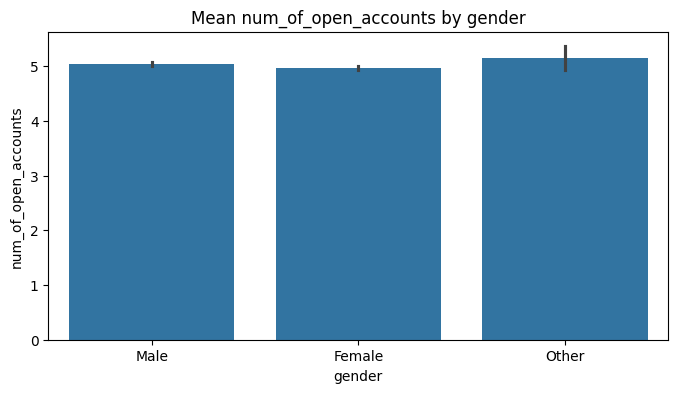

gender
Female    48530.169043
Male      48795.767620
Other     48205.439953
Name: total_credit_limit, dtype: float64

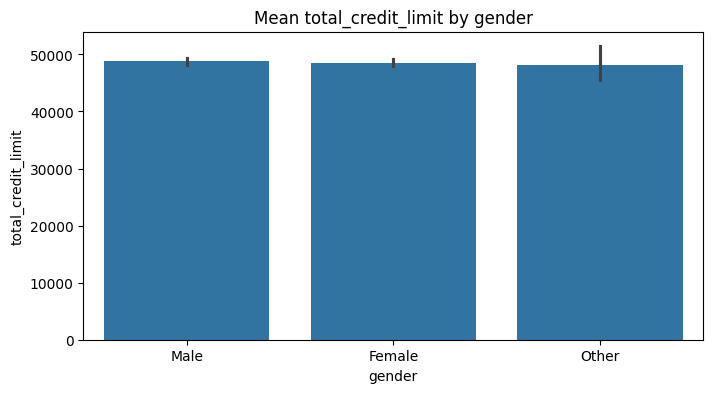

gender
Female    24252.299069
Male      24486.318710
Other     22834.391977
Name: current_balance, dtype: float64

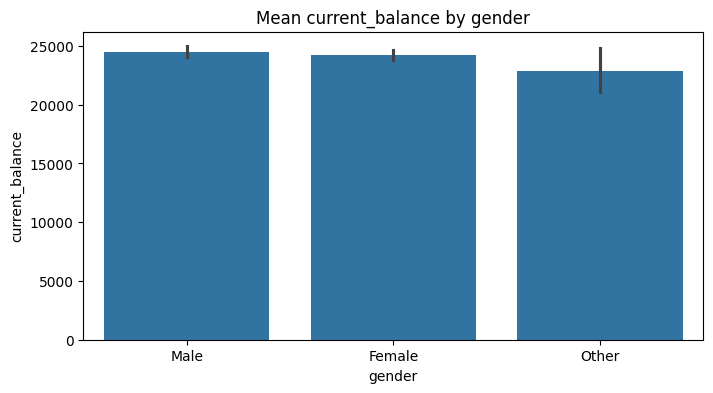

gender
Female    1.997608
Male      1.980180
Other     2.037209
Name: delinquency_history, dtype: float64

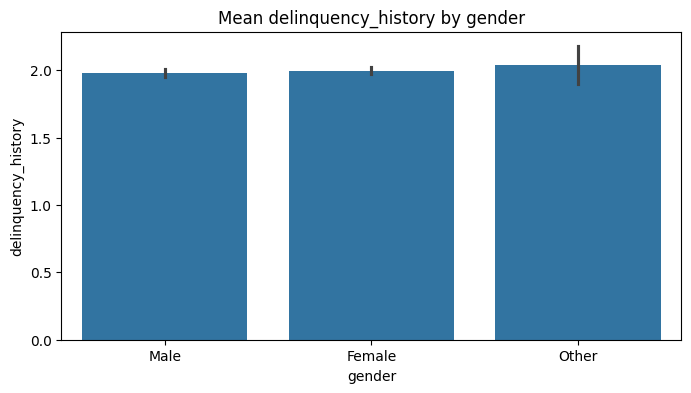

gender
Female    0.062986
Male      0.059878
Other     0.076744
Name: public_records, dtype: float64

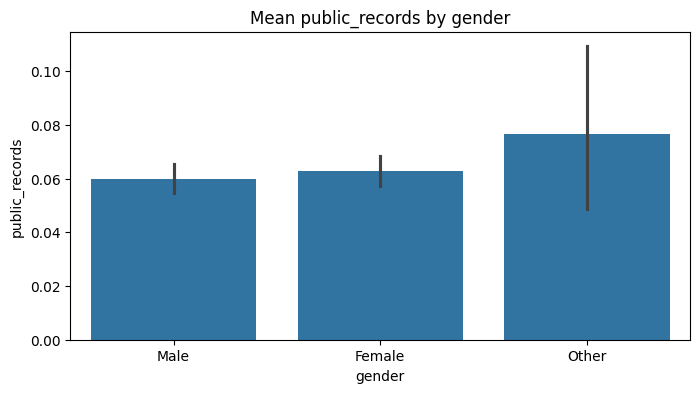

gender
Female    2.494419
Male      2.481124
Other     2.544186
Name: num_of_delinquencies, dtype: float64

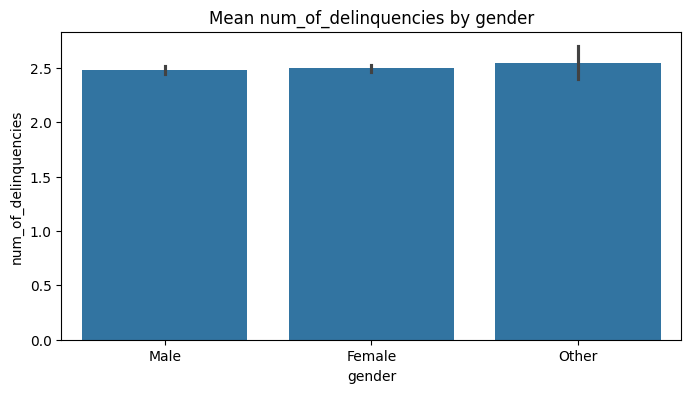

gender
Female    0.802472
Male      0.797504
Other     0.793023
Name: loan_paid_back, dtype: float64

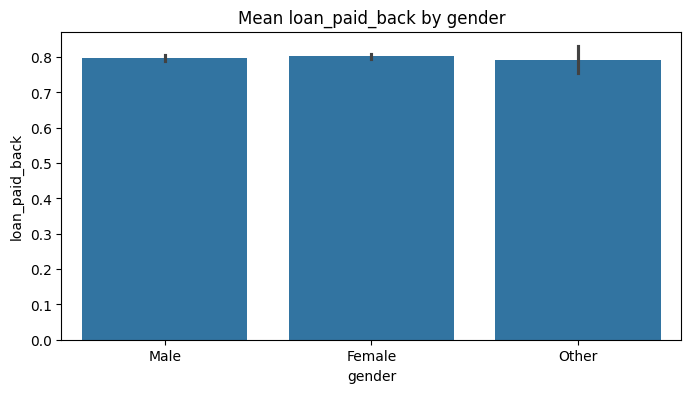

marital_status
Divorced    47.900560
Married     48.108759
Single      47.983058
Widowed     47.751323
Name: age, dtype: float64

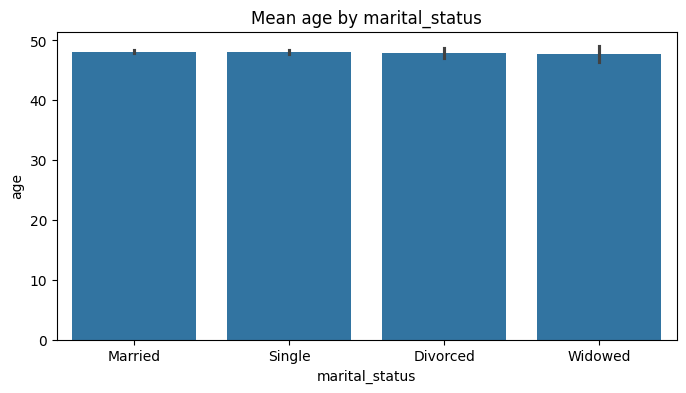

marital_status
Divorced    44827.695133
Married     43485.627908
Single      43423.185331
Widowed     43358.016032
Name: annual_income, dtype: float64

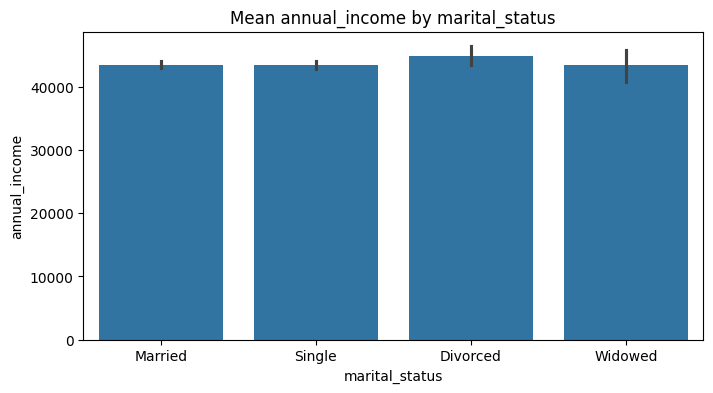

marital_status
Divorced    3735.641310
Married     3623.802301
Single      3618.598759
Widowed     3613.168042
Name: monthly_income, dtype: float64

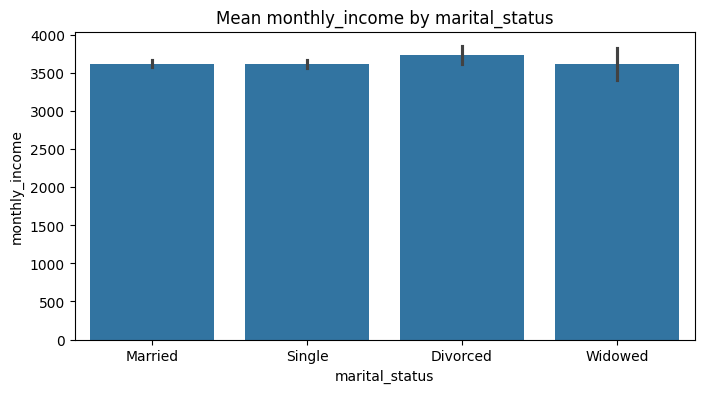

marital_status
Divorced    0.177400
Married     0.175871
Single      0.178383
Widowed     0.172524
Name: debt_to_income_ratio, dtype: float64

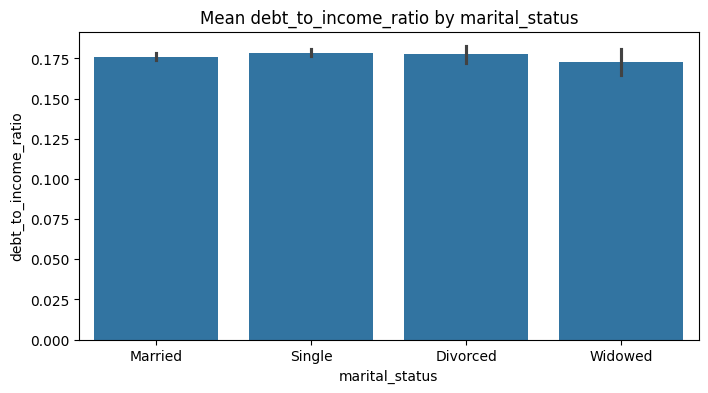

marital_status
Divorced    676.313025
Married     679.110319
Single      680.082272
Widowed     675.846561
Name: credit_score, dtype: float64

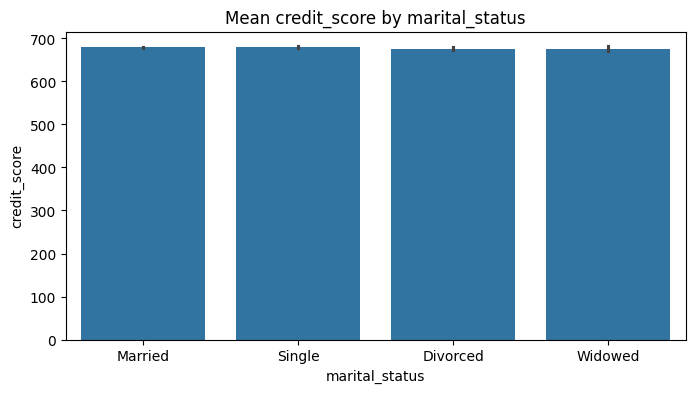

marital_status
Divorced    14959.709895
Married     15152.716621
Single      15093.854390
Widowed     15750.395908
Name: loan_amount, dtype: float64

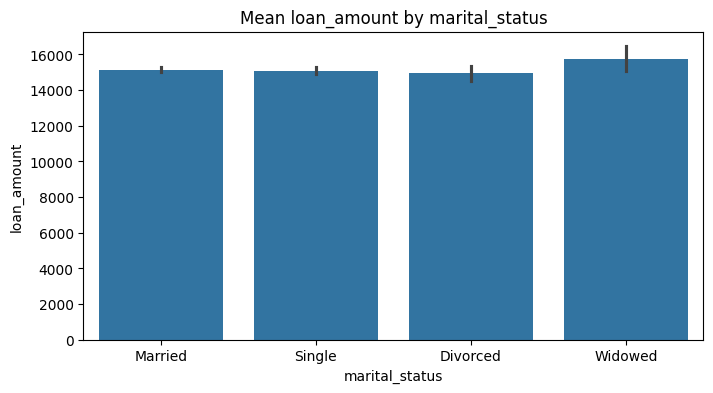

marital_status
Divorced    12.476183
Married     12.387693
Single      12.405492
Widowed     12.337531
Name: interest_rate, dtype: float64

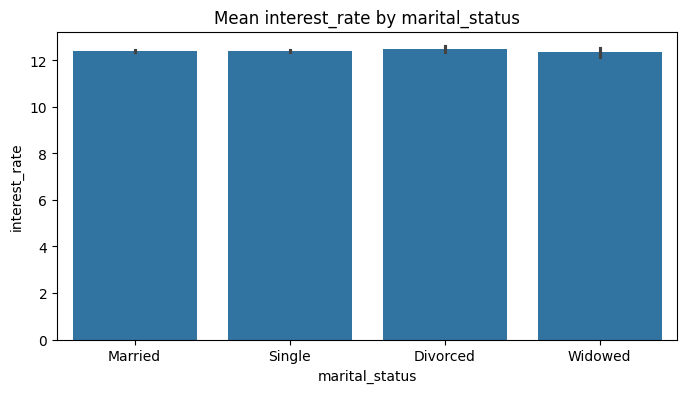

marital_status
Divorced    43.428571
Married     43.025630
Single      43.438379
Widowed     42.391534
Name: loan_term, dtype: float64

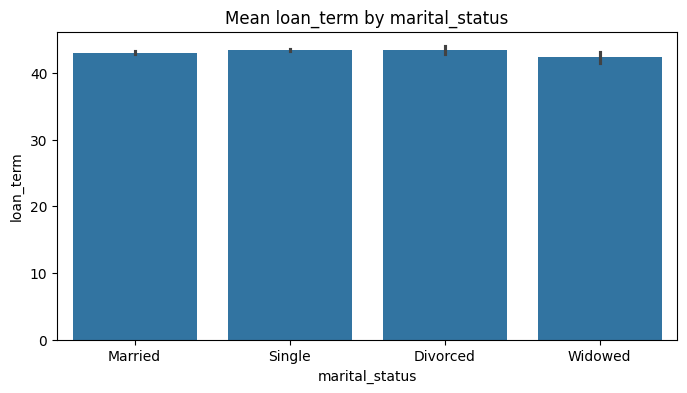

marital_status
Divorced    450.360196
Married     458.326317
Single      452.302528
Widowed     479.077619
Name: installment, dtype: float64

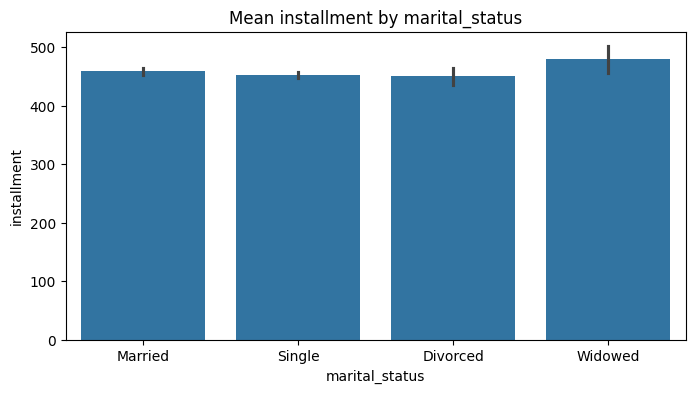

marital_status
Divorced    5.022409
Married     5.023512
Single      5.004983
Widowed     4.908289
Name: num_of_open_accounts, dtype: float64

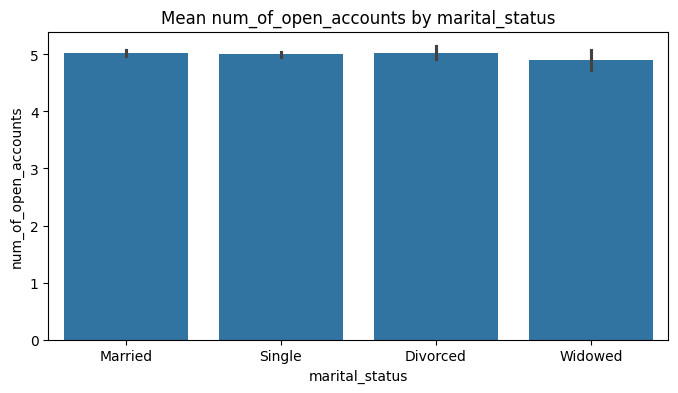

marital_status
Divorced    49996.095714
Married     48858.839924
Single      48326.813196
Widowed     47095.928131
Name: total_credit_limit, dtype: float64

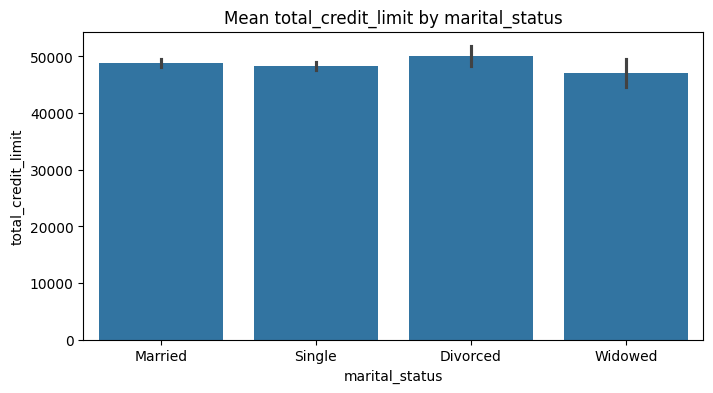

marital_status
Divorced    24718.306912
Married     24394.341423
Single      24254.470485
Widowed     23656.450582
Name: current_balance, dtype: float64

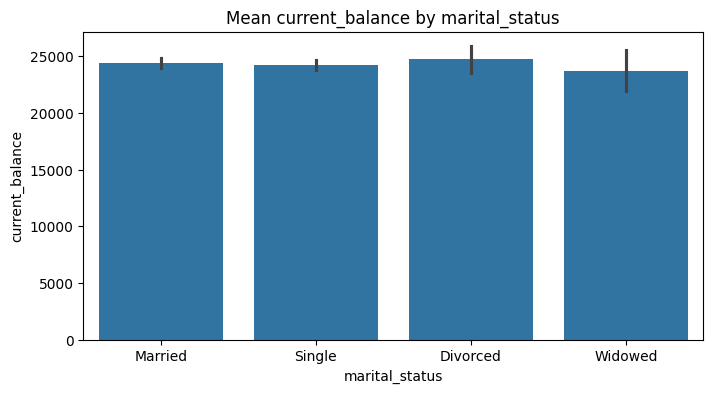

marital_status
Divorced    1.964286
Married     1.981056
Single      2.004429
Widowed     1.971781
Name: delinquency_history, dtype: float64

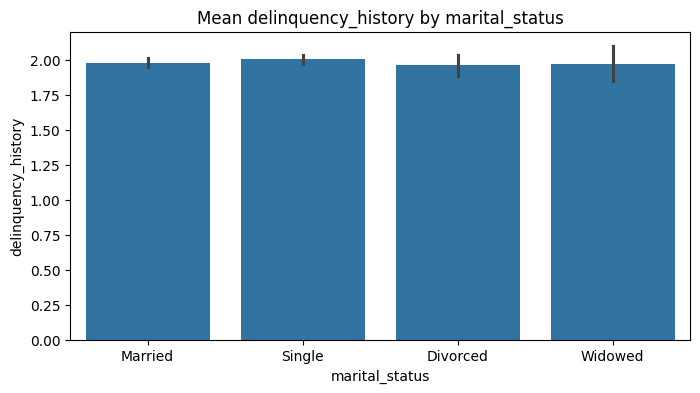

marital_status
Divorced    0.056723
Married     0.061622
Single      0.062784
Widowed     0.061728
Name: public_records, dtype: float64

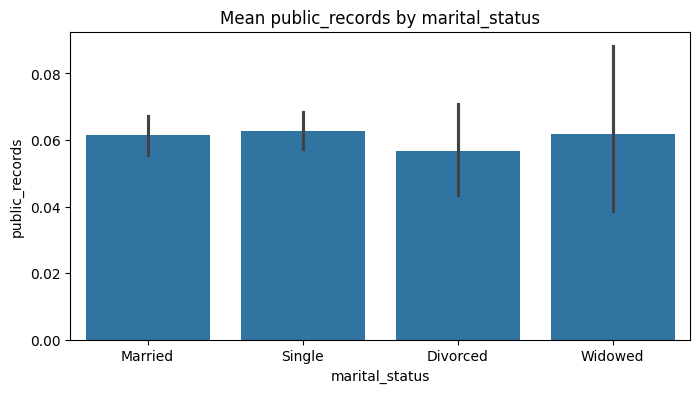

marital_status
Divorced    2.471289
Married     2.479719
Single      2.504817
Widowed     2.433862
Name: num_of_delinquencies, dtype: float64

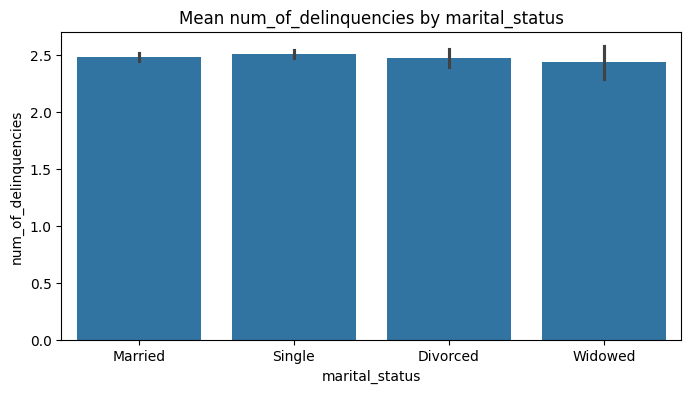

marital_status
Divorced    0.805322
Married     0.800312
Single      0.799579
Widowed     0.784832
Name: loan_paid_back, dtype: float64

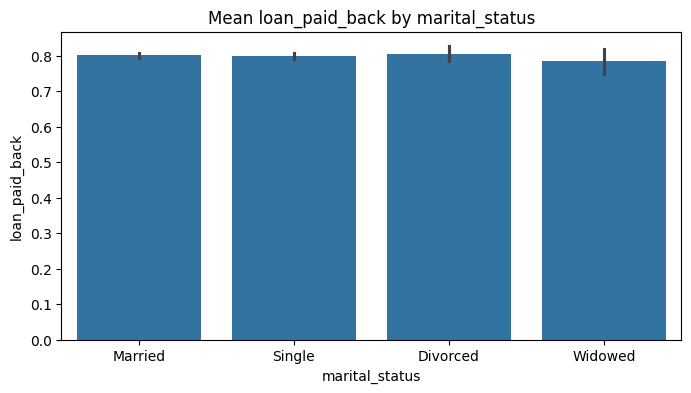

education_level
Bachelor's     47.857800
High School    48.052712
Master's       48.611708
Other          47.242042
PhD            48.294776
Name: age, dtype: float64

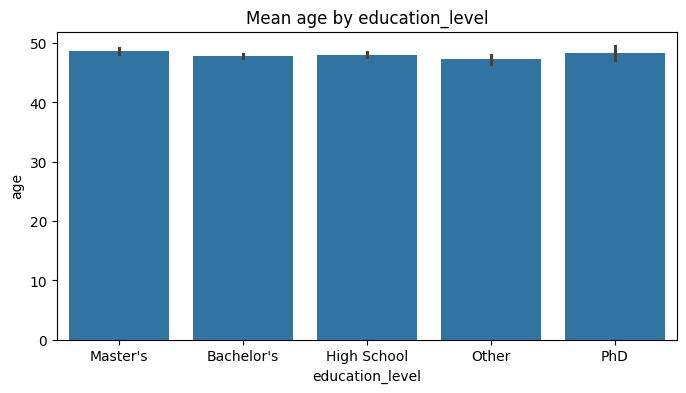

education_level
Bachelor's     43689.492167
High School    43418.885690
Master's       43166.274621
Other          44081.247288
PhD            43891.391580
Name: annual_income, dtype: float64

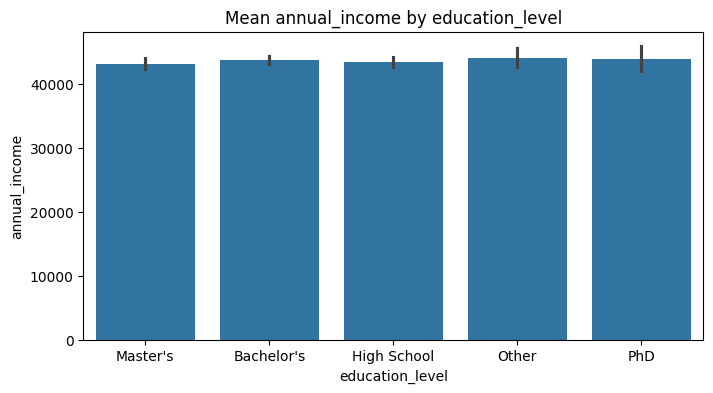

education_level
Bachelor's     3640.790988
High School    3618.240492
Master's       3597.189562
Other          3673.437089
PhD            3657.616020
Name: monthly_income, dtype: float64

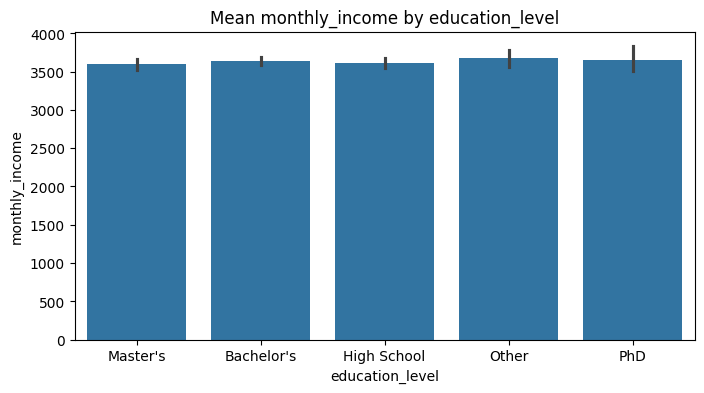

education_level
Bachelor's     0.177233
High School    0.177668
Master's       0.176536
Other          0.175085
PhD            0.175964
Name: debt_to_income_ratio, dtype: float64

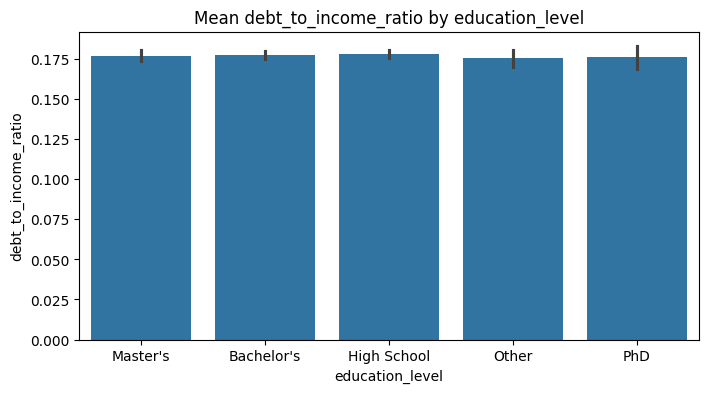

education_level
Bachelor's     679.554506
High School    678.878358
Master's       679.175886
Other          678.261273
PhD            681.309701
Name: credit_score, dtype: float64

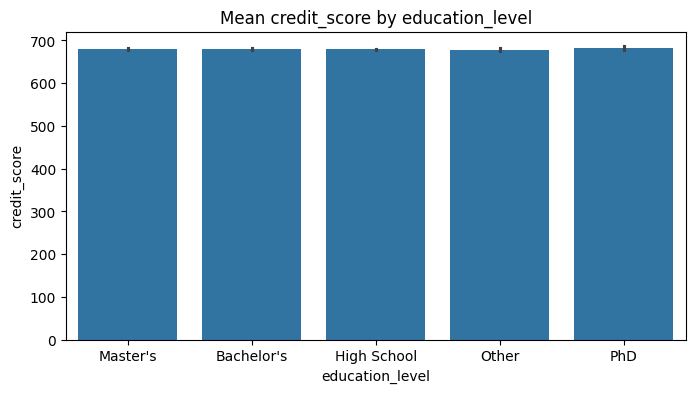

education_level
Bachelor's     15130.192840
High School    15241.243347
Master's       14943.836582
Other          15138.816180
PhD            15137.456679
Name: loan_amount, dtype: float64

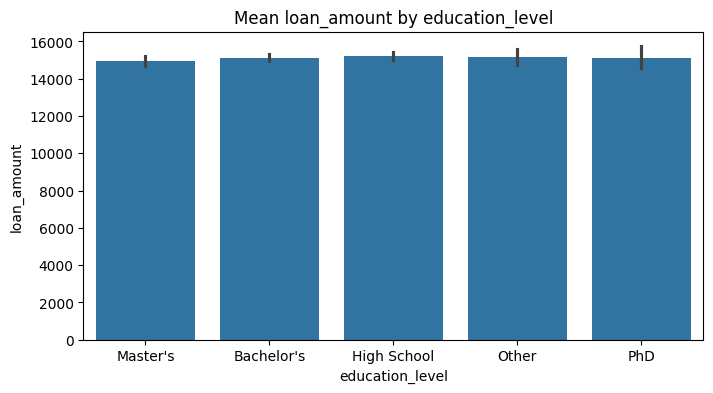

education_level
Bachelor's     12.388465
High School    12.426118
Master's       12.366066
Other          12.424635
PhD            12.449701
Name: interest_rate, dtype: float64

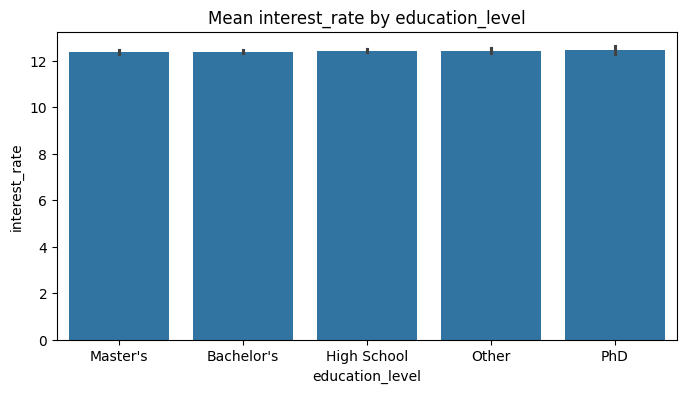

education_level
Bachelor's     43.055314
High School    43.468829
Master's       43.044039
Other          43.511936
PhD            43.373134
Name: loan_term, dtype: float64

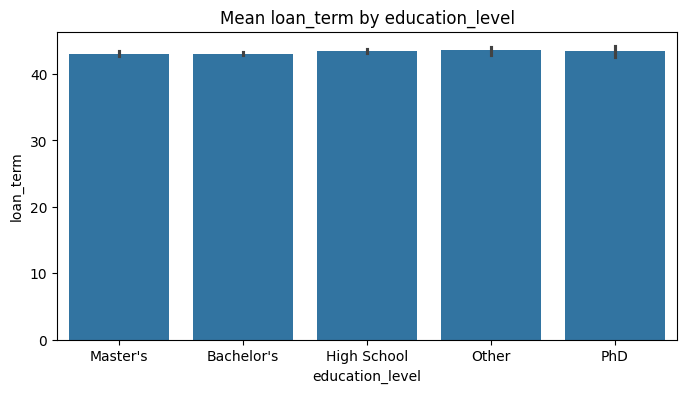

education_level
Bachelor's     457.498247
High School    456.994541
Master's       450.296643
Other          453.345106
PhD            455.774453
Name: installment, dtype: float64

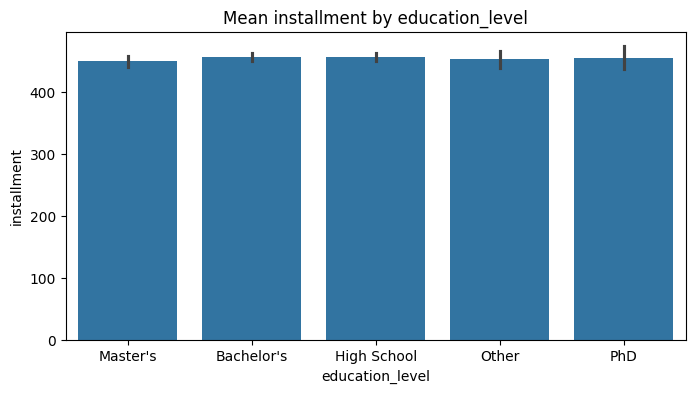

education_level
Bachelor's     4.974394
High School    5.023653
Master's       5.056122
Other          5.078249
PhD            4.968905
Name: num_of_open_accounts, dtype: float64

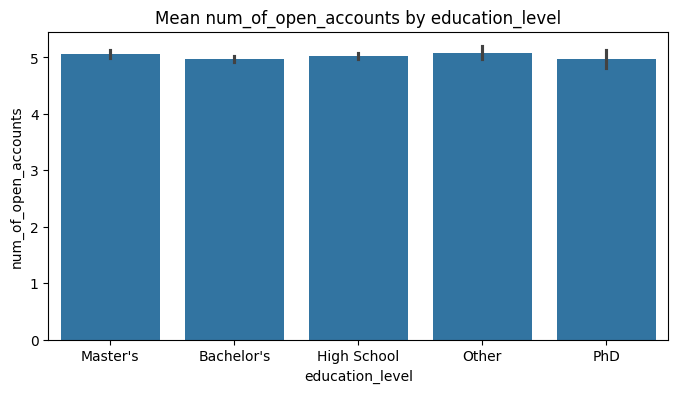

education_level
Bachelor's     48993.774568
High School    48424.167309
Master's       48350.762261
Other          48501.920895
PhD            48532.086206
Name: total_credit_limit, dtype: float64

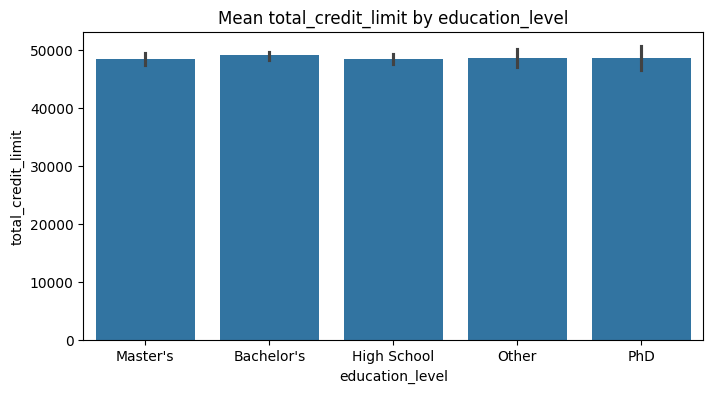

education_level
Bachelor's     24486.236198
High School    24220.306510
Master's       24165.850564
Other          24440.075968
PhD            24212.520062
Name: current_balance, dtype: float64

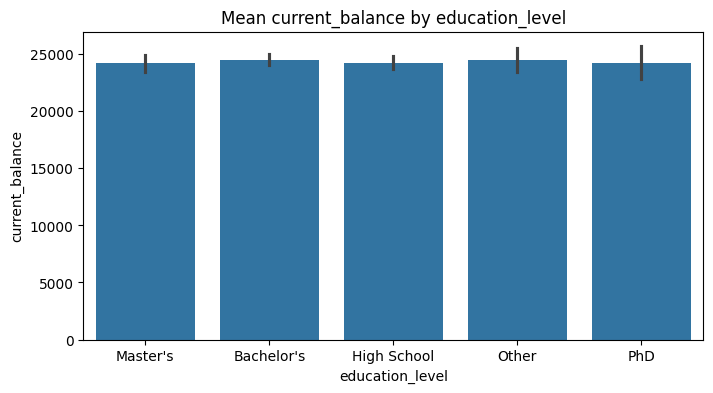

education_level
Bachelor's     1.985581
High School    2.012164
Master's       1.943878
Other          2.015915
PhD            2.039801
Name: delinquency_history, dtype: float64

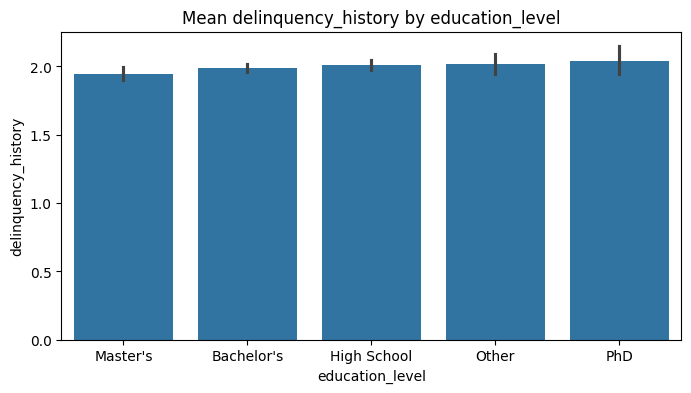

education_level
Bachelor's     0.057303
High School    0.065552
Master's       0.067938
Other          0.055703
PhD            0.062189
Name: public_records, dtype: float64

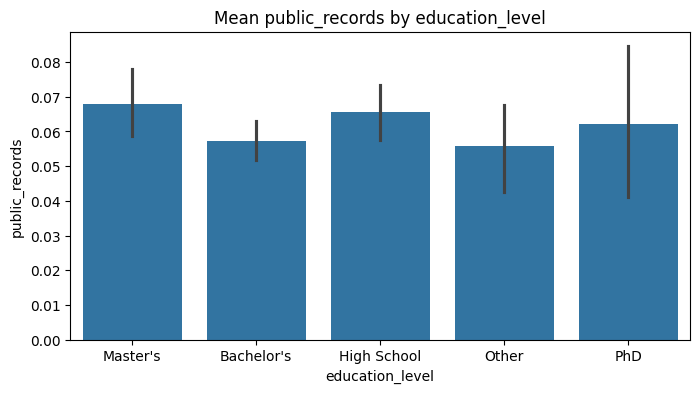

education_level
Bachelor's     2.484773
High School    2.512756
Master's       2.455156
Other          2.502653
PhD            2.491294
Name: num_of_delinquencies, dtype: float64

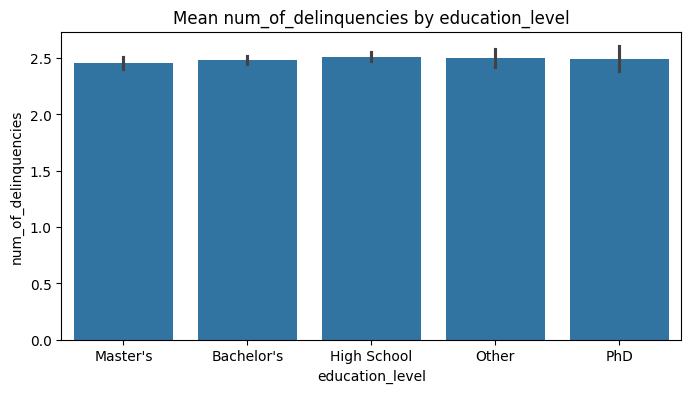

education_level
Bachelor's     0.791299
High School    0.808076
Master's       0.797798
Other          0.803714
PhD            0.828358
Name: loan_paid_back, dtype: float64

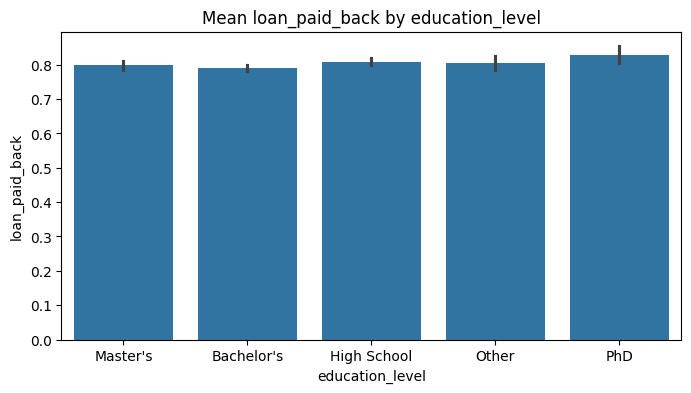

employment_status
Employed         48.123241
Retired          47.922619
Self-employed    48.132056
Student          48.279129
Unemployed       47.254141
Name: age, dtype: float64

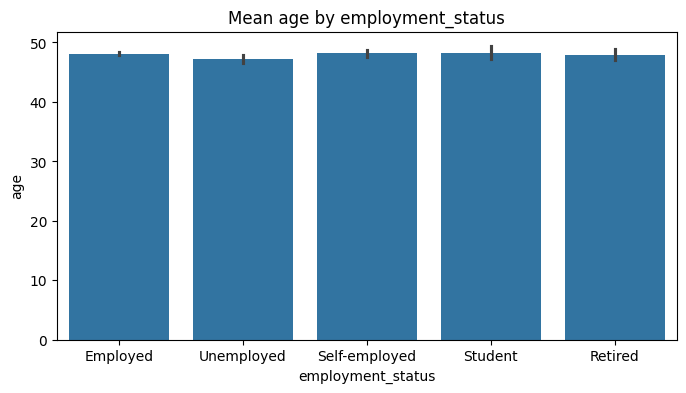

employment_status
Employed         43489.548310
Retired          43006.526386
Self-employed    44005.778748
Student          44395.920666
Unemployed       43278.002882
Name: annual_income, dtype: float64

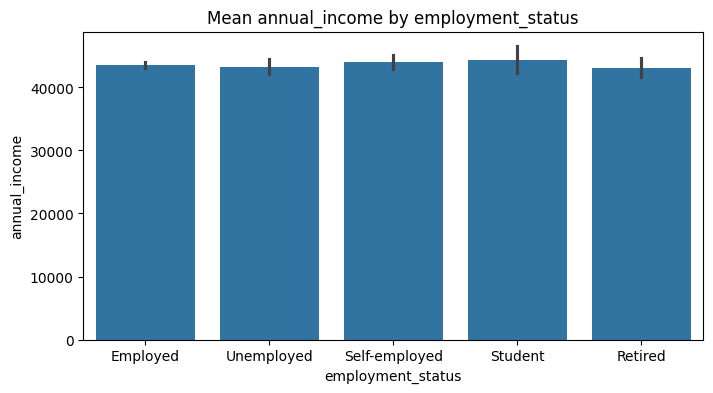

employment_status
Employed         3624.129019
Retired          3583.877279
Self-employed    3667.148190
Student          3699.659770
Unemployed       3606.500256
Name: monthly_income, dtype: float64

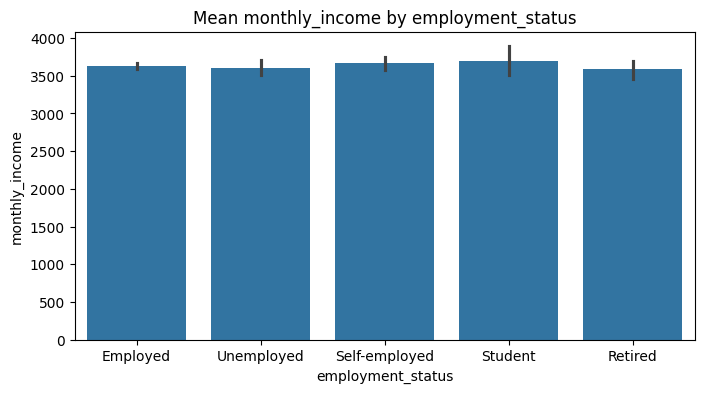

employment_status
Employed         0.176532
Retired          0.172577
Self-employed    0.175640
Student          0.182894
Unemployed       0.182228
Name: debt_to_income_ratio, dtype: float64

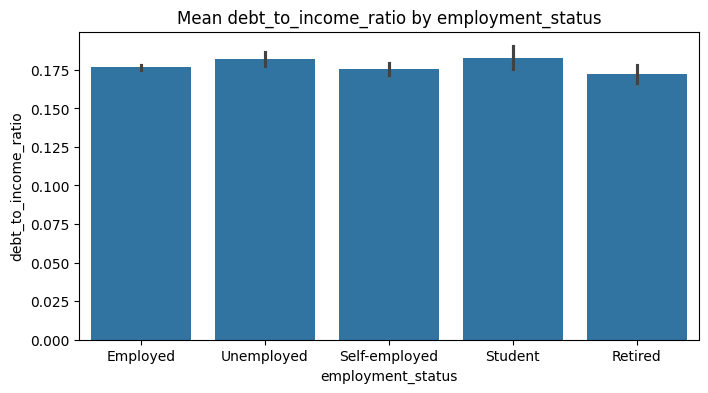

employment_status
Employed         678.851157
Retired          681.308673
Self-employed    680.387615
Student          681.265045
Unemployed       678.306673
Name: credit_score, dtype: float64

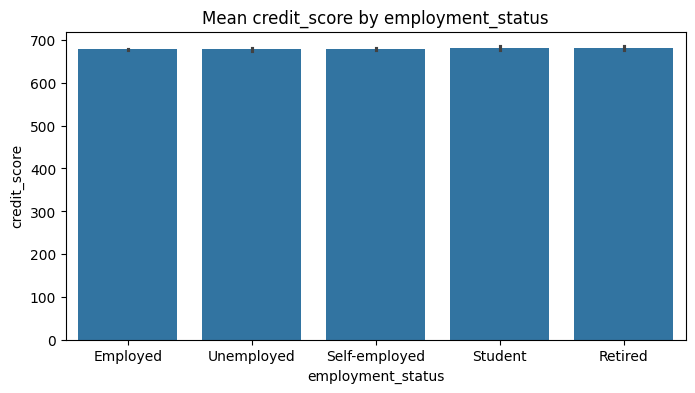

employment_status
Employed         15068.407566
Retired          15125.132866
Self-employed    15218.411598
Student          15670.936146
Unemployed       15182.994075
Name: loan_amount, dtype: float64

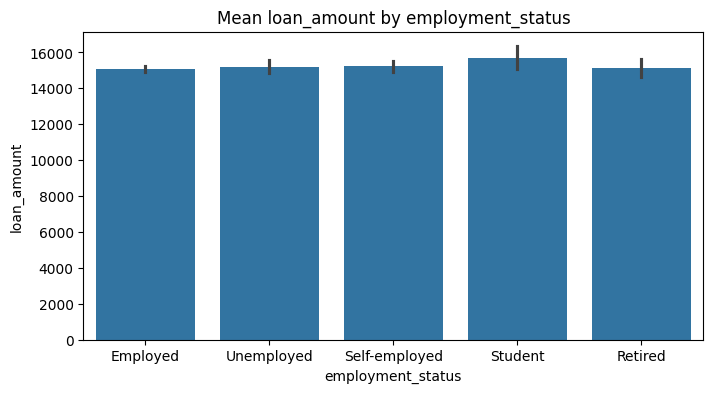

employment_status
Employed         12.403504
Retired          12.370400
Self-employed    12.424447
Student          12.360832
Unemployed       12.381491
Name: interest_rate, dtype: float64

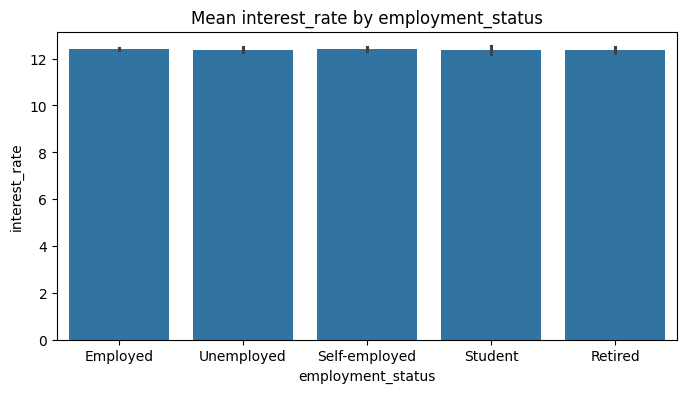

employment_status
Employed         43.197970
Retired          43.244898
Self-employed    43.348614
Student          43.037132
Unemployed       43.257927
Name: loan_term, dtype: float64

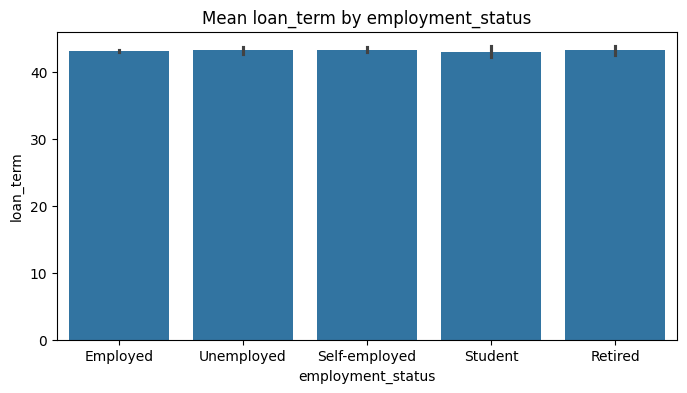

employment_status
Employed         454.100883
Retired          453.745723
Self-employed    457.362733
Student          472.028540
Unemployed       457.593545
Name: installment, dtype: float64

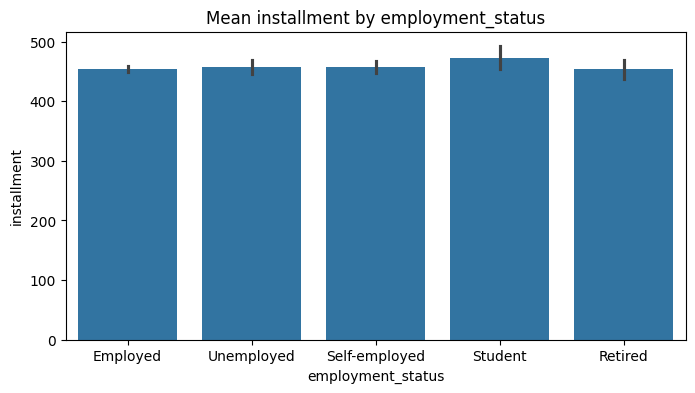

employment_status
Employed         5.003306
Retired          5.039116
Self-employed    5.071160
Student          4.902689
Unemployed       5.007099
Name: num_of_open_accounts, dtype: float64

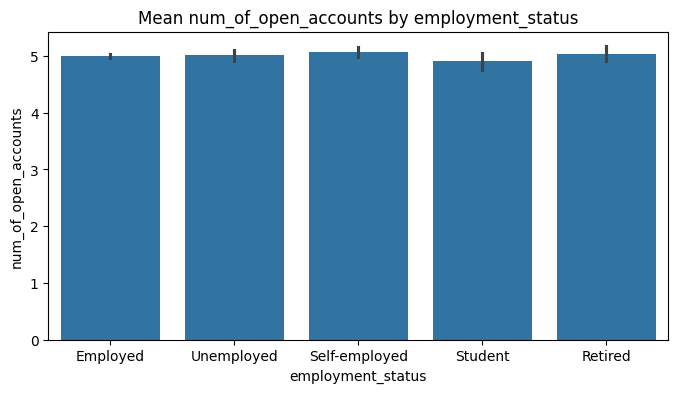

employment_status
Employed         48655.055390
Retired          47284.635859
Self-employed    49230.233041
Student          48876.920538
Unemployed       48490.587804
Name: total_credit_limit, dtype: float64

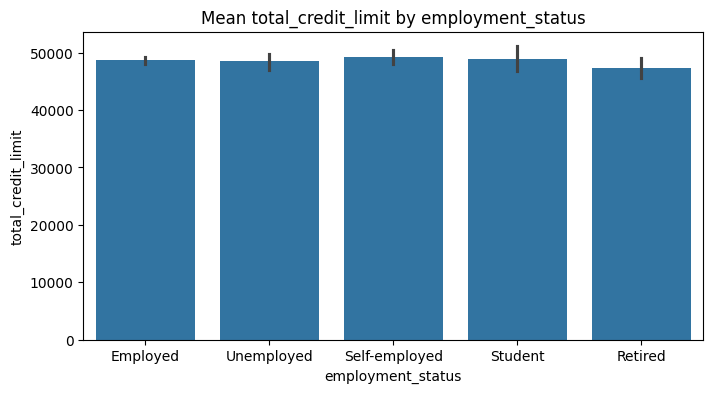

employment_status
Employed         24234.262566
Retired          24098.505842
Self-employed    24632.419285
Student          24992.962458
Unemployed       24416.910232
Name: current_balance, dtype: float64

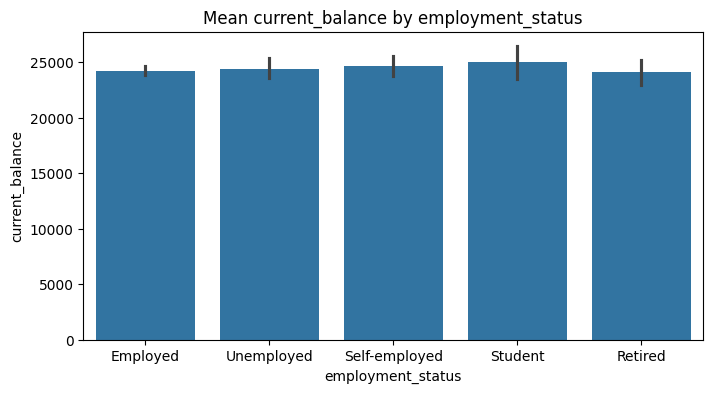

employment_status
Employed         1.997540
Retired          1.902211
Self-employed    1.979815
Student          1.896287
Unemployed       2.042593
Name: delinquency_history, dtype: float64

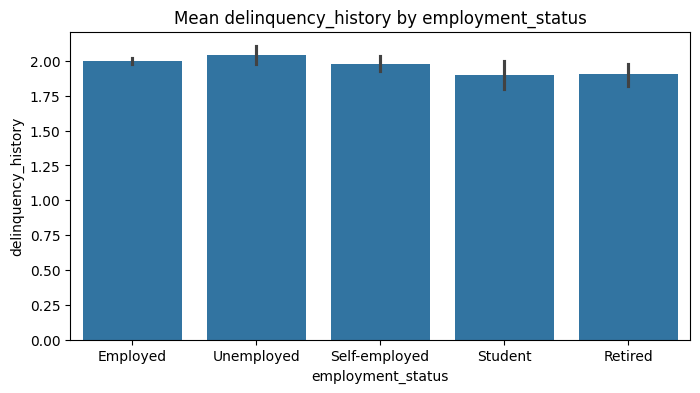

employment_status
Employed         0.063581
Retired          0.066327
Self-employed    0.056107
Student          0.061460
Unemployed       0.056318
Name: public_records, dtype: float64

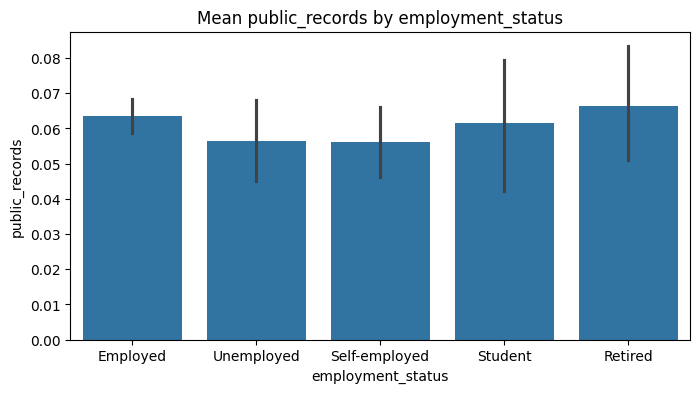

employment_status
Employed         2.503883
Retired          2.403912
Self-employed    2.464933
Student          2.353393
Unemployed       2.529579
Name: num_of_delinquencies, dtype: float64

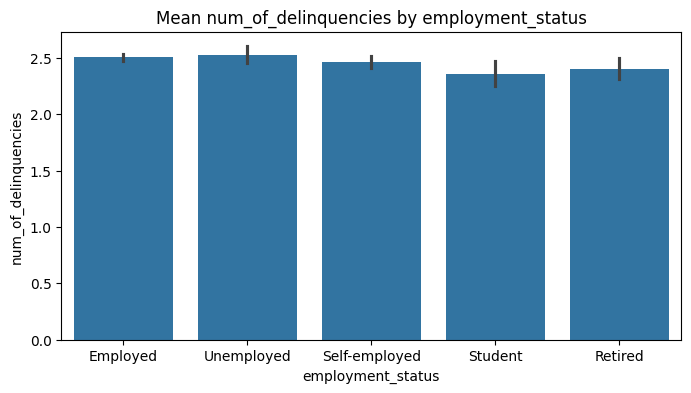

employment_status
Employed         0.886984
Retired          0.994898
Self-employed    0.885734
Student          0.407170
Unemployed       0.181732
Name: loan_paid_back, dtype: float64

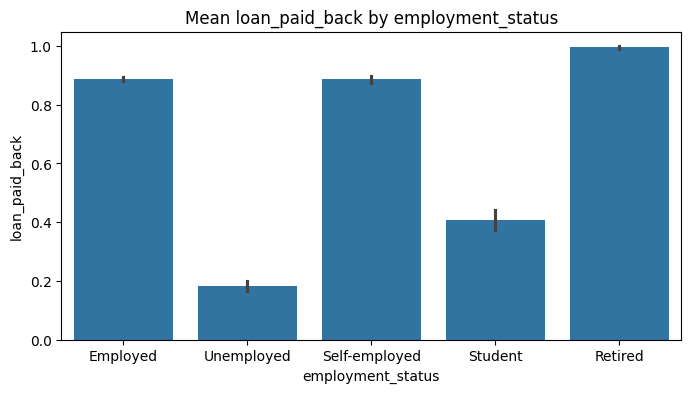

loan_purpose
Business              47.976673
Car                   48.541423
Debt consolidation    47.956396
Education             48.517612
Home                  47.631846
Medical               47.902174
Other                 47.812549
Vacation              48.141680
Name: age, dtype: float64

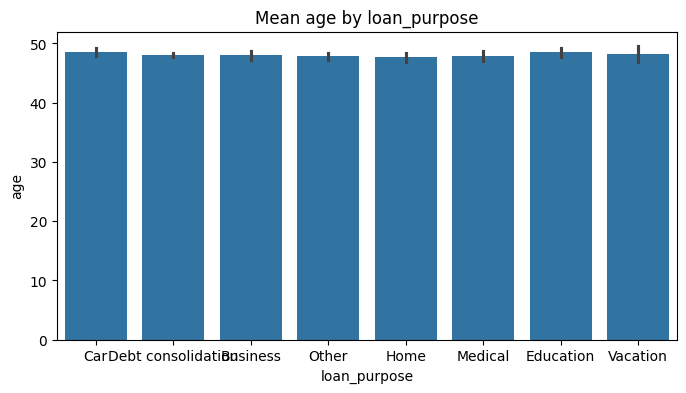

loan_purpose
Business              44737.282130
Car                   43692.597406
Debt consolidation    43259.522184
Education             43851.353654
Home                  43651.658656
Medical               43365.086722
Other                 43382.606992
Vacation              43515.302438
Name: annual_income, dtype: float64

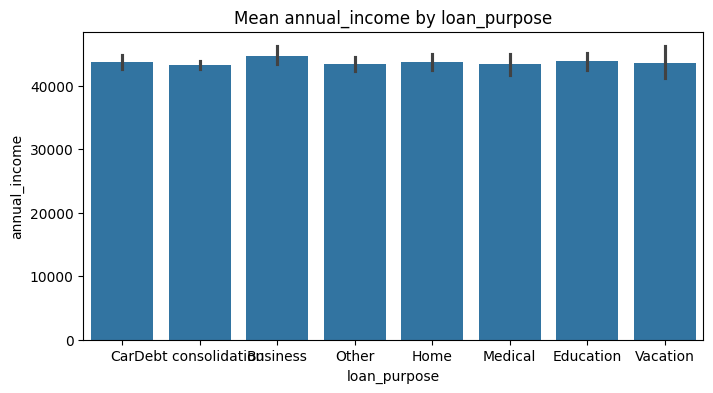

loan_purpose
Business              3728.106943
Car                   3641.049711
Debt consolidation    3604.960190
Education             3654.279391
Home                  3637.638266
Medical               3613.757199
Other                 3615.217184
Vacation              3626.275025
Name: monthly_income, dtype: float64

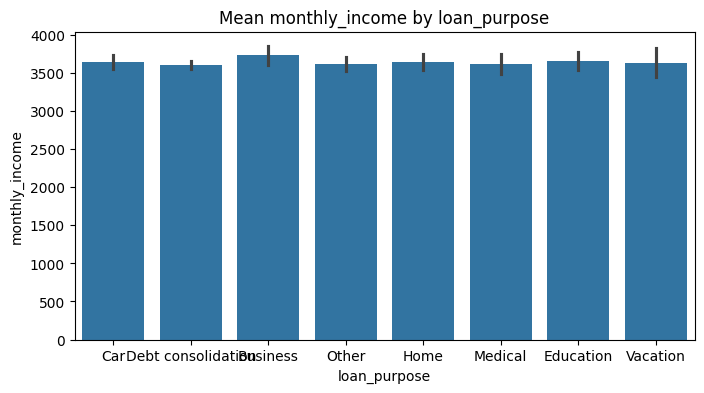

loan_purpose
Business              0.178840
Car                   0.180602
Debt consolidation    0.174795
Education             0.175754
Home                  0.178845
Medical               0.176315
Other                 0.177975
Vacation              0.182211
Name: debt_to_income_ratio, dtype: float64

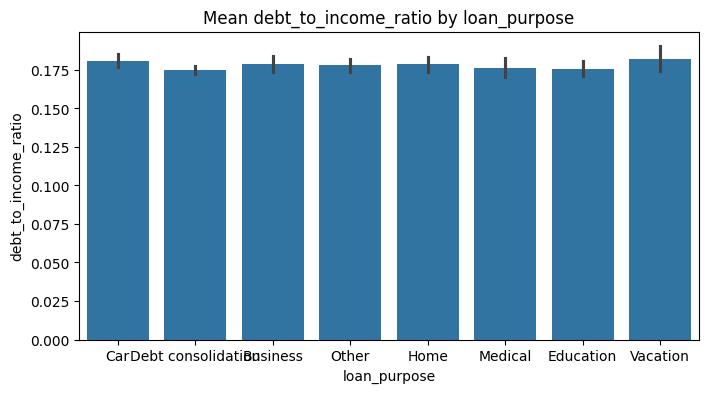

loan_purpose
Business              681.687538
Car                   678.380753
Debt consolidation    679.056635
Education             678.663881
Home                  680.963489
Medical               678.084448
Other                 678.841569
Vacation              678.965404
Name: credit_score, dtype: float64

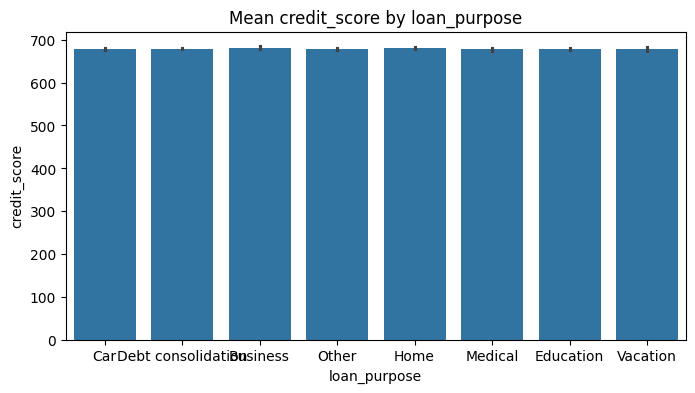

loan_purpose
Business              14841.053278
Car                   14891.780732
Debt consolidation    15250.106817
Education             14925.256931
Home                  15281.320517
Medical               15061.585134
Other                 15294.049090
Vacation              14760.186985
Name: loan_amount, dtype: float64

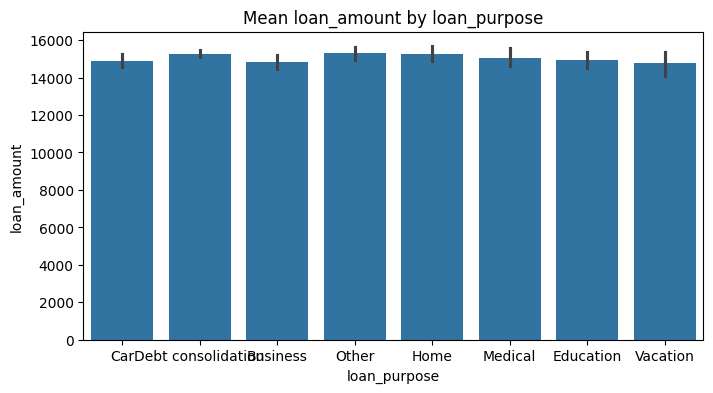

loan_purpose
Business              12.413794
Car                   12.402318
Debt consolidation    12.390472
Education             12.436101
Home                  12.365208
Medical               12.402734
Other                 12.402176
Vacation              12.498649
Name: interest_rate, dtype: float64

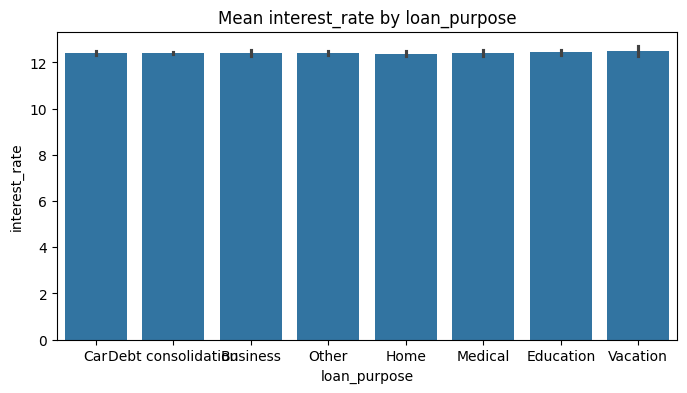

loan_purpose
Business              43.646409
Car                   43.250209
Debt consolidation    43.235184
Education             43.063881
Home                  43.022312
Medical               43.244147
Other                 43.284706
Vacation              42.602965
Name: loan_term, dtype: float64

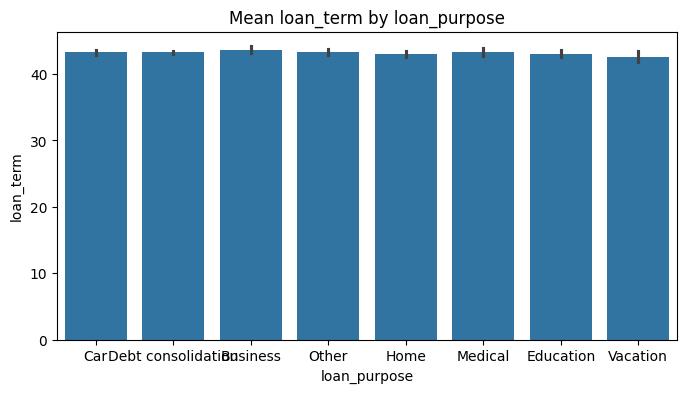

loan_purpose
Business              443.498343
Car                   448.535322
Debt consolidation    459.130574
Education             451.009522
Home                  459.885396
Medical               454.217742
Other                 460.974396
Vacation              449.213278
Name: installment, dtype: float64

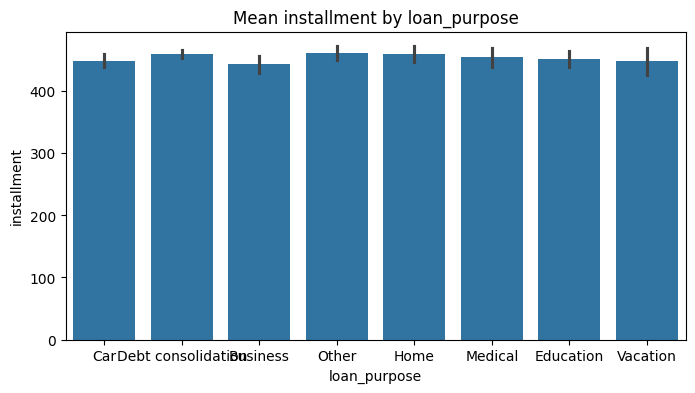

loan_purpose
Business              4.980970
Car                   4.970711
Debt consolidation    5.007894
Education             5.127761
Home                  4.967039
Medical               4.986622
Other                 5.054902
Vacation              5.001647
Name: num_of_open_accounts, dtype: float64

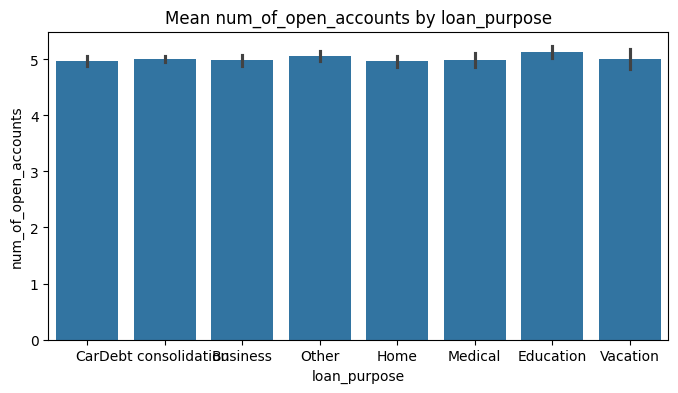

loan_purpose
Business              49238.051903
Car                   49251.892339
Debt consolidation    48182.916246
Education             48683.295009
Home                  48721.492094
Medical               49069.868403
Other                 48763.612365
Vacation              49208.823542
Name: total_credit_limit, dtype: float64

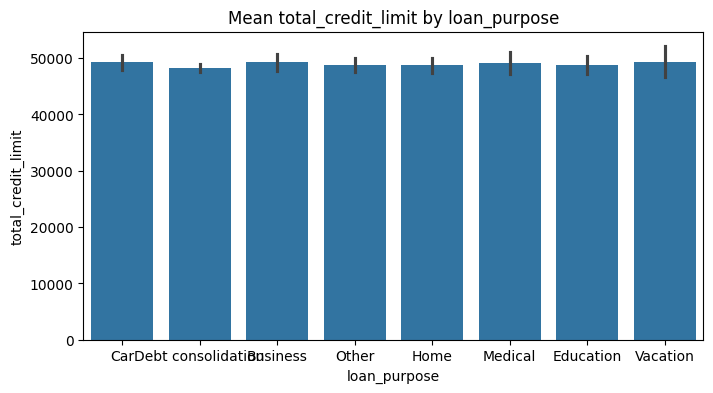

loan_purpose
Business              24444.751436
Car                   24474.015477
Debt consolidation    24291.275318
Education             24067.491755
Home                  24980.821704
Medical               23603.879724
Other                 24131.072945
Vacation              24952.425025
Name: current_balance, dtype: float64

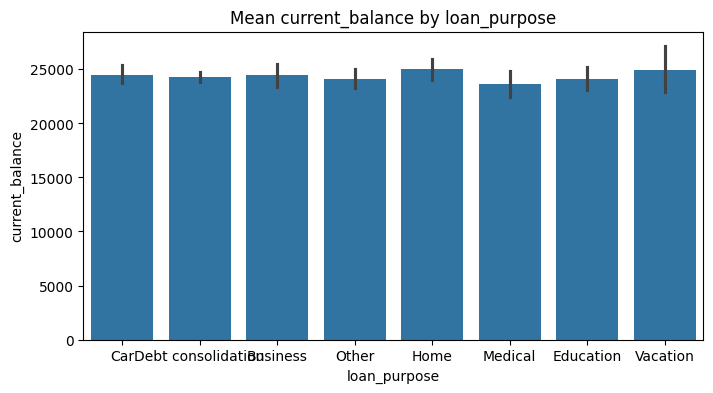

loan_purpose
Business              2.020258
Car                   1.935983
Debt consolidation    1.989726
Education             2.034030
Home                  1.989858
Medical               2.004181
Other                 1.988235
Vacation              1.988468
Name: delinquency_history, dtype: float64

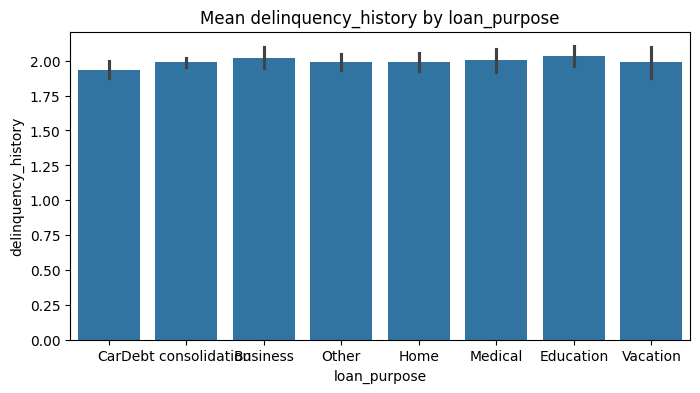

loan_purpose
Business              0.050952
Car                   0.061925
Debt consolidation    0.064528
Education             0.057910
Home                  0.065416
Medical               0.054348
Other                 0.061961
Vacation              0.067545
Name: public_records, dtype: float64

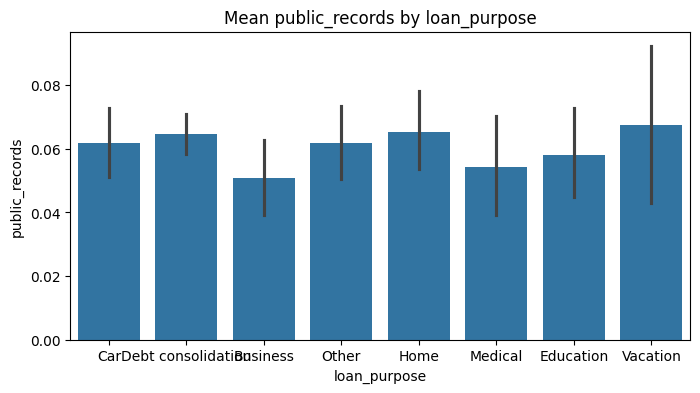

loan_purpose
Business              2.499079
Car                   2.433054
Debt consolidation    2.486155
Education             2.568358
Home                  2.493915
Medical               2.514214
Other                 2.470588
Vacation              2.517298
Name: num_of_delinquencies, dtype: float64

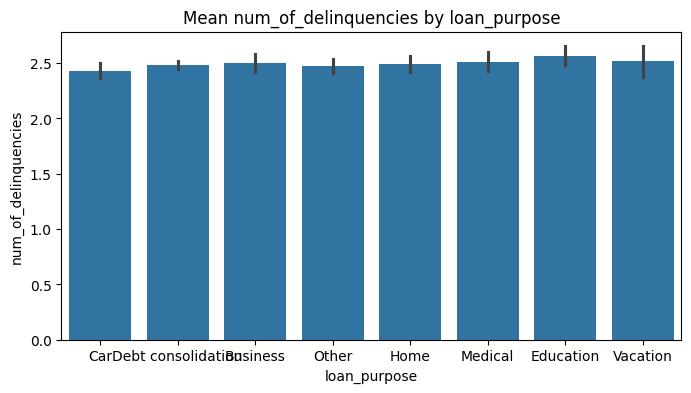

loan_purpose
Business              0.809085
Car                   0.798326
Debt consolidation    0.799399
Education             0.777910
Home                  0.824037
Medical               0.782609
Other                 0.802745
Vacation              0.792422
Name: loan_paid_back, dtype: float64

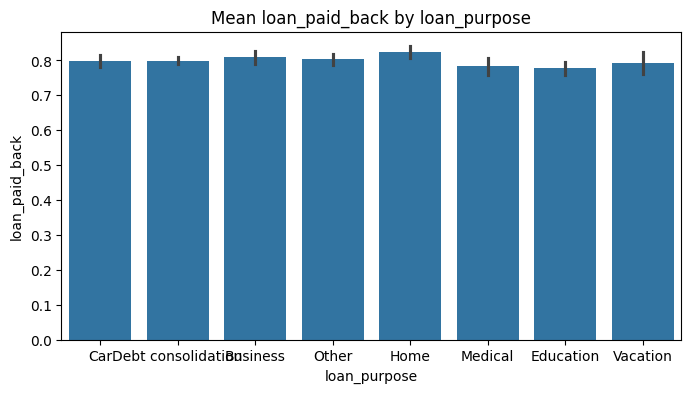

grade_subgrade
A1    48.026667
A2    47.098901
A3    47.112903
A4    46.242236
A5    47.552632
B1    47.964516
B2    48.984709
B3    48.328881
B4    48.476589
B5    48.846026
C1    48.041135
C2    48.110028
C3    47.559445
C4    47.470950
C5    48.608298
D1    48.406061
D2    47.729606
D3    48.118674
D4    48.066364
D5    48.027959
E1    48.516320
E2    48.554517
E3    46.835260
E4    48.478836
E5    46.549521
F1    47.498382
F2    47.722408
F3    46.055749
F4    48.256329
F5    49.776471
Name: age, dtype: float64

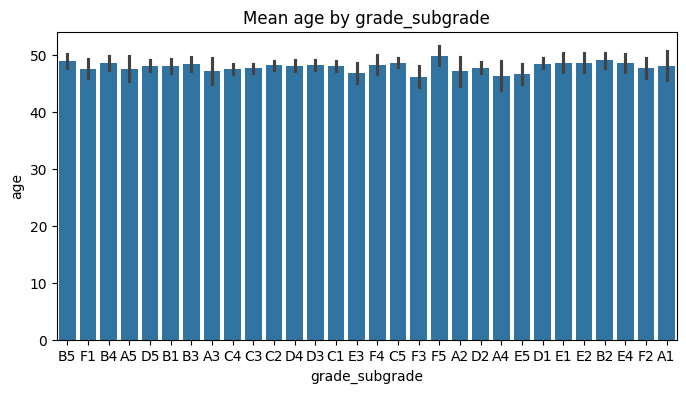

grade_subgrade
A1    41469.188000
A2    44424.213462
A3    40763.429140
A4    46461.740621
A5    41901.101474
B1    43696.680032
B2    46040.699771
B3    43725.321686
B4    43517.929649
B5    41286.477152
C1    43560.830929
C2    43565.321636
C3    44126.469049
C4    44160.131846
C5    43372.161245
D1    44181.819515
D2    43468.805087
D3    43450.388665
D4    43306.609282
D5    43033.657102
E1    42832.099674
E2    42083.999751
E3    43278.140636
E4    43562.446481
E5    43509.397700
F1    44606.535178
F2    42010.999130
F3    43278.828920
F4    44229.570000
F5    42451.087941
Name: annual_income, dtype: float64

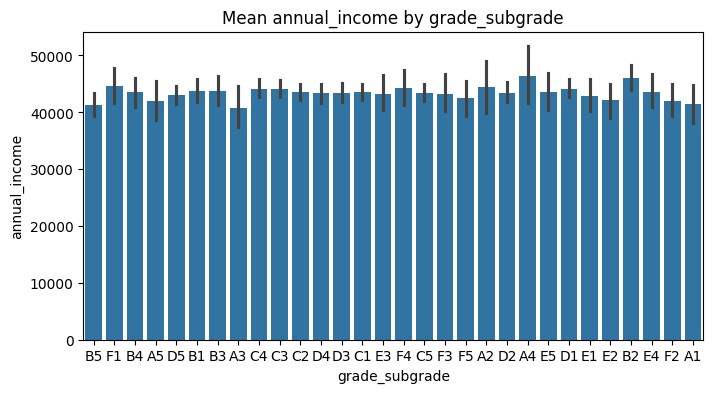

grade_subgrade
A1    3455.765733
A2    3702.017912
A3    3396.951989
A4    3871.811739
A5    3491.758789
B1    3641.389742
B2    3836.725153
B3    3643.776728
B4    3626.494197
B5    3440.540116
C1    3630.069333
C2    3630.443461
C3    3677.205561
C4    3680.010977
C5    3614.346765
D1    3681.818312
D2    3622.400348
D3    3620.865707
D4    3608.884164
D5    3586.138089
E1    3569.341513
E2    3507.000000
E3    3606.511705
E4    3630.203730
E5    3625.783131
F1    3717.211100
F2    3500.916722
F3    3606.569233
F4    3685.797215
F5    3537.590382
Name: monthly_income, dtype: float64

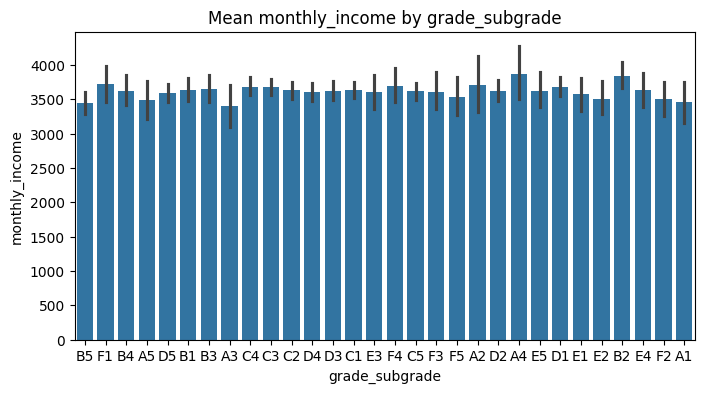

grade_subgrade
A1    0.168187
A2    0.179258
A3    0.176124
A4    0.171081
A5    0.174958
B1    0.174987
B2    0.171416
B3    0.170187
B4    0.170903
B5    0.172300
C1    0.171949
C2    0.176386
C3    0.179577
C4    0.177365
C5    0.172687
D1    0.180673
D2    0.177087
D3    0.181328
D4    0.182269
D5    0.180784
E1    0.180318
E2    0.172882
E3    0.184870
E4    0.175870
E5    0.185856
F1    0.175356
F2    0.183144
F3    0.177857
F4    0.179747
F5    0.181438
Name: debt_to_income_ratio, dtype: float64

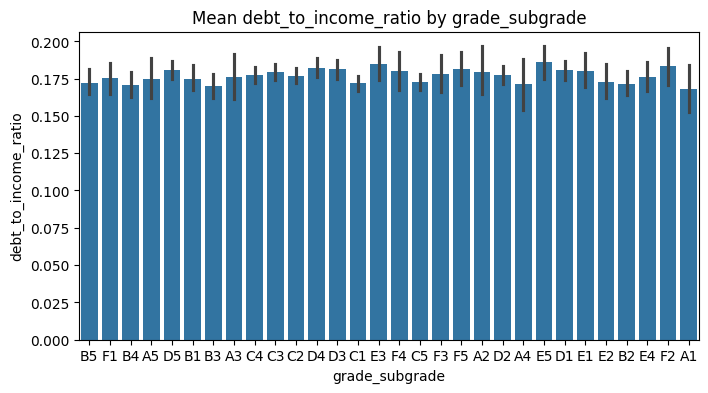

grade_subgrade
A1    822.966667
A2    822.769231
A3    822.166667
A4    824.869565
A5    821.373684
B1    763.535484
B2    763.721713
B3    763.380634
B4    764.884615
B5    765.493377
C1    702.906383
C2    701.834958
C3    701.550859
C4    701.845523
C5    702.355837
D1    642.105628
D2    642.078827
D3    642.742583
D4    642.196364
D5    642.393290
E1    595.261128
E2    595.305296
E3    595.976879
E4    596.441799
E5    594.600639
F1    546.540453
F2    547.515050
F3    547.808362
F4    548.215190
F5    549.117647
Name: credit_score, dtype: float64

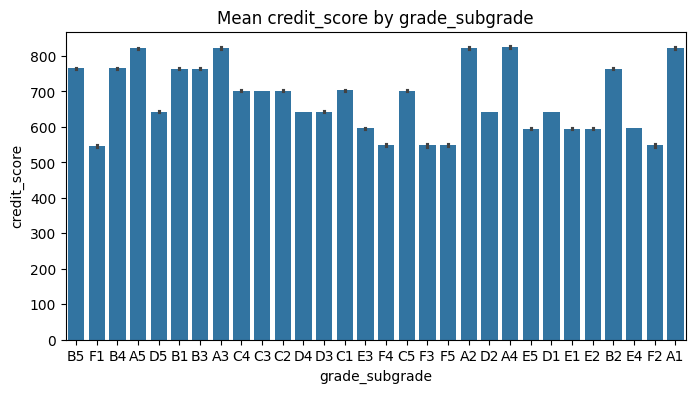

grade_subgrade
A1    14906.935133
A2    14940.259945
A3    13880.091075
A4    16920.514348
A5    15621.789526
B1    15133.047532
B2    14705.149098
B3    15126.010083
B4    15323.804599
B5    14950.047715
C1    15253.453972
C2    15372.135362
C3    15138.915601
C4    15371.838209
C5    14932.856498
D1    15194.482788
D2    15274.984445
D3    14605.083962
D4    15261.936564
D5    15114.645471
E1    15101.316231
E2    15346.986978
E3    15349.547688
E4    15290.224392
E5    15615.580000
F1    14211.438350
F2    14662.775385
F3    14740.063206
F4    15120.902563
F5    15121.906853
Name: loan_amount, dtype: float64

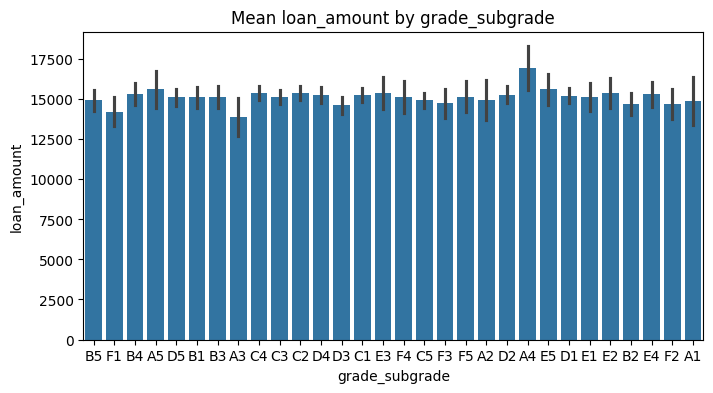

grade_subgrade
A1     9.405333
A2     9.219286
A3     9.550215
A4     9.449317
A5     9.511895
B1    10.779468
B2    10.834419
B3    10.789950
B4    10.864114
B5    10.560497
C1    11.939021
C2    11.902312
C3    11.988461
C4    11.949631
C5    11.939409
D1    13.097662
D2    13.156150
D3    13.115890
D4    13.166945
D5    13.113271
E1    14.064154
E2    14.154206
E3    14.126040
E4    13.881852
E5    14.032652
F1    15.086343
F2    14.958863
F3    14.928606
F4    15.297658
F5    14.840088
Name: interest_rate, dtype: float64

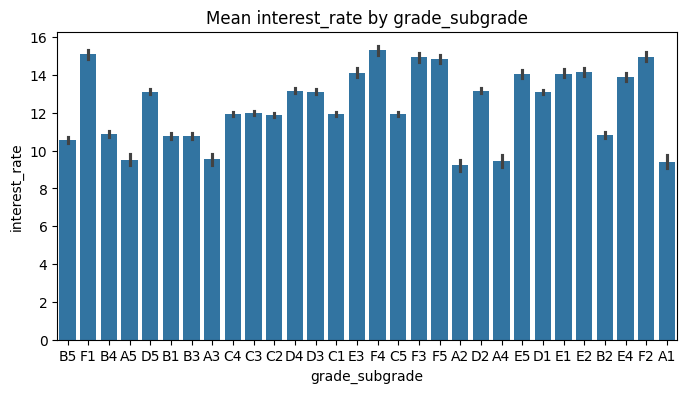

grade_subgrade
A1    44.800000
A2    43.912088
A3    42.967742
A4    44.049689
A5    43.326316
B1    43.122581
B2    42.825688
B3    43.131886
B4    43.464883
B5    43.192053
C1    43.029787
C2    43.771588
C3    43.276090
C4    43.398496
C5    43.088608
D1    42.566234
D2    43.325390
D3    42.680628
D4    43.396364
D5    43.246971
E1    42.480712
E2    43.626168
E3    43.005780
E4    42.539683
E5    43.667732
F1    43.689320
F2    42.581940
F3    43.191638
F4    44.430380
F5    43.694118
Name: loan_term, dtype: float64

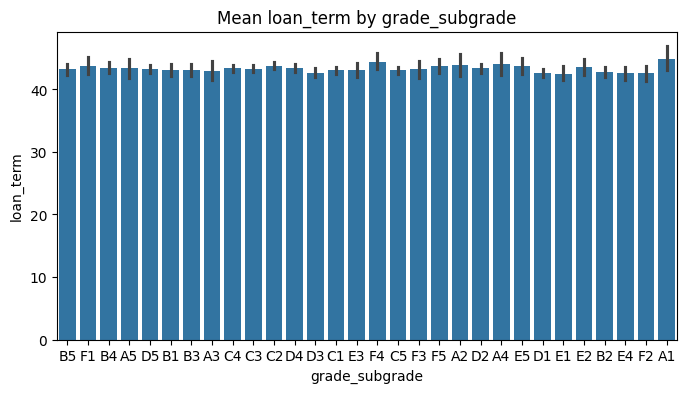

grade_subgrade
A1    415.947333
A2    422.025495
A3    402.943871
A4    478.422422
A5    446.864105
B1    443.330855
B2    437.685229
B3    445.222755
B4    447.660301
B5    437.987152
C1    457.179879
C2    453.909199
C3    451.709881
C4    457.871722
C5    447.660640
D1    467.234017
D2    465.599496
D3    448.264459
D4    465.697645
D5    460.841640
E1    472.560089
E2    471.455016
E3    473.097890
E4    476.678545
E5    477.377700
F1    445.048350
F2    463.261003
F3    462.543624
F4    468.603101
F5    472.917500
Name: installment, dtype: float64

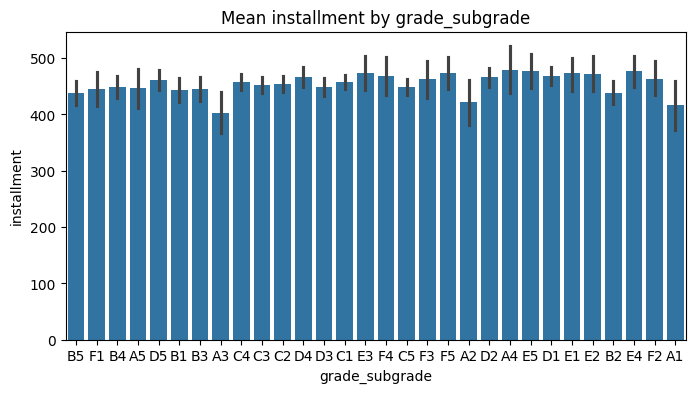

grade_subgrade
A1    4.826667
A2    5.214286
A3    5.182796
A4    5.080745
A5    4.984211
B1    5.074194
B2    5.024465
B3    5.070117
B4    4.769231
B5    5.096026
C1    5.033333
C2    5.042479
C3    5.055482
C4    4.894737
C5    4.947257
D1    5.115152
D2    5.006416
D3    5.075916
D4    4.981818
D5    4.955266
E1    4.916914
E2    5.121495
E3    4.760116
E4    5.113757
E5    5.115016
F1    4.977346
F2    5.056856
F3    5.080139
F4    5.000000
F5    4.979412
Name: num_of_open_accounts, dtype: float64

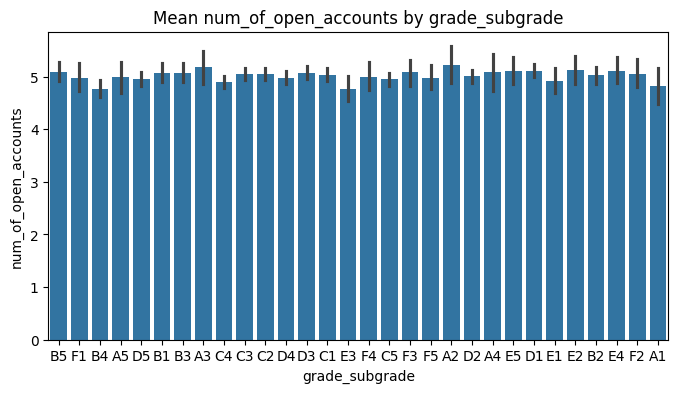

grade_subgrade
A1    45850.268333
A2    48878.115604
A3    46700.398710
A4    50792.338137
A5    46987.058053
B1    48564.153516
B2    50395.122492
B3    48965.150568
B4    49446.755602
B5    46093.029735
C1    47634.196674
C2    48236.496769
C3    49256.335812
C4    48914.093035
C5    48441.367489
D1    49520.234710
D2    49691.985032
D3    49447.372827
D4    48566.818700
D5    47381.658173
E1    47207.996588
E2    47172.456854
E3    49004.447601
E4    49556.557725
E5    49297.787029
F1    51494.046699
F2    46677.844883
F3    49071.227178
F4    49580.009399
F5    47188.408353
Name: total_credit_limit, dtype: float64

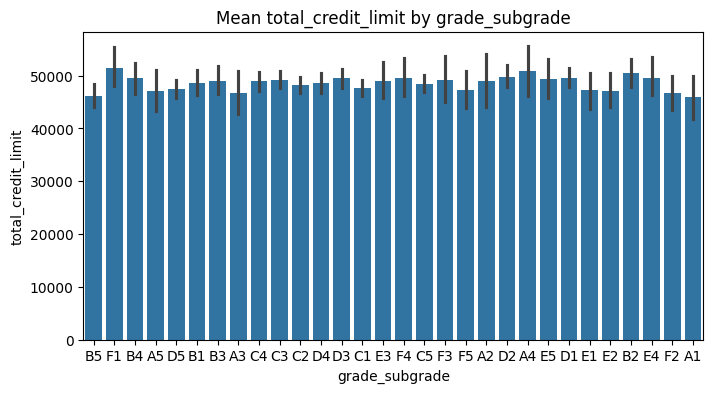

grade_subgrade
A1    21485.876133
A2    24571.387637
A3    23757.667634
A4    27980.073416
A5    21155.564842
B1    23502.177355
B2    25359.288731
B3    24442.978548
B4    24069.935903
B5    23020.036573
C1    24125.218121
C2    23557.895021
C3    24418.016843
C4    24827.516056
C5    24244.899796
D1    24478.016130
D2    24909.428194
D3    25026.352286
D4    23694.295055
D5    23907.483709
E1    24280.298516
E2    24298.995202
E3    24638.206676
E4    25290.566217
E5    24337.399649
F1    25710.019579
F2    24852.051472
F3    25257.174251
F4    24852.345854
F5    24452.112706
Name: current_balance, dtype: float64

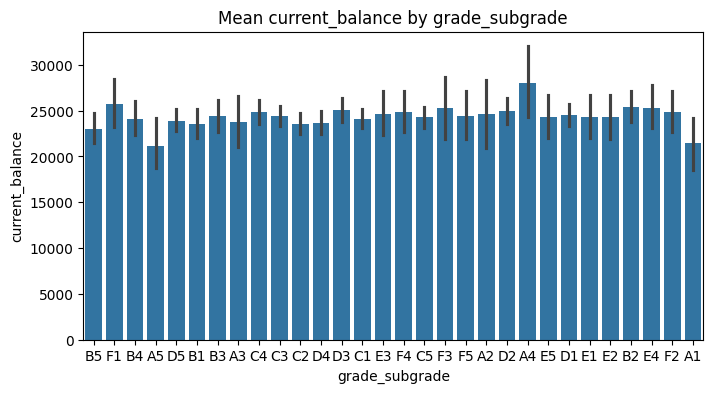

grade_subgrade
A1    1.526667
A2    1.379121
A3    1.596774
A4    1.509317
A5    1.531579
B1    1.629032
B2    1.646789
B3    1.734558
B4    1.729097
B5    1.639073
C1    1.835461
C2    1.965877
C3    1.949802
C4    1.892686
C5    1.945851
D1    2.163636
D2    2.131072
D3    2.107330
D4    2.093636
D5    2.073625
E1    2.293769
E2    2.242991
E3    2.248555
E4    2.386243
E5    2.469649
F1    2.478964
F2    2.317726
F3    2.397213
F4    2.386076
F5    2.438235
Name: delinquency_history, dtype: float64

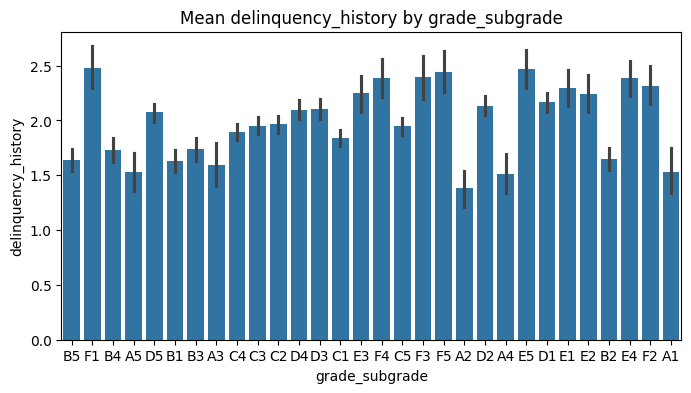

grade_subgrade
A1    0.046667
A2    0.065934
A3    0.086022
A4    0.093168
A5    0.047368
B1    0.070968
B2    0.059633
B3    0.070117
B4    0.051839
B5    0.064570
C1    0.063830
C2    0.067549
C3    0.059445
C4    0.053315
C5    0.064698
D1    0.060606
D2    0.062328
D3    0.067190
D4    0.053636
D5    0.059646
E1    0.071217
E2    0.040498
E3    0.063584
E4    0.047619
E5    0.070288
F1    0.055016
F2    0.080268
F3    0.087108
F4    0.044304
F5    0.052941
Name: public_records, dtype: float64

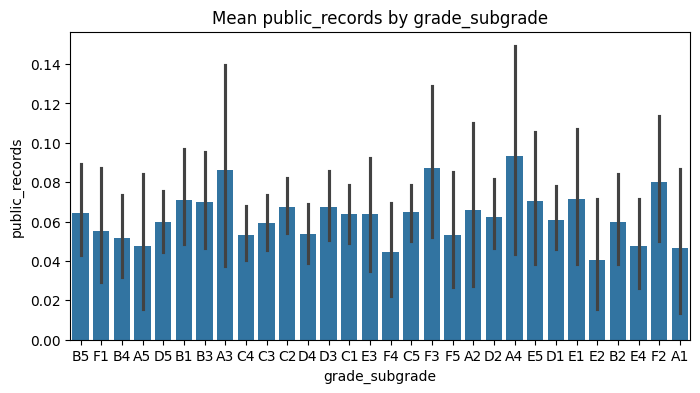

grade_subgrade
A1    2.073333
A2    1.956044
A3    2.129032
A4    2.031056
A5    2.057895
B1    2.153226
B2    2.214067
B3    2.225376
B4    2.230769
B5    2.122517
C1    2.330496
C2    2.487465
C3    2.435931
C4    2.400547
C5    2.452883
D1    2.632035
D2    2.630614
D3    2.575044
D4    2.583636
D5    2.534017
E1    2.795252
E2    2.719626
E3    2.664740
E4    2.915344
E5    3.015974
F1    2.922330
F2    2.879599
F3    2.926829
F4    2.876582
F5    2.958824
Name: num_of_delinquencies, dtype: float64

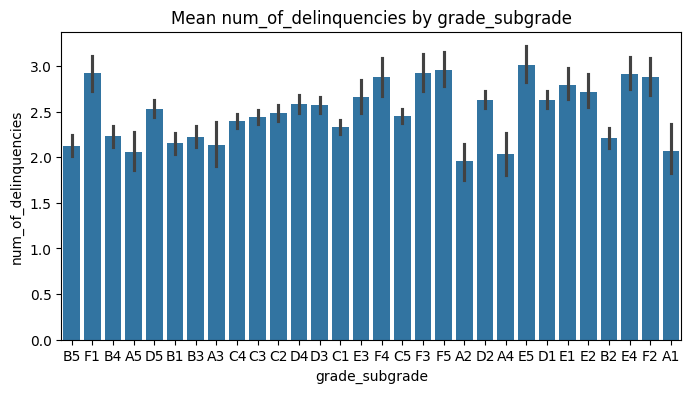

grade_subgrade
A1    0.960000
A2    0.961538
A3    0.946237
A4    0.925466
A5    0.936842
B1    0.888710
B2    0.915902
B3    0.911519
B4    0.918060
B5    0.903974
C1    0.850355
C2    0.823120
C3    0.821004
C4    0.827068
C5    0.831224
D1    0.757576
D2    0.747021
D3    0.727749
D4    0.742727
D5    0.736253
E1    0.700297
E2    0.700935
E3    0.696532
E4    0.690476
E5    0.725240
F1    0.653722
F2    0.678930
F3    0.658537
F4    0.677215
F5    0.705882
Name: loan_paid_back, dtype: float64

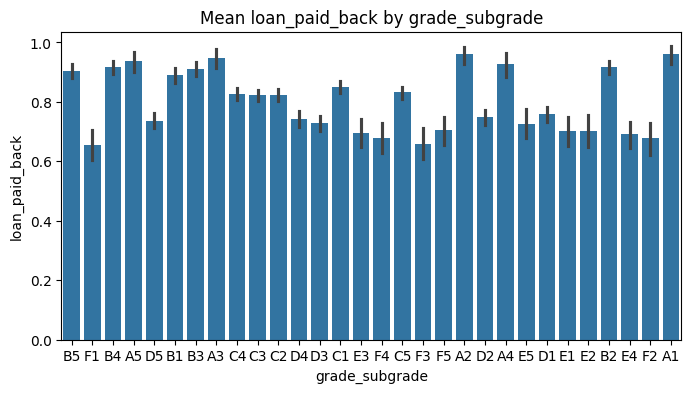

In [ ]:
import seaborn as sns
from itertools import combinations

categorical_variables = ['gender', 'marital_status', 'education_level', 'employment_status', 'loan_purpose', 'grade_subgrade']

numeric_cols = df.select_dtypes(include=['number']).columns

for c in categorical_variables:
  for n in numeric_cols:
    mean_vals = df.groupby(c)[n].mean()

    if mean_vals.isna().all():
        print(f"Skipping {c} vs {n} (all NaN)")
        continue
    display(mean_vals)

    plt.figure(figsize=(8,4))
    sns.barplot(data=df, x=c, y=n, estimator='mean')
    plt.title(f'Mean {n} by {c}')
    plt.show()

Let's check Categorical vs Categorical variables!


Cross-tab: gender vs marital_status


marital_status  Divorced  Married  Single  Widowed
gender                                            
Female               695     4491    4570      278
Male                 702     4304    4251      279
Other                 31      179     210       10

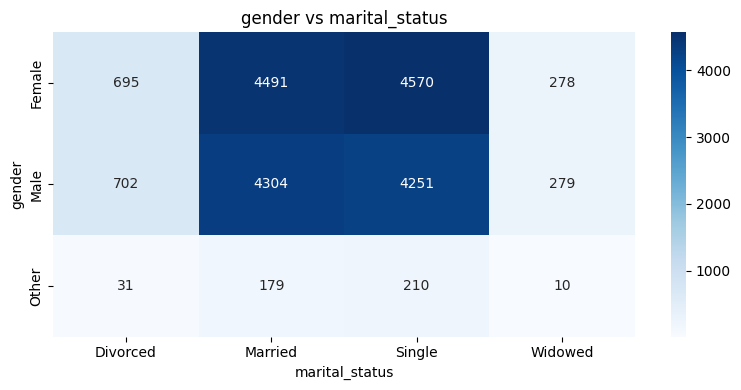


Cross-tab: gender vs education_level


education_level  Bachelor's  High School  Master's  Other  PhD
gender                                                        
Female                 4030         2978      1884    752  390
Male                   3864         2804      1757    721  390
Other                   151          137        83     35   24

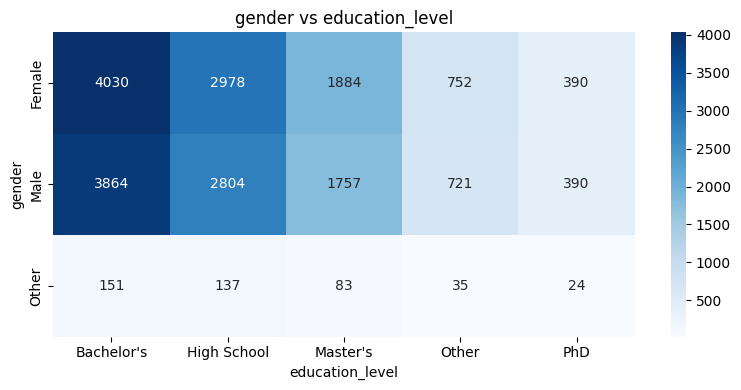


Cross-tab: gender vs employment_status


employment_status  Employed  Retired  Self-employed  Student  Unemployed
gender                                                                  
Female                 6549      578           1469      363        1075
Male                   6170      572           1390      403        1001
Other                   288       26             64       15          37

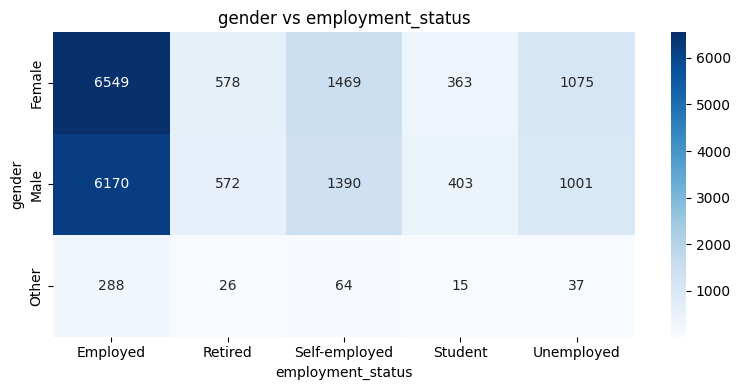


Cross-tab: gender vs loan_purpose


loan_purpose  Business   Car  Debt consolidation  Education  Home  Medical  \
gender                                                                       
Female             816  1196                4046        829  1001      602   
Male               780  1146                3770        803   922      571   
Other               33    48                 165         43    49       23   

loan_purpose  Other  Vacation  
gender                         
Female         1269       275  
Male           1224       320  
Other            57        12

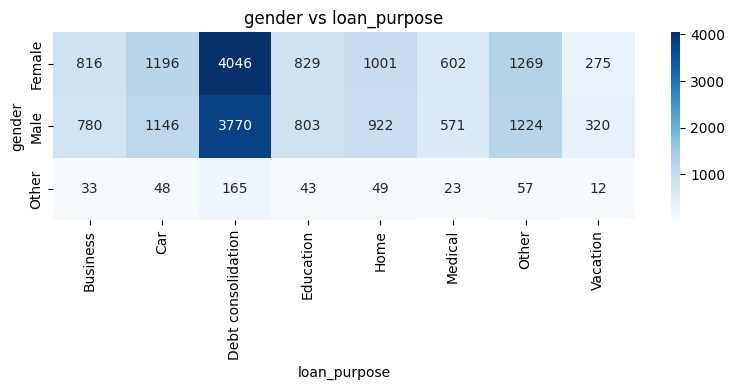


Cross-tab: gender vs grade_subgrade


grade_subgrade  A1  A2  A3  A4  A5   B1   B2   B3   B4   B5  ...   E1   E2  \
gender                                                       ...             
Female          82  99  99  81  96  312  331  292  320  325  ...  169  180   
Male            68  79  80  79  92  288  312  296  266  271  ...  156  134   
Other            0   4   7   1   2   20   11   11   12    8  ...   12    7   

grade_subgrade   E3   E4   E5   F1   F2   F3   F4   F5  
gender                                                  
Female          195  180  143  153  143  146  158  163  
Male            146  187  164  146  149  135  154  173  
Other             5   11    6   10    7    6    4    4  

[3 rows x 30 columns]

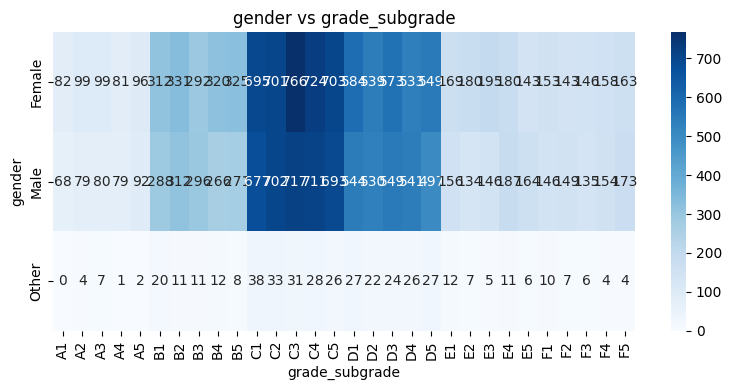


Cross-tab: marital_status vs education_level


education_level  Bachelor's  High School  Master's  Other  PhD
marital_status                                                
Divorced                558          421       276    120   53
Married                3680         2643      1652    658  341
Single                 3567         2705      1693    680  386
Widowed                 240          150       103     50   24

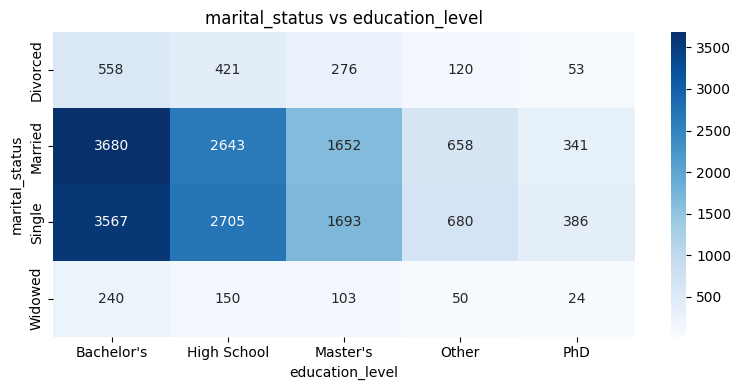


Cross-tab: marital_status vs employment_status


employment_status  Employed  Retired  Self-employed  Student  Unemployed
marital_status                                                          
Divorced                936       86            208       53         145
Married                5826      556           1332      342         918
Single                 5870      507           1300      362         992
Widowed                 375       27             83       24          58

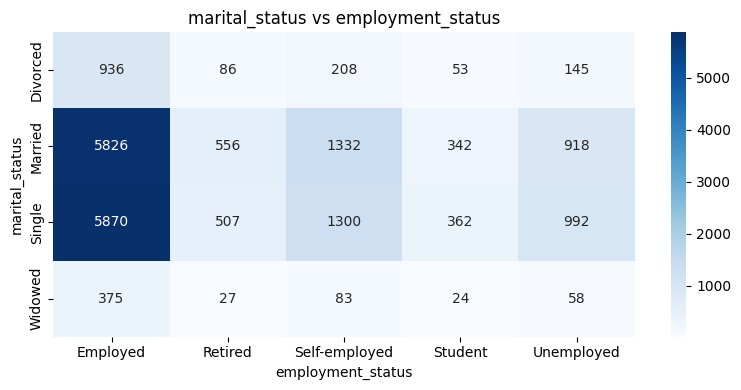


Cross-tab: marital_status vs loan_purpose


loan_purpose    Business   Car  Debt consolidation  Education  Home  Medical  \
marital_status                                                                 
Divorced             128   174                 602        107   112       96   
Married              743  1070                3580        768   871      532   
Single               710  1076                3558        744   939      543   
Widowed               48    70                 241         56    50       25   

loan_purpose    Other  Vacation  
marital_status                   
Divorced          173        36  
Married          1130       280  
Single           1182       279  
Widowed            65        12

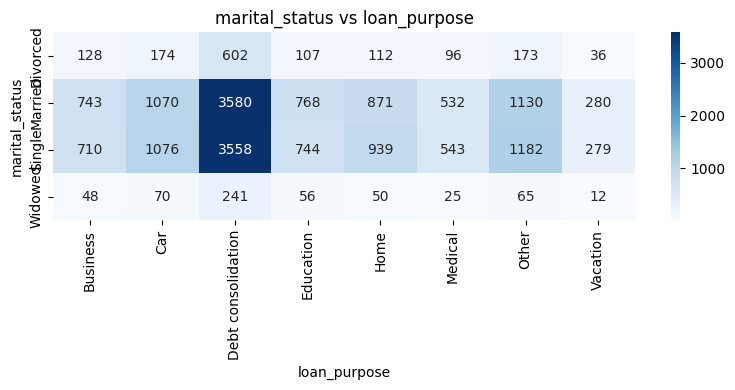


Cross-tab: marital_status vs grade_subgrade


grade_subgrade  A1  A2   A3  A4  A5   B1   B2   B3   B4   B5  ...   E1   E2  \
marital_status                                                ...             
Divorced        10   7   12  13  13   36   44   42   42   42  ...   23   30   
Married         68  79   68  71  81  289  314  259  285  267  ...  161  146   
Single          72  93  101  74  92  280  284  284  256  273  ...  145  133   
Widowed          0   3    5   3   4   15   12   14   15   22  ...    8   12   

grade_subgrade   E3   E4   E5   F1   F2   F3   F4   F5  
marital_status                                          
Divorced         16   24   23   18   28   21   21   21  
Married         148  165  138  137  127  123  149  157  
Single          170  180  141  148  131  135  139  151  
Widowed          12    9   11    6   13    8    7   11  

[4 rows x 30 columns]

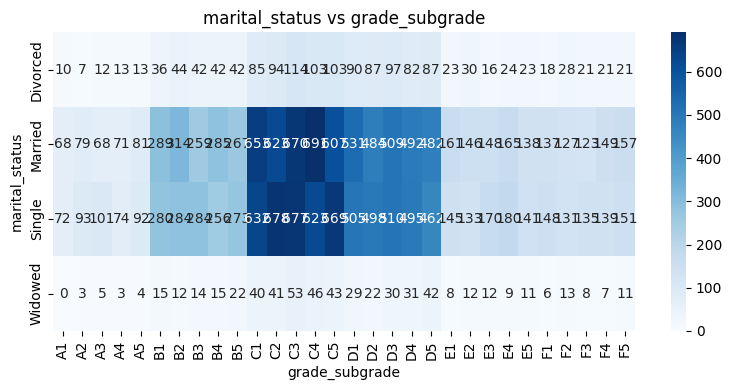


Cross-tab: education_level vs employment_status


employment_status  Employed  Retired  Self-employed  Student  Unemployed
education_level                                                         
Bachelor's             5217      461           1159      322         886
High School            3842      367            858      237         615
Master's               2432      198            565      145         384
Other                   999       85            219       53         152
PhD                     517       65            122       24          76

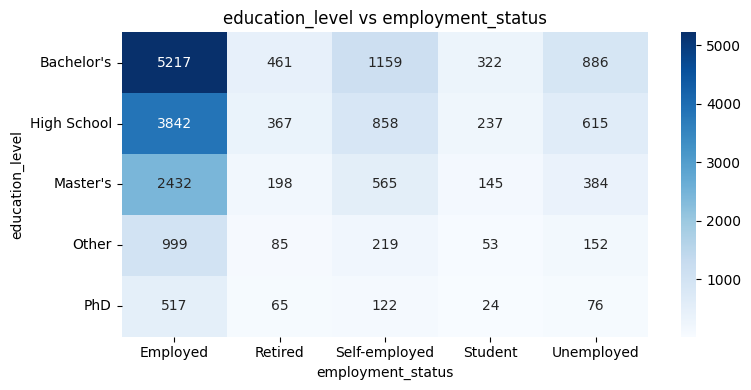


Cross-tab: education_level vs loan_purpose


loan_purpose     Business  Car  Debt consolidation  Education  Home  Medical  \
education_level                                                                
Bachelor's            662  945                3164        710   812      495   
High School           471  703                2376        489   559      354   
Master's              286  468                1498        298   389      213   
Other                 127  199                 602        111   147       89   
PhD                    83   75                 341         67    65       45   

loan_purpose     Other  Vacation  
education_level                   
Bachelor's        1014       243  
High School        762       205  
Master's           470       102  
Other              194        39  
PhD                110        18

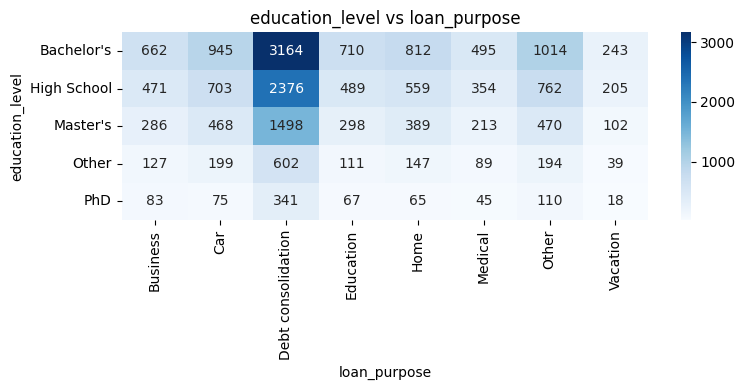


Cross-tab: education_level vs grade_subgrade


grade_subgrade   A1  A2  A3  A4  A5   B1   B2   B3   B4   B5  ...   E1   E2  \
education_level                                               ...             
Bachelor's       65  76  76  73  72  245  265  247  234  244  ...  139  114   
High School      45  45  57  39  58  175  194  186  185  175  ...   95   99   
Master's         27  33  31  30  39  124  121   98  118   98  ...   64   60   
Other             8  14  13  11  14   50   52   43   43   58  ...   29   31   
PhD               5  14   9   8   7   26   22   25   18   29  ...   10   17   

grade_subgrade    E3   E4   E5   F1   F2   F3   F4   F5  
education_level                                          
Bachelor's       149  149  127  136  112  113  120  146  
High School       95  116   92   93   88   91   93   90  
Master's          70   82   56   47   61   51   62   64  
Other             23   22   24   22   26   24   31   28  
PhD                9    9   14   11   12    8   10   12  

[5 rows x 30 columns]

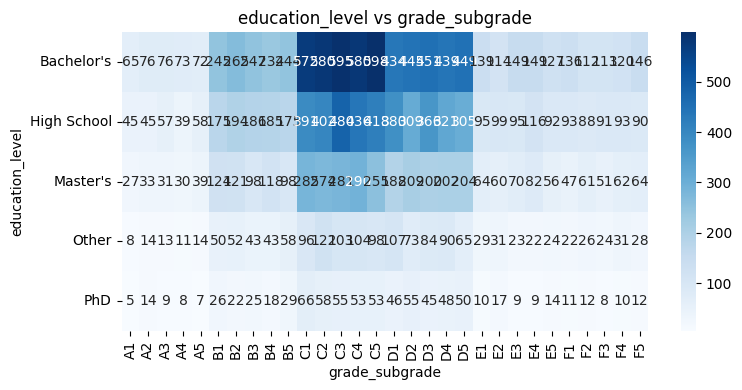


Cross-tab: employment_status vs loan_purpose


loan_purpose       Business   Car  Debt consolidation  Education  Home  \
employment_status                                                        
Employed               1086  1538                5208       1072  1311   
Retired                  97   147                 453         93   124   
Self-employed           229   370                1152        253   266   
Student                  62    94                 316         65    81   
Unemployed              155   241                 852        192   190   

loan_purpose       Medical  Other  Vacation  
employment_status                            
Employed               739   1651       402  
Retired                 68    163        31  
Self-employed          201    368        84  
Student                 53     91        19  
Unemployed             135    277        71

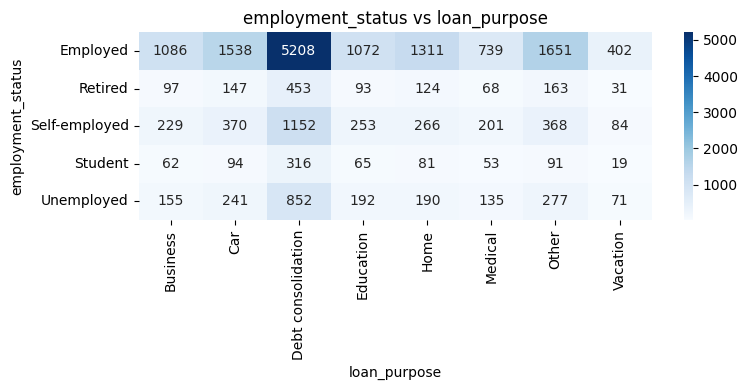


Cross-tab: employment_status vs grade_subgrade


grade_subgrade      A1   A2   A3   A4   A5   B1   B2   B3   B4   B5  ...   E1  \
employment_status                                                    ...        
Employed           102  115  127  104  128  395  437  378  386  379  ...  208   
Retired              7   15   12    6    9   42   32   31   30   48  ...   11   
Self-employed       16   23   24   26   30  101   95   88   98   90  ...   56   
Student              5    6    5    8    7   18   26   26   32   20  ...   17   
Unemployed          20   23   18   17   16   64   64   76   52   67  ...   45   

grade_subgrade      E2   E3   E4   E5   F1   F2   F3   F4   F5  
employment_status                                               
Employed           209  231  264  197  198  204  188  215  232  
Retired             22   17   18   23   18   17   17   14   16  
Self-employed       46   37   37   54   46   39   46   51   50  
Student             15   12   15    7    9    7    6   16    7  
Unemployed          29   49   44   32   38   32   30   20   35  

[5 rows x 30 columns]

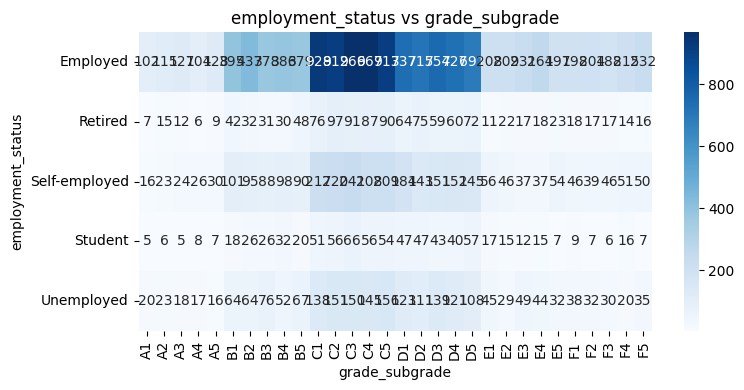


Cross-tab: loan_purpose vs grade_subgrade


grade_subgrade      A1  A2  A3  A4  A5   B1   B2   B3   B4   B5  ...   E1  \
loan_purpose                                                     ...        
Business            11  21  16   9  17   49   69   47   56   47  ...   20   
Car                 18  16  25  21  23   85   72   86   68   65  ...   50   
Debt consolidation  61  69  72  72  72  251  241  234  246  239  ...  127   
Education            6  17  20  13   9   44   60   49   48   44  ...   25   
Home                22  14  15  17  20   69   66   52   62   70  ...   30   
Medical              7   6  11   8   8   36   44   36   36   37  ...   25   
Other               18  31  21  18  31   70   78   87   68   84  ...   53   
Vacation             7   8   6   3  10   16   24    8   14   18  ...    7   

grade_subgrade       E2   E3   E4   E5   F1   F2   F3   F4   F5  
loan_purpose                                                     
Business             20   29   30   32   31   17   22   22   30  
Car                  36   35   47   35   28   49   38   44   39  
Debt consolidation  130  143  158  134  129  114  109  134  131  
Education            19   26   29   25   37   23   29   25   31  
Home                 28   31   34   29   31   30   29   32   33  
Medical              23   23   22   11   23   21   18   14   17  
Other                51   43   43   43   25   38   33   38   45  
Vacation             14   16   15    4    5    7    9    7   14  

[8 rows x 30 columns]

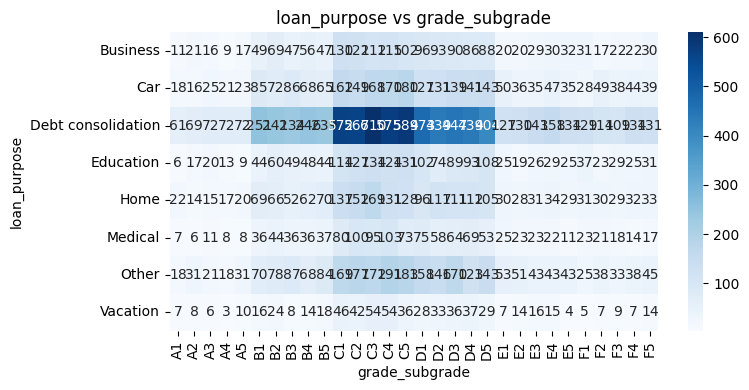

In [ ]:
from itertools import combinations

for col1, col2 in combinations(categorical_variables, 2):
    cross_t = pd.crosstab(df[col1], df[col2])
    if cross_t.empty or cross_t.shape[0] == 0 or cross_t.shape[1] == 0:
      continue
    print(f"\nCross-tab: {col1} vs {col2}")

    display(cross_t)

    plt.figure(figsize=(8,4))
    sns.heatmap(cross_t, annot=True, fmt='g', cmap='Blues')
    plt.title(f"{col1} vs {col2}")
    plt.ylabel(col1)
    plt.xlabel(col2)
    plt.tight_layout()
    plt.show()

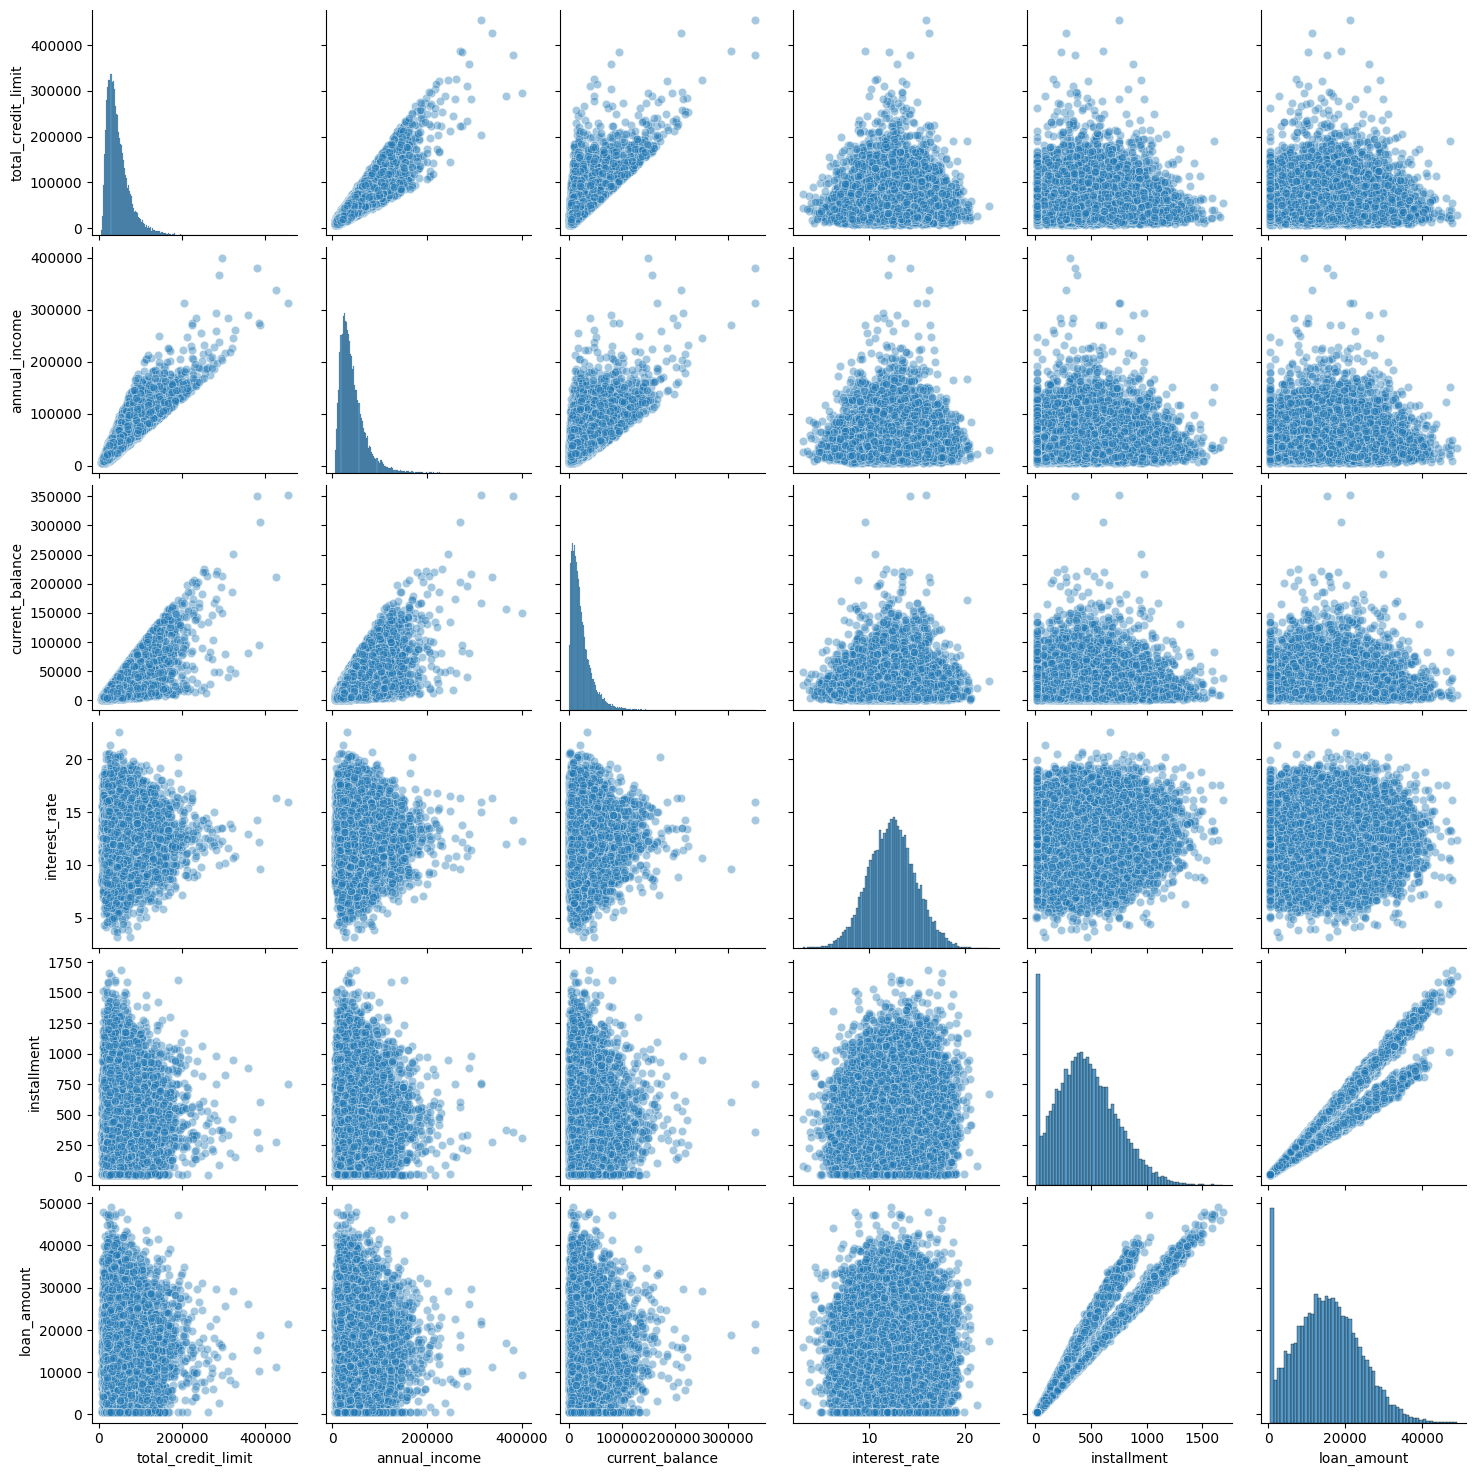

In [ ]:
sns.pairplot(df, vars= ['total_credit_limit', 'annual_income', 'current_balance', 'interest_rate', 'installment', 'loan_amount'], dropna = True, plot_kws={'alpha': 0.4})

## **Observations**


*   From these graphs, we can see the relationship of each feature. Actually, this is why I changed my dataset to this.


## **Do I trust this data?**
Yes. Relationships are clear and logical. Dataset size is sufficient to train a ML model.

## **Wrap Up**
I did this project twice. Second one was much faster and efficient. I think I mastered EDA thanks to this course. Of course, working on a better dataset helped a lot too!

# **Part 4 - Training a Machine Learning Model**

## **ML Task Description**
My hypothesis' aim is to predict whether the loan applicants will pay back or not based on their features. Which means I will **classify** applicants.

I'll use a **supervisied learning** technique for my model. Means I'll use the **labeled data** to train my model.

After converting categorical data to numerical data (sklearn restriction), I will split the dataset into 2: train and test. Then I will train a decision tree model and tune it by choosing various combinations of hyperparameters.

## **Feature Engineering**

I am planning to use all the features to train my future ML model. But it can change based on the experiments that I will conduct.

**Feature Creation:** There is no need to create extra features. (but feature number will increase because of one-hot encoding)


**Feature Transformation:** I will standardize all the numerical fatures as it is important for classification tasks. I also plan to convert categorical features into numerical values by **applying an encoding function** (one-hot encoding) except grade_subgrade as it has a lot of classes which would increase the number of features harmfully high.

After these processes, I will have a dataset with much more dimensions.



In [ ]:
from sklearn.preprocessing import StandardScaler

# One-hot Encoding to categorical features!
for_model = pd.get_dummies(df, columns=['gender'], drop_first=True)
for_model = pd.get_dummies(for_model, columns=['marital_status'], drop_first=True)
for_model = pd.get_dummies(for_model, columns=['education_level'], drop_first=True)
for_model = pd.get_dummies(for_model, columns=['employment_status'], drop_first=True)
for_model = pd.get_dummies(for_model, columns=['loan_purpose'], drop_first=True)

# Enumerate grade_subgrade
mapping = {v: i for i, v in enumerate(for_model['grade_subgrade'].unique())}
for_model["grade_subgrade"] = for_model['grade_subgrade'].map(mapping)

print(for_model.head())

   age  annual_income  monthly_income  debt_to_income_ratio  credit_score  \
0   59       24240.19         2020.02                 0.074           743   
1   72       20172.98         1681.08                 0.219           531   
2   49       26181.80         2181.82                 0.234           779   
3   35       11873.84          989.49                 0.264           809   
4   63       25326.44         2110.54                 0.260           663   

   loan_amount  interest_rate  loan_term  installment  grade_subgrade  ...  \
0     17173.72          13.39         36       581.88               0  ...   
1     22663.89          17.81         60       573.17               1  ...   
2      3631.36           9.53         60        76.32               2  ...   
3     14939.23           7.99         36       468.07               3  ...   
4     16551.71          15.20         60       395.50               4  ...   

   employment_status_Self-employed  employment_status_Student  \
0  

Now, I will try to reduce the dimensions with feature selection & extraction methods.

But first, see the performance of the base model with the current dataset.

## **ML Model**

**ALGORITHM TO USE**

To perform a better feature selection and feature extraction, we should have a base model. That way, we can compare the models trained with different datasets.

I will use decision trees to classify loan applicants. I wantted to use this algorithm because we had a lot of examples of it in the class so it's familiar. Also, I have both numerical and categorical data, therefore decision trees seems like a good algorithm for this dataset.

Best thing about decision trees is that, it does not assume any distribution, independence, scaling, etc. It only need sufficient data samples to be trained. Also, outliers can influence the model heavily so extreme outliers must be eliminated before the training.

Overfitting is a big issue for decision trees but I will try to overcome this issue with techniques teached in the class such as pruning.


**HYPERPARAMETERS**
*   max_depth: indicates the max depth of the decision tree. a small number prevents overfitting but also can perform poor (high bias).
*   min_samples_split: min samples needed to split a node. increasing may prevent overfitting but decrease accuracy.
*   min_samples_leaf: min samples in a leaf node. increasing may prevenmt overfitting
*   max_features: number of features to consider each split.

As training time is pretty short, I will try bunch of most common used values and pick the hyperparameters with the highest accuracy. I will pick the hyperparameters after the base model ML and feature engineering part.

**POST-PROCESSING**

I may need to apply post-pruning if I have an overfitting issue (lower accuracy than the base model) but I think it won't be necessary after picking the optimal hyperparameters.

As base model, I will not pick any hyperparameter.





In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

# First split the features and label
y = for_model['loan_paid_back']
x = for_model.drop(columns=['loan_paid_back'], axis=1)

# Then split train and test set.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,stratify=y)

print('X train shape:',x_train.shape)


clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("CONFUSION MATRIX BASE DECISION TREE:")
print(confusion_matrix(y_test, y_pred))

print("\nCLASSIFICATION REPORT BASE DECISION TREE:")
print(classification_report(y_test, y_pred, target_names=['not paid', 'paid']))


X train shape: (16000, 36)
CONFUSION MATRIX BASE DECISION TREE:
[[ 504  296]
 [ 363 2837]]

CLASSIFICATION REPORT BASE DECISION TREE:
              precision    recall  f1-score   support

    not paid       0.58      0.63      0.60       800
        paid       0.91      0.89      0.90      3200

    accuracy                           0.84      4000
   macro avg       0.74      0.76      0.75      4000
weighted avg       0.84      0.84      0.84      4000



## **Back to Feature Selection & Feature Extraction with Optional Extra Credit**

After creating the dataset to train the classification model, I decided to conduct some experiments to understand which features matter, or if dimensionality reduction helps our model.

**Feature Selection:** To select features I'll use Filter Method as I do not have a model now. I'll try 3 different methods and decide which to use (or even to use at all) after observing variance loss.

**PCA**

Even by keeping 0.99 variance the model performed poorly. I decided to not use it.

**Selection with Chi-Squared Test**

I had to choose K as the hyperparameter. Therefore I evaluated the base model for every k value between 1 and 35. After k=16, model started to perform the same. Therefore, it is possible to reduce the dimension to 16 in the worst case.

**Backwards Elimination**

It took a long time but after applying Backwards Elimination, the model performed slightly better with 18 selected features. 9 Numerical Features and 9 categorical features (encoded).

Therefore 9 dimensions reduced for the best performing base model. By reducing dimensionality, my model is much less complex and performs better.

ATTENTION: IT TAKES 12 MINS TO EXECUTE THE FOLLOWING CODE SNIPPET!

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, SequentialFeatureSelector
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)

X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)

print("Number of PCA components kept:", pca.n_components_)

clf = DecisionTreeClassifier()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("CONFUSION MATRIX BASE DECISION TREE:")
print(confusion_matrix(y_test, y_pred))

print("\nCLASSIFICATION REPORT BASE DECISION TREE:")
print(classification_report(y_test, y_pred, target_names=['not paid', 'paid']))

for i in range(1,36):
  # SelectKBest using chi-squared test
  x_reduced = x
  y_reduced = y

  selector = SelectKBest(chi2, k=i)
  X_chi = selector.fit_transform(x_reduced,y_reduced)
  x_train_chi, x_test_chi, y_train, y_test = train_test_split(X_chi,y,test_size=0.2,stratify=y)

  clf = DecisionTreeClassifier()
  clf.fit(x_train_chi, y_train)
  y_pred = clf.predict(x_test_chi)
  print(f'Selected features for {i} features:', x.columns[selector.get_support()].tolist())

  print("\nCLASSIFICATION REPORT BASE DECISION TREE:")
  print(classification_report(y_test, y_pred, target_names=['not paid', 'paid']))



# Lastly backward selection:
clf = DecisionTreeClassifier()
sfs = SequentialFeatureSelector(clf, direction='backward')
sfs.fit(x,y)
print(f'Selected features:', x.columns[sfs.get_support()].tolist())

Number of PCA components kept: 4
CONFUSION MATRIX BASE DECISION TREE:
[[ 174  626]
 [ 704 2496]]

CLASSIFICATION REPORT BASE DECISION TREE:
              precision    recall  f1-score   support

    not paid       0.20      0.22      0.21       800
        paid       0.80      0.78      0.79      3200

    accuracy                           0.67      4000
   macro avg       0.50      0.50      0.50      4000
weighted avg       0.68      0.67      0.67      4000

Selected features for 1 features: ['current_balance']

CLASSIFICATION REPORT BASE DECISION TREE:
              precision    recall  f1-score   support

    not paid       0.17      0.17      0.17       800
        paid       0.79      0.79      0.79      3200

    accuracy                           0.67      4000
   macro avg       0.48      0.48      0.48      4000
weighted avg       0.67      0.67      0.67      4000

Selected features for 2 features: ['credit_score', 'current_balance']

CLASSIFICATION REPORT BASE DECISION TR

Then with the backwards elimination results we use the features with the best perforance (with 18 features):

In [ ]:
x_last = for_model[['age', 'monthly_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount', 'interest_rate', 'loan_term', 'grade_subgrade', 'delinquency_history', 'public_records', 'marital_status_Single', 'marital_status_Widowed', "education_level_Master's", 'employment_status_Retired', 'employment_status_Student', 'employment_status_Unemployed', 'loan_purpose_Car', 'loan_purpose_Vacation']]
y_last = for_model['loan_paid_back']
# Then split train and test set.
x_train, x_test, y_train, y_test = train_test_split(x_last,y_last,test_size=0.2,stratify=y_last)

print('X train shape:',x_train.shape)


clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("CONFUSION MATRIX BASE DECISION TREE:")
print(confusion_matrix(y_test, y_pred))

print("\nCLASSIFICATION REPORT BASE DECISION TREE:")
print(classification_report(y_test, y_pred, target_names=['not paid', 'paid']))

X train shape: (16000, 18)
CONFUSION MATRIX BASE DECISION TREE:
[[ 485  315]
 [ 353 2847]]

CLASSIFICATION REPORT BASE DECISION TREE:
              precision    recall  f1-score   support

    not paid       0.58      0.61      0.59       800
        paid       0.90      0.89      0.90      3200

    accuracy                           0.83      4000
   macro avg       0.74      0.75      0.74      4000
weighted avg       0.84      0.83      0.83      4000



## **Hyperparameters**

As I mentioned earlier I have:
*   max_depth: indicates the max depth of the decision tree. a small number prevents overfitting but also can perform poor (high bias).
*   min_samples_split: min samples needed to split a node. increasing may prevent overfitting but decrease accuracy.
*   min_samples_leaf: min samples in a leaf node. increasing may prevenmt overfitting
*   max_features: number of features to consider each split.

Now, I will find the optimal values of these hyperparameters.

In [ ]:
from sklearn.model_selection import GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(x_last,y_last,test_size=0.2,stratify=y_last)

hyperparameters = {
    'max_depth': [3,5,7,10,15,None],
    'min_samples_split': [2,3,5,10],
    'min_samples_leaf': [1,2,4,8,10],
}

clf = DecisionTreeClassifier(class_weight='balanced')

grid = GridSearchCV(clf, hyperparameters, scoring='roc_auc')
grid.fit(x_train,y_train)

print('Best Parameters:', grid.best_params_)


Best Parameters: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 5}


And lastly, train the decision tree model with optimal hyperparameters and the optimal dataset.

In [ ]:
clf = DecisionTreeClassifier(max_depth=7,min_samples_leaf=8,min_samples_split=3)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("CONFUSION MATRIX BASE DECISION TREE:")
print(confusion_matrix(y_test, y_pred))

print("\nCLASSIFICATION REPORT BASE DECISION TREE:")
print(classification_report(y_test, y_pred, target_names=['not paid', 'paid']))

CONFUSION MATRIX BASE DECISION TREE:
[[ 416  384]
 [  27 3173]]

CLASSIFICATION REPORT BASE DECISION TREE:
              precision    recall  f1-score   support

    not paid       0.94      0.52      0.67       800
        paid       0.89      0.99      0.94      3200

    accuracy                           0.90      4000
   macro avg       0.92      0.76      0.80      4000
weighted avg       0.90      0.90      0.89      4000



# **Part 5 Evaluation of the ML Model**

## **Evaluating the Machine Learning Model**
In our case, both false negative and false positive error have harm to us. As banks profits a lot by loans, not offering a loan who would pay back would be a huge loss. Also giving loan to someone who cannot afford to payback would cause a lot of extra expenses for the bank. Therefore, both recall and precision are equally important metrics for us to evaluate the model. To simplfy the calculations, the general accuracy value and the F1 score of the model will be considered while evaluating the model.

To investigate the model performance visually, confusion matrix and heatmap are good visualizations.

CONFUSION MATRIX BASE DECISION TREE:
[[ 416  384]
 [  27 3173]]


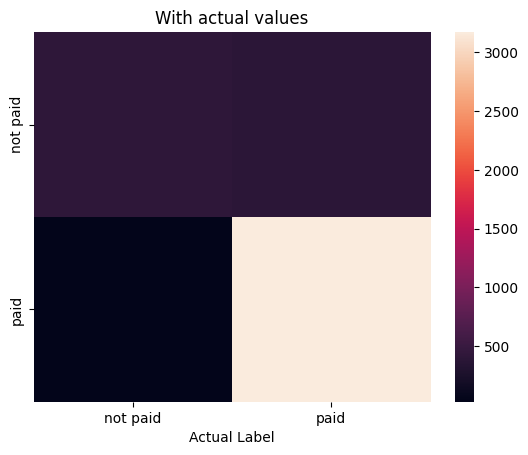

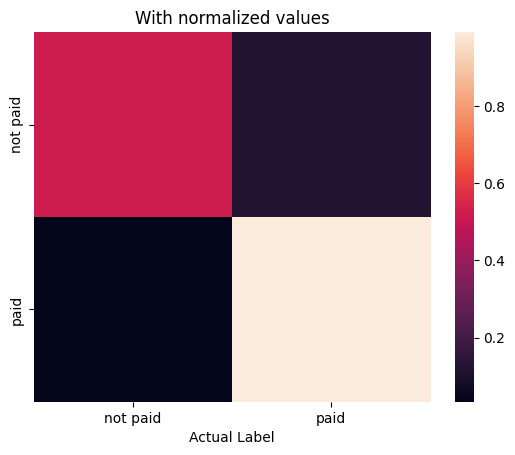

The accuracy of the model is 0.89725
The F1-score of the model is 0.9391741897291698


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

clf = DecisionTreeClassifier(max_depth=7,min_samples_leaf=8,min_samples_split=3)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("CONFUSION MATRIX BASE DECISION TREE:")
conf = confusion_matrix(y_test, y_pred)
print(conf)

# Normalize the confusion matrix for good visualization

conf_normal = conf.astype('float') / conf.sum(axis=1)

plt.figure()
plt.title('With actual values')
sns.heatmap(
    conf,
    xticklabels = ['not paid', 'paid'],
    yticklabels = ['not paid', 'paid']
)
plt.xlabel('Predicted Label')
plt.xlabel('Actual Label')
plt.show()


plt.figure()
plt.title('With normalized values')
sns.heatmap(
    conf_normal,
    xticklabels = ['not paid', 'paid'],
    yticklabels = ['not paid', 'paid']
)
plt.xlabel('Predicted Label')
plt.xlabel('Actual Label')
plt.show()

accuracy = accuracy_score(y_pred, y_test)
print('The accuracy of the model is', accuracy)

f1 = f1_score(y_pred, y_test)
print('The F1-score of the model is', f1)

Do we have any issues like overfitting or underfitting? To understand that, let's predict the train data and evaluate them!

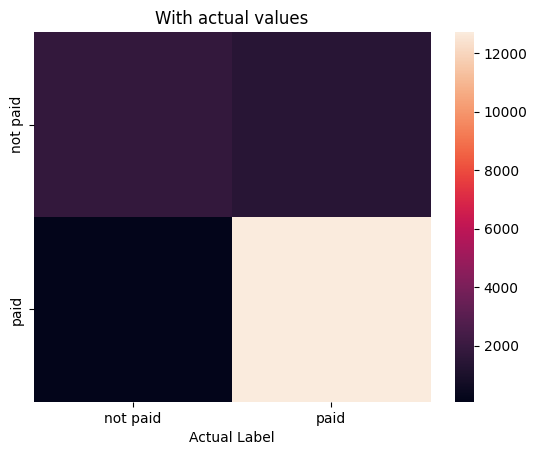

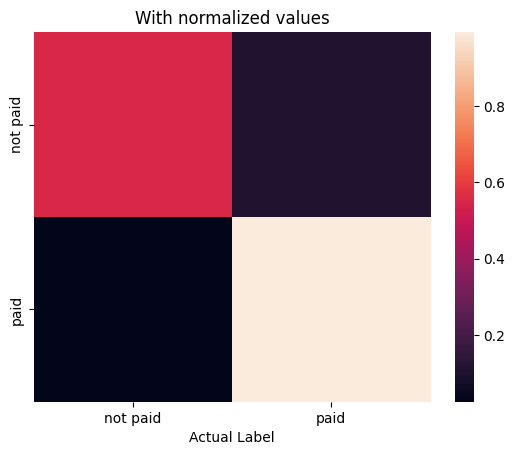

The accuracy of the model is 0.9058125
The F1-score of the model is 0.9440671046282894


In [ ]:
y_train_pred = clf.predict(x_train)
conf = confusion_matrix(y_train, y_train_pred)

conf_normal = conf.astype('float') / conf.sum(axis=1)

plt.figure()
plt.title('With actual values')
sns.heatmap(
    conf,
    xticklabels = ['not paid', 'paid'],
    yticklabels = ['not paid', 'paid']
)
plt.xlabel('Predicted Label')
plt.xlabel('Actual Label')
plt.show()


plt.figure()
plt.title('With normalized values')
sns.heatmap(
    conf_normal,
    xticklabels = ['not paid', 'paid'],
    yticklabels = ['not paid', 'paid']
)
plt.xlabel('Predicted Label')
plt.xlabel('Actual Label')
plt.show()

accuracy = accuracy_score(y_train_pred, y_train)
print('The accuracy of the model is', accuracy)

f1 = f1_score(y_train_pred, y_train)
print('The F1-score of the model is', f1)

Obtained evaluation scores are nearly the same with test cases and high. Therefore we can conclude that, our model does not have any overfitting or underfitting issues!

## **Trying an ensemble method**
A possible better ML model is a Random Forest model for my case. Therefore I will train a Random Forest model and compare the results with the Decision Tree Model that I've already trained and evaluated.

CONFUSION MATRIX BASE DECISION TREE:
[[ 409  391]
 [  14 3186]]


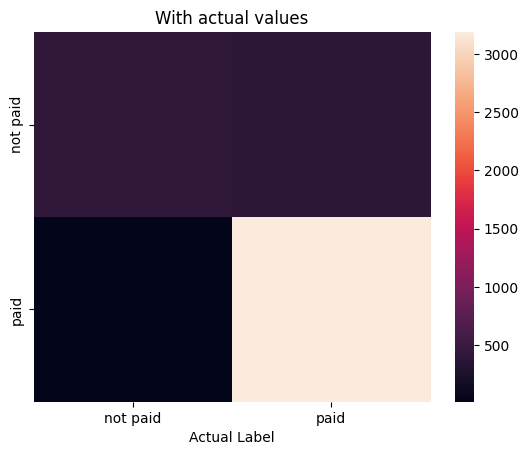

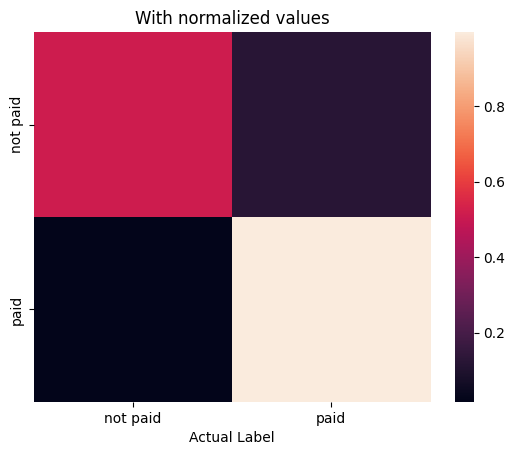

The accuracy of the model is 0.89875
The F1-score of the model is 0.9402390438247012


In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(class_weight='balanced')

random_forest.fit(x_train,y_train)

y_pred = random_forest.predict(x_test)

print("CONFUSION MATRIX BASE DECISION TREE:")
conf = confusion_matrix(y_test, y_pred)
print(conf)

# Normalize the confusion matrix for good visualization

conf_normal = conf.astype('float') / conf.sum(axis=1)

plt.figure()
plt.title('With actual values')
sns.heatmap(
    conf,
    xticklabels = ['not paid', 'paid'],
    yticklabels = ['not paid', 'paid']
)
plt.xlabel('Predicted Label')
plt.xlabel('Actual Label')
plt.show()


plt.figure()
plt.title('With normalized values')
sns.heatmap(
    conf_normal,
    xticklabels = ['not paid', 'paid'],
    yticklabels = ['not paid', 'paid']
)
plt.xlabel('Predicted Label')
plt.xlabel('Actual Label')
plt.show()

accuracy = accuracy_score(y_pred, y_test)
print('The accuracy of the model is', accuracy)

f1 = f1_score(y_pred, y_test)
print('The F1-score of the model is', f1)



As we can see, Random Forest model performed _slightly_ better than previously trained Decision Tree. I think the main reason for that is the nature of the ensemble methods. As Random Forest Model combines multiple decision trees and predicts the value by considering all the models, it generally performs better. Complexity and the training time is the tradeoff in this case but as our dataset is relatively small, additional cost is negligible.

## **Insights:**

At the beginning my hypothesis was: **if the borrower's education level is high, the paying back percentage increases.**

To justify that, we can focus on the selected features. In feature engineering part, I decided to train the model with 18 features after running backward elimination algorithm. These features are:
*   'age'
*   'monthly_income'
*   'debt_to_income_ratio'
*   'credit_score'
*   'loan_amount'
*   'interest_rate'
*   'loan_term'
*   'grade_subgrade'
*   'delinquency_history'
*   'public_records'
*   'marital_status_Single'
*   'marital_status_Widowed'
*   'education_level_Master's'
*   'employment_status_Retired'
*   'employment_status_Student'
*   'employment_status_Unemployed'
*   'loan_purpose_Car'
*   'loan_purpose_Vacation'

As we can see from the selected features, we can see that only 'education_level_Master's' feature is selected from encoded education level feature. On the other hand, encoded features of marital status and employment status are selected which can be interpreted as these categorical features are more important than education level in our case.

After analysis, I realized that my assumptions on education level were mostly wrong. I think I did not think broadly enough in my hypothesis, since individual shop owners generally do not attend higher-level educational institutions which apply for loans a lot.

To be honest I wouldn't do anything different throughout this semester as I followed all the instructions of the assignments strictly which helped me to understand the data analysis cycle pretty good.

I think my analysis can be applied to many different areas. The important thing is to collect a good amount of diverse data. Classification with a Random Forest Model is a good way to make decisions by considering lots of different features. However in my opinion, the decision maker must consult people from different specialities and should not rely solely on the analysis. As we've seen in the lectures, mistakes can occure while collecting or analyzing data. Therefore professional opinions must be considered when making critical decisions.

**Ethics:** I think the biggest ethical concern is biased models. Biased models might exclude certain groups of people when classifying their loan applications and this can cause some serious problems in real life applications.

**Final thoughts:** I learned a lot of things while dealing with all 5 projects. All the instructions pushed me to learn new things from my dataset and it made me question my assumptions all the time. Most of the time, I saw that my assumptions were wrong and once I had to start over. I saw the importance of the quality of the dataset and preprocessing. I saw how important it is to be unbaised and open-minded while exploring the data. After these steps, it was really easy to train a model as I was really comfortable while playing with the dataset. Overall, it was a great experience.